# Online Retail
This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

## Dataset Information
### Additional Information
This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers

### Has Missing Values?
No

| Variable Name | Role | Type | Description | Units | Missing Values |
|--|--|--|--|--|--|
| InvoiceNo | ID | Categorical | A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation. | | No |
| StockCode | ID | Categorical | A 5-digit integral number uniquely assigned to each distinct product. | | No |
| Description | Feature | Categorical | Product name. | | No |
| Quantity | Feature | Integer     | The quantities of each product (item) per transaction. | | No |
| InvoiceDate | Feature | Date        | The day and time when each transaction was generated. | | No |
| UnitPrice | Feature | Continuous | Product price per unit (in sterling). | Sterling| No |
| CustomerID | Feature | Categorical | A 5-digit integral number uniquely assigned to each customer.| | No |
| Country | Feature | Categorical | The name of the country where each customer resides. | | No |


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_parquet("./Data/Online Retail.parquet.snappy")

In [3]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
# Category type
# Category 타입은 ‘순서'를 지정할 수 있어, ordinal 데이터 처리 시 유리
# 또한 값이 유한개로 정해진 string 형태로, object type 대비 메모리 처리가 용이

In [6]:
# object type을 category type으로 변환

df = df.astype({"StockCode": "category",
           "Description": "category",
           "InvoiceDate": "category",
           "Country": "category",
           "CustomerID": "object"})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    541909 non-null  object  
 1   StockCode    541909 non-null  category
 2   Description  540455 non-null  category
 3   Quantity     541909 non-null  int64   
 4   InvoiceDate  541909 non-null  category
 5   UnitPrice    541909 non-null  float64 
 6   CustomerID   406829 non-null  object  
 7   Country      541909 non-null  category
dtypes: category(4), float64(1), int64(1), object(2)
memory usage: 21.2+ MB


## EDA & Preprocessing

In [8]:
# Quantity & UnitPrice minus value -> 주문취소 등으로 추정
# Quantity & UnitPrice max value 처리 시 확인 필요
df.describe()

Quantity      UnitPrice
count  541909.000000  541909.000000
mean        9.552250       4.611114
std       218.081158      96.759853
min    -80995.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   38970.000000

In [9]:
# InvoiceNo, InvoiceDate freq -> 한 시점에 다량의 주문건이 발생한 것으로 보임
df.describe(include="category")

StockCode                         Description          InvoiceDate  \
count     541909                              540455               541909   
unique      4070                                4223                23260   
top       85123A  WHITE HANGING HEART T-LIGHT HOLDER  2011-10-31 14:41:00   
freq        2313                                2369                 1114   

               Country  
count           541909  
unique              38  
top     United Kingdom  
freq            495478

In [10]:
df.describe(include="object")

InvoiceNo  CustomerID
count     541909    406829.0
unique     25900      4372.0
top       573585     17841.0
freq        1114      7983.0

In [11]:
# CustomerID의 결측치는 비회원 주문일 것으로 추정
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [12]:
# 결측치 비율 확인
df.isna().mean() * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

#### 비회원 주문 분석

In [13]:
# 비회원 구매 현황 확인
df["CustomerID"].isnull().value_counts()

CustomerID
False    406829
True     135080
Name: count, dtype: int64

In [14]:
df.loc[df["CustomerID"].isnull(), "Country"].value_counts()

Country
United Kingdom          133600
EIRE                       711
Hong Kong                  288
Unspecified                202
Switzerland                125
France                      66
Israel                      47
Portugal                    39
Bahrain                      2
United Arab Emirates         0
Netherlands                  0
Norway                       0
Poland                       0
RSA                          0
USA                          0
Saudi Arabia                 0
Lithuania                    0
Singapore                    0
Spain                        0
Sweden                       0
Malta                        0
Australia                    0
Lebanon                      0
Japan                        0
Austria                      0
Iceland                      0
Greece                       0
Germany                      0
Finland                      0
European Community           0
Denmark                      0
Czech Republic               0


In [15]:
# 비회원 구분을 위한 파생변수 "isRegistered" 생성
df["isRegistered"] = df["CustomerID"].notnull()

In [16]:
# 국가별 회원/비회원 주문 비중 확인
# UK 외 국가에서 비회원 주문이 많을 것으로 예상했으나, 오히려 UK에서의 비회원 주문 비중이 높음
pd.crosstab(index=df["Country"], columns=df["isRegistered"]).sort_values(True, ascending=False)

isRegistered           False   True 
Country                             
United Kingdom        133600  361878
Germany                    0    9495
France                    66    8491
EIRE                     711    7485
Spain                      0    2533
Netherlands                0    2371
Belgium                    0    2069
Switzerland              125    1877
Portugal                  39    1480
Australia                  0    1259
Norway                     0    1086
Italy                      0     803
Channel Islands            0     758
Finland                    0     695
Cyprus                     0     622
Sweden                     0     462
Austria                    0     401
Denmark                    0     389
Japan                      0     358
Poland                     0     341
USA                        0     291
Israel                    47     250
Unspecified              202     244
Singapore                  0     229
Iceland                    0     182
Canada                     0     151
Greece                     0     146
Malta                      0     127
United Arab Emirates       0      68
European Community         0      61
RSA                        0      58
Lebanon                    0      45
Lithuania                  0      35
Brazil                     0      32
Czech Republic             0      30
Bahrain                    2      17
Saudi Arabia               0      10
Hong Kong                288       0

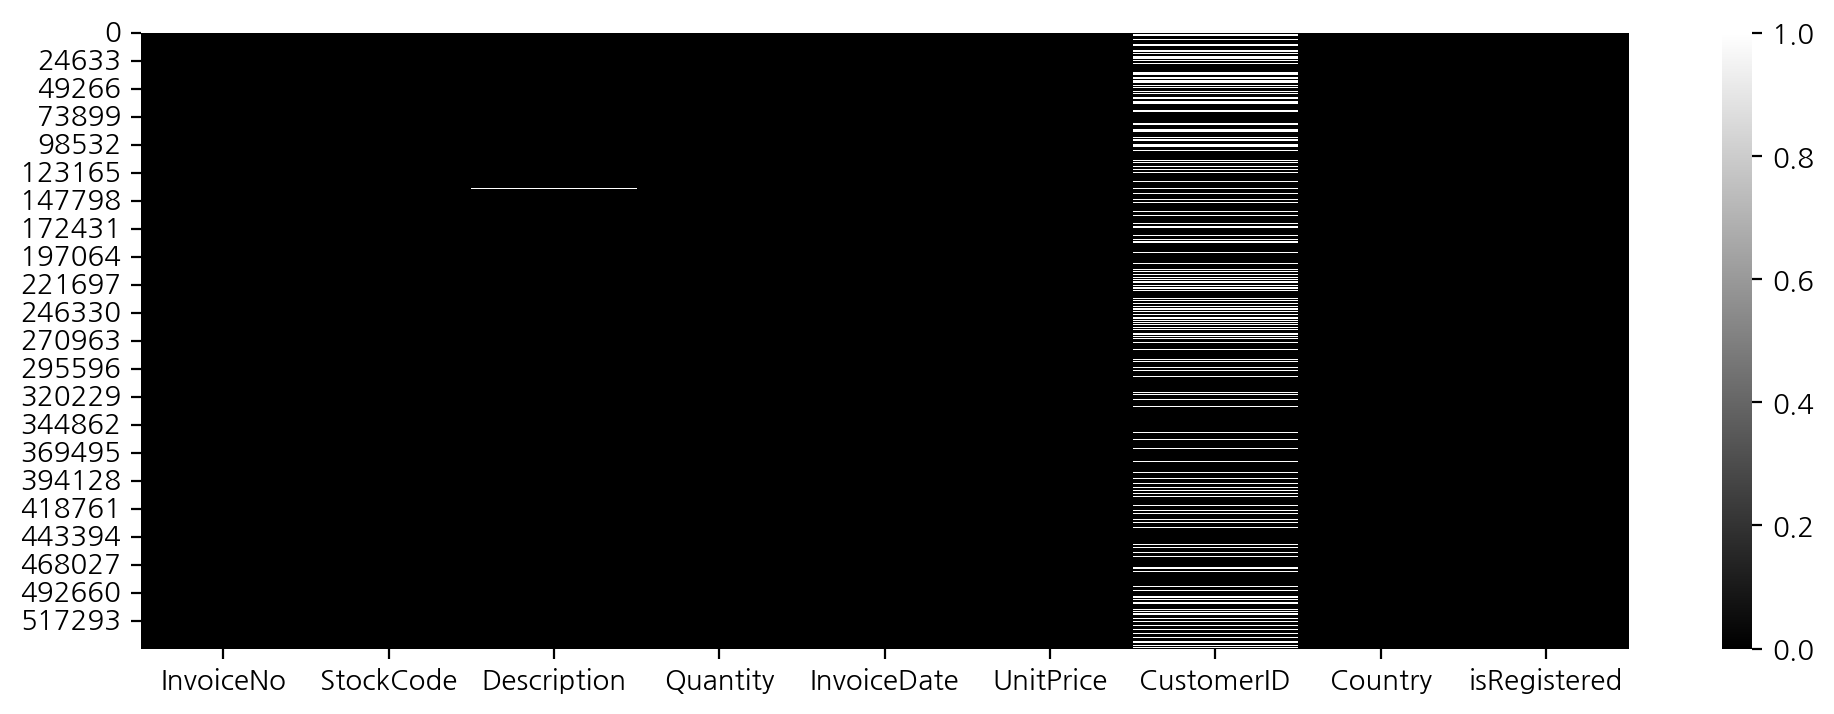

In [17]:
# 비회원(결측치) 분포 시각화
plt.figure(figsize=(12, 4))
sns.heatmap(data=df.isnull(), cmap="gray");

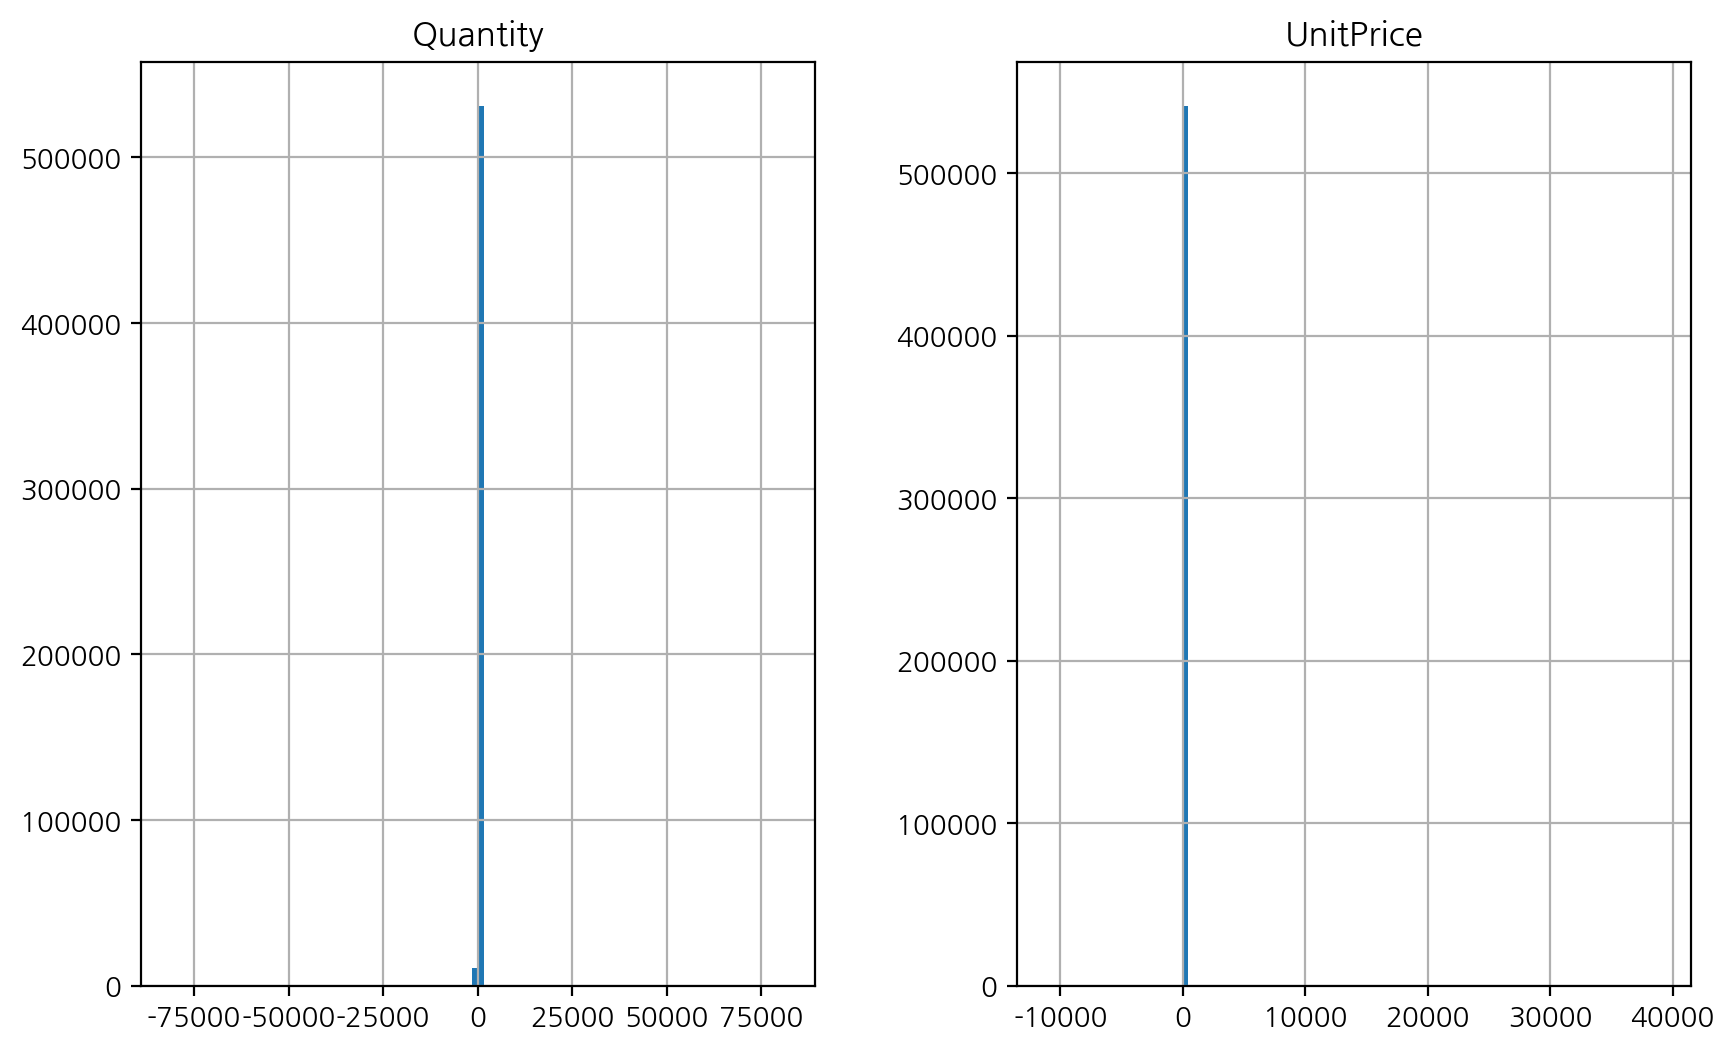

In [18]:
df.drop("CustomerID", axis=1).hist(figsize=(10, 6), bins=100);

In [19]:
# 전체 주문금액 파생변수 "TotalPrice" 생성
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice CustomerID         Country  \
0      2010-12-01 08:26:00       2.55    17850.0  United Kingdom   
1      2010-12-01 08:26:00       3.39    17850.0  United Kingdom   
2      2010-12-01 08:26:00       2.75    17850.0  United Kingdom   
3      2010-12-01 08:26:00       3.39    17850.0  United Kingdom   
4      2010-12-01 08:26:00       3.39    17850.0  United Kingdom   
...                    ...        ...        ...             ...   
541904 2011-12-09 12:50:00       0.85    12680.0          France   
541905 2011-12-09 12:50:00       2.10    12680.0          France   
541906 2011-12-09 12:50:00       4.15    12680.0          France   
541907 2011-12-09 12:50:00       4.15    12680.0          France   
541908 2011-12-09 12:50:00       4.95    12680.0          France   

        isRegistered  TotalPrice  
0               True       15.30  
1               True       20.34  
2               True       22.00  
3               True       20.34  
4               True       20.34  
...              ...         ...  
541904          True       10.20  
541905          True       12.60  
541906          True       16.60  
541907          True       16.60  
541908          True       14.85  

[541909 rows x 10 columns]

### 주문 취소 내용 확인

In [20]:
# 주문 취소 code 확인을 위해, 6-digit int를 제외한 파생변수 "InvoiceCode"  생성
df["InvoiceCode"] = df["InvoiceNo"].str.replace("[0-9]", "", regex=True)
df["InvoiceCode"].value_counts()

InvoiceCode
     532618
C      9288
A         3
Name: count, dtype: int64

In [21]:
# 주문 경우, bool type파생변수 "isCancel" 생성
df["isCancel"] = (df["InvoiceCode"] == "C")

In [22]:
# InvoiceCode "A"는 비회원 주문 내역
pd.crosstab(df["isRegistered"], df["InvoiceCode"])

InvoiceCode           A     C
isRegistered                 
False         134694  3   383
True          397924  0  8905

In [23]:
# InvoiceCode "A"가 대손 관련 회계 처리임을 확인
df[df["InvoiceCode"] == "A"]

InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
299982   A563185         B  Adjust bad debt         1 2011-08-12 14:50:00   
299983   A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   

        UnitPrice CustomerID         Country  isRegistered  TotalPrice  \
299982   11062.06        NaN  United Kingdom         False    11062.06   
299983  -11062.06        NaN  United Kingdom         False   -11062.06   
299984  -11062.06        NaN  United Kingdom         False   -11062.06   

       InvoiceCode  isCancel  
299982           A     False  
299983           A     False  
299984           A     False

In [24]:
# 회원별 주문 취소 건수 확인
df.groupby(["CustomerID", "isCancel"])["InvoiceNo"].count().unstack()

isCancel    False  True 
CustomerID              
12346.0       1.0    1.0
12347.0     182.0    NaN
12348.0      31.0    NaN
12349.0      73.0    NaN
12350.0      17.0    NaN
...           ...    ...
18280.0      10.0    NaN
18281.0       7.0    NaN
18282.0      12.0    1.0
18283.0     756.0    NaN
18287.0      70.0    NaN

[4372 rows x 2 columns]

In [25]:
customer_cancel = pd.crosstab(df["CustomerID"], df["isCancel"])
customer_cancel.columns = ["Normal", "Cancel"]
customer_cancel["Cancel ratio"] = customer_cancel["Cancel"] / customer_cancel["Normal"]
customer_cancel.sort_values("Cancel ratio", ascending=False)

Normal  Cancel  Cancel ratio
CustomerID                              
16061.0          0       1           inf
16262.0          0       3           inf
12503.0          0       1           inf
12505.0          0       1           inf
17547.0          0       2           inf
...            ...     ...           ...
15494.0        125       0           0.0
13325.0         12       0           0.0
13323.0         21       0           0.0
15500.0         68       0           0.0
18287.0         70       0           0.0

[4372 rows x 3 columns]

In [26]:
customer_cancel["Cancel ratio"].replace(np.inf, np.nan, inplace=True)
customer_cancel.nlargest(20, "Cancel ratio")

Normal  Cancel  Cancel ratio
CustomerID                              
15823.0          1      16     16.000000
16742.0          1       3      3.000000
18087.0          2       5      2.500000
17548.0          5      12      2.400000
15802.0          1       2      2.000000
13672.0          6      10      1.666667
15221.0          5       6      1.200000
12346.0          1       1      1.000000
12454.0         15      15      1.000000
12558.0         11      11      1.000000
12607.0        101     101      1.000000
12908.0          2       2      1.000000
13106.0          1       1      1.000000
13364.0         10      10      1.000000
13762.0          7       7      1.000000
14557.0         16      16      1.000000
14792.0          2       2      1.000000
15100.0          3       3      1.000000
15940.0          1       1      1.000000
16073.0          1       1      1.000000

In [27]:
customer_cancel.nlargest(20, "Cancel")

Normal  Cancel  Cancel ratio
CustomerID                              
14911.0       5677     226      0.039810
17841.0       7847     136      0.017331
17511.0        963     113      0.117342
15311.0       2379     112      0.047079
12607.0        101     101      1.000000
14410.0        194      93      0.479381
13798.0        349      90      0.257880
14606.0       2700      82      0.030370
13113.0        201      79      0.393035
12471.0        460      71      0.154348
12415.0        716      62      0.086592
14680.0        258      62      0.240310
12472.0        339      52      0.153392
12709.0        208      49      0.235577
12748.0       4596      46      0.010009
13534.0        296      46      0.155405
13069.0        425      45      0.105882
16801.0         76      45      0.592105
15005.0       1119      41      0.036640
14426.0        224      40      0.178571

In [28]:
# 최다 주문 취소 CustomerID 14911
df[df["CustomerID"] == 14911]

InvoiceNo StockCode                          Description  Quantity  \
1404      536540     22968           ROSE COTTAGE KEEPSAKE BOX          4   
1405      536540    85071A  BLUE CHARLIE+LOLA PERSONAL DOORSIGN         6   
1406      536540    85071C    CHARLIE+LOLA"EXTREMELY BUSY" SIGN         6   
1407      536540     22355            CHARLOTTE BAG SUKI DESIGN        50   
1408      536540     21579      LOLITA  DESIGN  COTTON TOTE BAG         6   
...          ...       ...                                  ...       ...   
539151    581433     22192                BLUE DINER WALL CLOCK         2   
539152    581433     48187                  DOORMAT NEW ENGLAND         2   
539153    581433     48184                DOORMAT ENGLISH ROSE          2   
539154    581433     20685                DOORMAT RED RETROSPOT         2   
539155    581433    79302M               ART LIGHTS,FUNK MONKEY         6   

               InvoiceDate  UnitPrice CustomerID Country  isRegistered  \
1404   2010-12-01 14:05:00       9.95    14911.0    EIRE          True   
1405   2010-12-01 14:05:00       2.95    14911.0    EIRE          True   
1406   2010-12-01 14:05:00       2.55    14911.0    EIRE          True   
1407   2010-12-01 14:05:00       0.85    14911.0    EIRE          True   
1408   2010-12-01 14:05:00       2.25    14911.0    EIRE          True   
...                    ...        ...        ...     ...           ...   
539151 2011-12-08 15:54:00       8.50    14911.0    EIRE          True   
539152 2011-12-08 15:54:00       8.25    14911.0    EIRE          True   
539153 2011-12-08 15:54:00       8.25    14911.0    EIRE          True   
539154 2011-12-08 15:54:00       8.25    14911.0    EIRE          True   
539155 2011-12-08 15:54:00       2.95    14911.0    EIRE          True   

        TotalPrice InvoiceCode  isCancel  
1404          39.8                 False  
1405          17.7                 False  
1406          15.3                 False  
1407          42.5                 False  
1408          13.5                 False  
...            ...         ...       ...  
539151        17.0                 False  
539152        16.5                 False  
539153        16.5                 False  
539154        16.5                 False  
539155        17.7                 False  

[5903 rows x 12 columns]

In [29]:
# 최다 주문 취소자의 구매 내역 확인
pd.DataFrame(df[df["CustomerID"] == 14911]["Description"].unique())

0
0              ROSE COTTAGE KEEPSAKE BOX 
1     BLUE CHARLIE+LOLA PERSONAL DOORSIGN
2       CHARLIE+LOLA"EXTREMELY BUSY" SIGN
3               CHARLOTTE BAG SUKI DESIGN
4         LOLITA  DESIGN  COTTON TOTE BAG
...                                   ...
1819    PINK JEWELLED MIRROR TRINKET TRAY
1820            DANISH ROSE TRINKET TRAYS
1821            RED RETROSPOT SHOPPER BAG
1822   SWISS ROLL TOWEL, CHOCOLATE  SPOTS
1823               ART LIGHTS,FUNK MONKEY

[1824 rows x 1 columns]

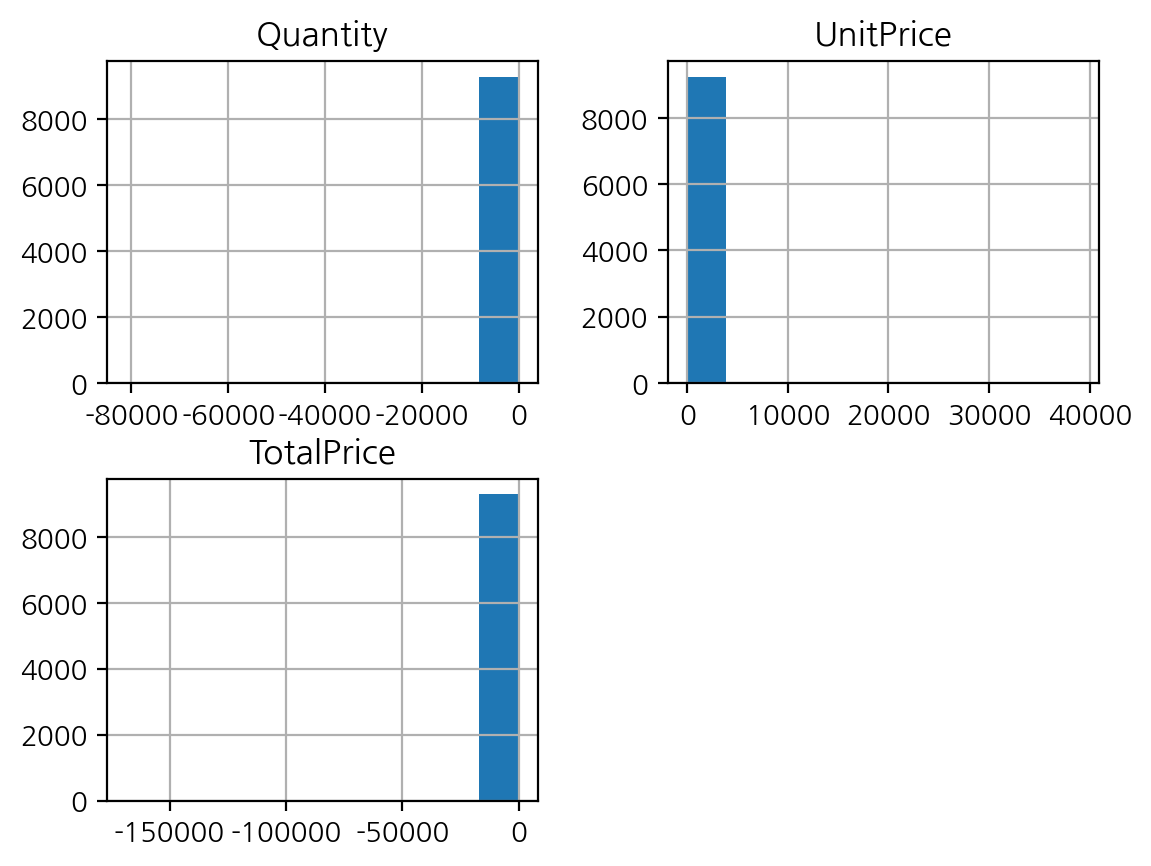

In [30]:
# 취소 주문건의 경우, Quantity & UnitPrice 모두 minus value임을 확인
df[df["InvoiceCode"] == "C"].hist();

In [31]:
# 제품별 구매 취소 비율 확인
stock_cancel = pd.crosstab(df["StockCode"], df["isCancel"])

In [32]:
df_stock_desc = df[["StockCode", "Description"]].drop_duplicates("StockCode").dropna().set_index("StockCode")
df_stock_desc

Description
StockCode                                     
85123A      WHITE HANGING HEART T-LIGHT HOLDER
71053                      WHITE METAL LANTERN
84406B          CREAM CUPID HEARTS COAT HANGER
84029G     KNITTED UNION FLAG HOT WATER BOTTLE
84029E          RED WOOLLY HOTTIE WHITE HEART.
...                                        ...
85179a                 GREEN BITTY LIGHT CHAIN
23617      SET 10 CARDS SWIRLY XMAS TREE 17104
90214U               LETTER "U" BLING KEY RING
47591b                SCOTTIES CHILDRENS APRON
23843              PAPER CRAFT , LITTLE BIRDIE

[3894 rows x 1 columns]

In [33]:
df_stock_desc[df_stock_desc.duplicated()]

Description
StockCode                                   
82613C        METAL SIGN,CUPCAKE SINGLE HOOK
10135           COLOURING PENCILS BROWN TUBE
15056bl              EDWARDIAN PARASOL BLACK
15056p                EDWARDIAN PARASOL PINK
47566b                TEA TIME PARTY BUNTING
...                                      ...
72802c     VANILLA SCENT CANDLE JEWELLED BOX
85049c               ROMANTIC PINKS RIBBONS 
85034b     3 WHITE CHOC MORRIS BOXED CANDLES
85179a               GREEN BITTY LIGHT CHAIN
47591b              SCOTTIES CHILDRENS APRON

[141 rows x 1 columns]

In [34]:
stock_cancel = stock_cancel.join(df_stock_desc)

In [35]:
stock_cancel

False  True                         Description
StockCode                                                    
10002            73     0         INFLATABLE POLITICAL GLOBE 
10080            24     0            GROOVY CACTUS INFLATABLE
10120            30     0                        DOGGY RUBBER
10123C            4     0               HEARTS WRAPPING TAPE 
10123G            1     0                                 NaN
...             ...   ...                                 ...
gift_0001_20     10     0  Dotcomgiftshop Gift Voucher £20.00
gift_0001_30      8     0  Dotcomgiftshop Gift Voucher £30.00
gift_0001_40      3     0  Dotcomgiftshop Gift Voucher £40.00
gift_0001_50      4     0  Dotcomgiftshop Gift Voucher £50.00
m                 1     0                              Manual

[4070 rows x 3 columns]

In [36]:
stock_cancel.columns = ["Normal", "Cancel", "Desc"]
stock_cancel.nlargest(10, "Normal")

Normal  Cancel                                Desc
StockCode                                                    
85123A       2271      42  WHITE HANGING HEART T-LIGHT HOLDER
85099B       2115      44             JUMBO BAG RED RETROSPOT
22423        2022     181            REGENCY CAKESTAND 3 TIER
47566        1707      20                       PARTY BUNTING
20725        1595      44             LUNCH BAG RED RETROSPOT
84879        1490      12       ASSORTED COLOUR BIRD ORNAMENT
22197        1426      50                SMALL POPCORN HOLDER
22720        1403      74   SET OF 3 CAKE TINS PANTRY DESIGN 
21212        1370      15     PACK OF 72 RETROSPOT CAKE CASES
20727        1328      22             LUNCH BAG  BLACK SKULL.

### 비회원 주문 및 취소 주문 전처리

In [37]:
# Quantity가 '-'인 경우, 대부분 InvoiceNo에 'C' 포함
df.loc[df["Quantity"] < 0, "InvoiceCode"].value_counts()

InvoiceCode
C    9288
     1336
Name: count, dtype: int64

In [38]:
df.loc[(df["Quantity"] < 0) & (df["InvoiceCode"] != "C")]

InvoiceNo StockCode Description  Quantity         InvoiceDate  \
2406      536589     21777         NaN       -10 2010-12-01 16:50:00   
4347      536764    84952C         NaN       -38 2010-12-02 14:42:00   
7188      536996     22712         NaN       -20 2010-12-03 15:30:00   
7189      536997     22028         NaN       -20 2010-12-03 15:30:00   
7190      536998     85067         NaN        -6 2010-12-03 15:30:00   
...          ...       ...         ...       ...                 ...   
535333    581210     23395       check       -26 2011-12-07 18:36:00   
535335    581212     22578        lost     -1050 2011-12-07 18:38:00   
535336    581213     22576       check       -30 2011-12-07 18:38:00   
536908    581226     23090     missing      -338 2011-12-08 09:56:00   
538919    581422     23169     smashed      -235 2011-12-08 15:24:00   

        UnitPrice CustomerID         Country  isRegistered  TotalPrice  \
2406          0.0        NaN  United Kingdom         False        -0.0   
4347          0.0        NaN  United Kingdom         False        -0.0   
7188          0.0        NaN  United Kingdom         False        -0.0   
7189          0.0        NaN  United Kingdom         False        -0.0   
7190          0.0        NaN  United Kingdom         False        -0.0   
...           ...        ...             ...           ...         ...   
535333        0.0        NaN  United Kingdom         False        -0.0   
535335        0.0        NaN  United Kingdom         False        -0.0   
535336        0.0        NaN  United Kingdom         False        -0.0   
536908        0.0        NaN  United Kingdom         False        -0.0   
538919        0.0        NaN  United Kingdom         False        -0.0   

       InvoiceCode  isCancel  
2406                   False  
4347                   False  
7188                   False  
7189                   False  
7190                   False  
...            ...       ...  
535333                 False  
535335                 False  
535336                 False  
536908                 False  
538919                 False  

[1336 rows x 12 columns]

In [39]:
# 주문 취소로 추정되는 품목 확인
df.loc[(df["Quantity"] < 0) & (df["InvoiceCode"]!= "C"), "Description"].value_counts()

Description
check                        120
damages                       45
damaged                       42
?                             41
sold as set on dotcom         20
                            ... 
FRYING PAN BLUE POLKADOT       0
FRYING PAN PINK POLKADOT       0
FRYING PAN RED POLKADOT        0
FRYING PAN RED RETROSPOT       0
MEMO BOARD COTTAGE DESIGN      0
Name: count, Length: 4223, dtype: int64

In [40]:
# StockCode가 모두 5자리는 아닌 것으로 보임
df.loc[df["UnitPrice"] < 0]

InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
299983   A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   

        UnitPrice CustomerID         Country  isRegistered  TotalPrice  \
299983  -11062.06        NaN  United Kingdom         False   -11062.06   
299984  -11062.06        NaN  United Kingdom         False   -11062.06   

       InvoiceCode  isCancel  
299983           A     False  
299984           A     False

In [41]:
# StockCode 자릿수 확인
df["StockCode"].str.len().value_counts()

StockCode
5     487036
6      51488
4       1276
1        715
3        710
7        390
2        144
12        71
9         48
8         31
Name: count, dtype: int64

In [42]:
# 유효 주문으로 추정되는 데이터에 "C" 포함 InvoiceCode가 있는지 확인
df.loc[df["CustomerID"].notnull() & 
       (df["Quantity"] > 0) & 
       (df["UnitPrice"] > 0), "InvoiceCode"].value_counts()

InvoiceCode
    397884
Name: count, dtype: int64

In [43]:
# 유효 주문건만을 별도로 df_valid에 지정
df_valid = df.loc[df["CustomerID"].notnull() & 
       (df["Quantity"] > 0) & 
       (df["UnitPrice"] > 0)].copy()

In [44]:
# 약 14만 건의 데이터 필터링
df.shape, df_valid.shape

((541909, 12), (397884, 12))

In [45]:
# 중복 데이터 제거
df_valid = df_valid.drop_duplicates().copy()
df_valid.shape

(392692, 12)

In [46]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   InvoiceNo     392692 non-null  object  
 1   StockCode     392692 non-null  category
 2   Description   392692 non-null  category
 3   Quantity      392692 non-null  int64   
 4   InvoiceDate   392692 non-null  category
 5   UnitPrice     392692 non-null  float64 
 6   CustomerID    392692 non-null  object  
 7   Country       392692 non-null  category
 8   isRegistered  392692 non-null  bool    
 9   TotalPrice    392692 non-null  float64 
 10  InvoiceCode   392692 non-null  object  
 11  isCancel      392692 non-null  bool    
dtypes: bool(2), category(4), float64(2), int64(1), object(3)
memory usage: 25.3+ MB


In [47]:
# InvoiceDate의 dtype을 category -> datetime으로 변경
df_valid["InvoiceDate"] = pd.to_datetime(df_valid["InvoiceDate"])

In [48]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     392692 non-null  object        
 1   StockCode     392692 non-null  category      
 2   Description   392692 non-null  category      
 3   Quantity      392692 non-null  int64         
 4   InvoiceDate   392692 non-null  datetime64[ns]
 5   UnitPrice     392692 non-null  float64       
 6   CustomerID    392692 non-null  object        
 7   Country       392692 non-null  category      
 8   isRegistered  392692 non-null  bool          
 9   TotalPrice    392692 non-null  float64       
 10  InvoiceCode   392692 non-null  object        
 11  isCancel      392692 non-null  bool          
dtypes: bool(2), category(3), datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 26.9+ MB


In [49]:
# year, month, day, dayofweek 파생변수 생성
df_valid["InvoiceYear"] = df_valid["InvoiceDate"].dt.year
df_valid["InvoiceMonth"] = df_valid["InvoiceDate"].dt.month
df_valid["InvoiceDay"] = df_valid["InvoiceDate"].dt.day
df_valid["InvoiceDow"] = df_valid["InvoiceDate"].dt.dayofweek
df_valid["InvoiceYM"] = df_valid["InvoiceDate"].astype(str).str[:7]

In [50]:
df_valid.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  isRegistered  \
0 2010-12-01 08:26:00       2.55    17850.0  United Kingdom          True   
1 2010-12-01 08:26:00       3.39    17850.0  United Kingdom          True   
2 2010-12-01 08:26:00       2.75    17850.0  United Kingdom          True   
3 2010-12-01 08:26:00       3.39    17850.0  United Kingdom          True   
4 2010-12-01 08:26:00       3.39    17850.0  United Kingdom          True   

   TotalPrice InvoiceCode  isCancel  InvoiceYear  InvoiceMonth  InvoiceDay  \
0       15.30                 False         2010            12           1   
1       20.34                 False         2010            12           1   
2       22.00                 False         2010            12           1   
3       20.34                 False         2010            12           1   
4       20.34                 False         2010            12           1   

   InvoiceDow InvoiceYM  
0           2   2010-12  
1           2   2010-12  
2           2   2010-12  
3           2   2010-12  
4           2   2010-12

In [51]:
df_valid[["InvoiceDate", "InvoiceYM"]].head()

InvoiceDate InvoiceYM
0 2010-12-01 08:26:00   2010-12
1 2010-12-01 08:26:00   2010-12
2 2010-12-01 08:26:00   2010-12
3 2010-12-01 08:26:00   2010-12
4 2010-12-01 08:26:00   2010-12

In [52]:
# Time/Hour 파생변수 생성
df_valid["InvoiceTime"] = df_valid["InvoiceDate"].dt.time
df_valid["InvoiceHour"] = df_valid["InvoiceDate"].dt.hour

In [53]:
df_valid.head(1)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   

          InvoiceDate  UnitPrice CustomerID         Country  isRegistered  \
0 2010-12-01 08:26:00       2.55    17850.0  United Kingdom          True   

   TotalPrice InvoiceCode  isCancel  InvoiceYear  InvoiceMonth  InvoiceDay  \
0        15.3                 False         2010            12           1   

   InvoiceDow InvoiceYM InvoiceTime  InvoiceHour  
0           2   2010-12    08:26:00            8

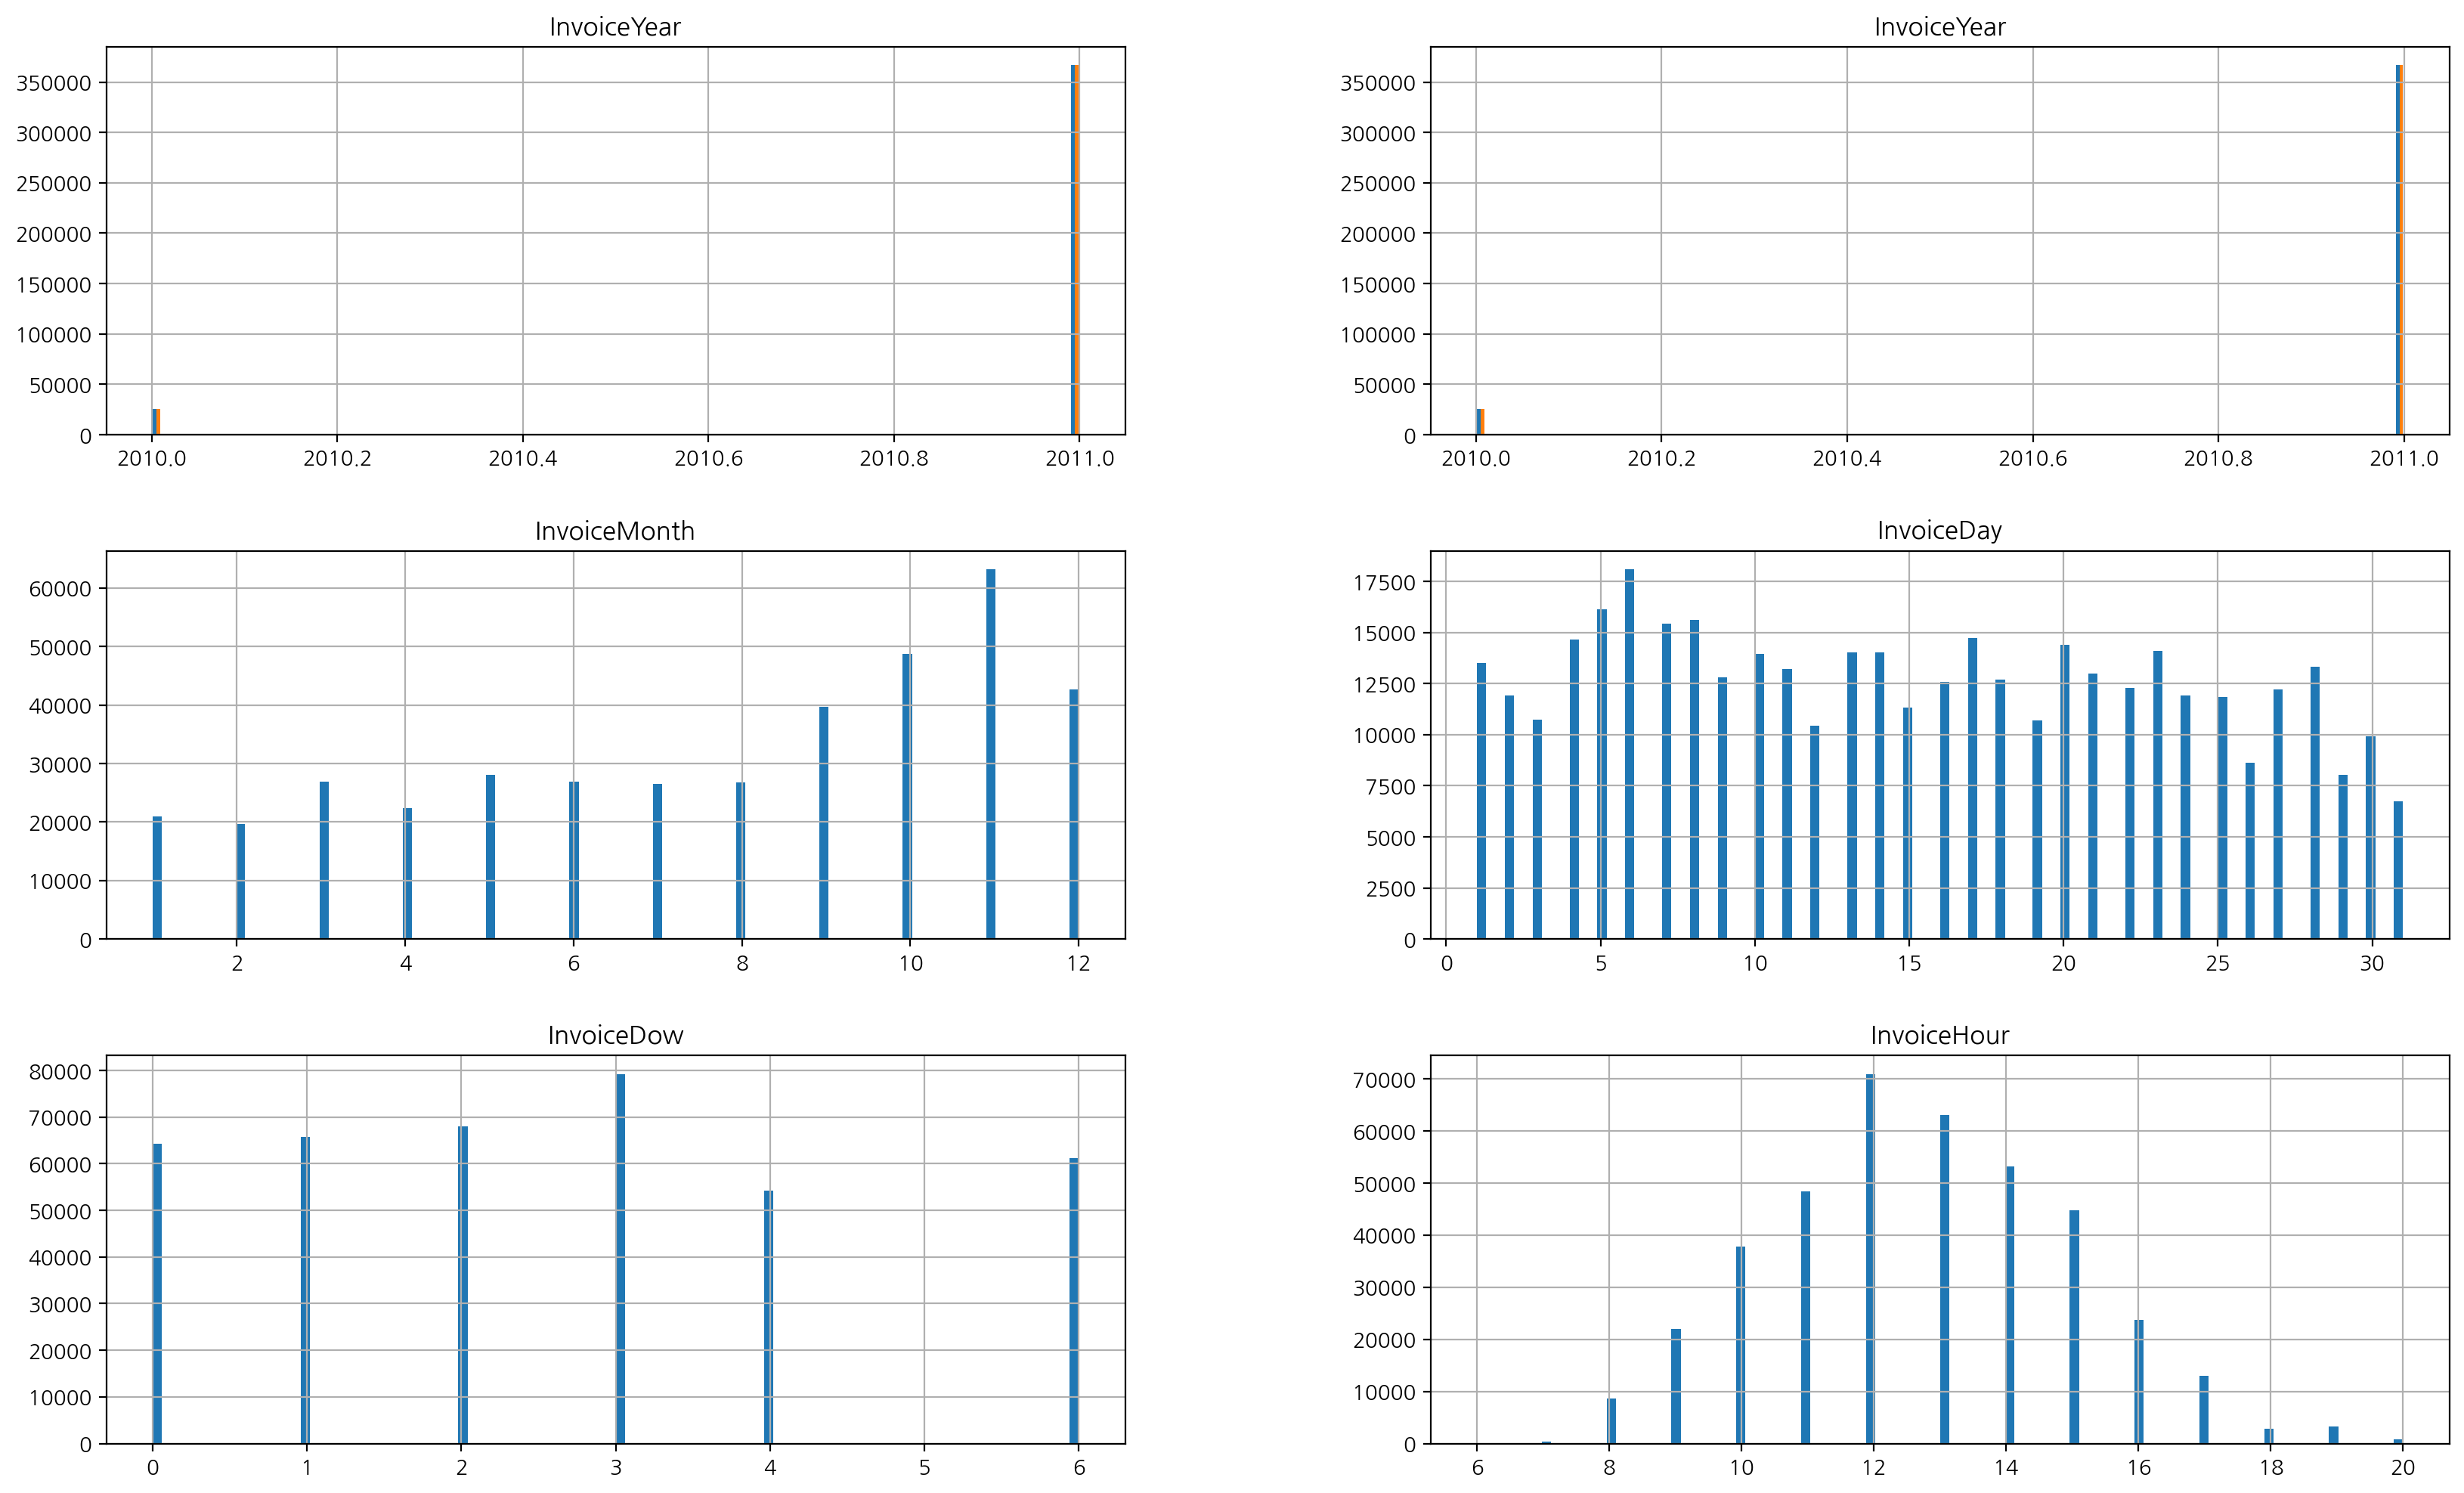

In [54]:
# Datetime 관련 변수 분포 시각화
df_valid[["InvoiceYear", "InvoiceYear", "InvoiceMonth", "InvoiceDay", "InvoiceDow", "InvoiceHour"]]\
    .hist(figsize=(20, 12), bins=100);

<Axes: xlabel='InvoiceYear', ylabel='count'>

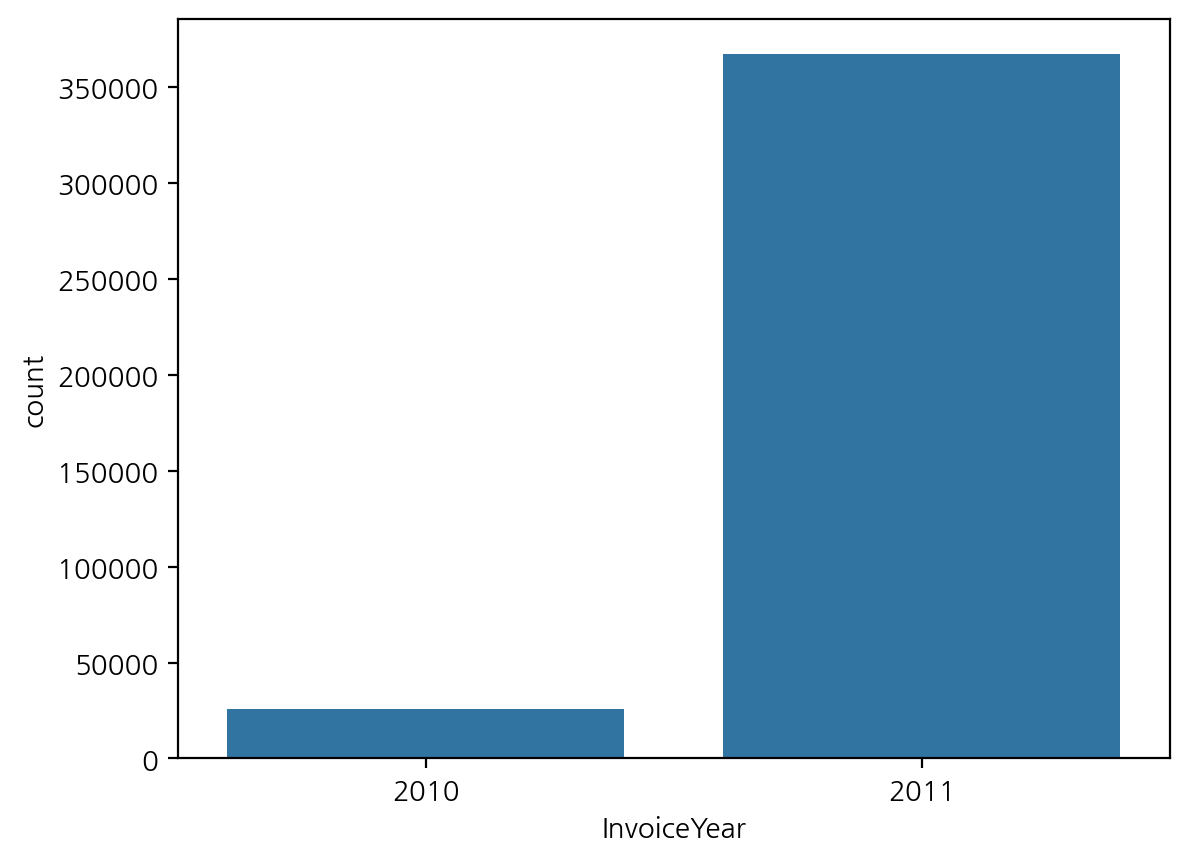

In [55]:
sns.countplot(data=df_valid, x="InvoiceYear")

<Axes: xlabel='InvoiceMonth', ylabel='count'>

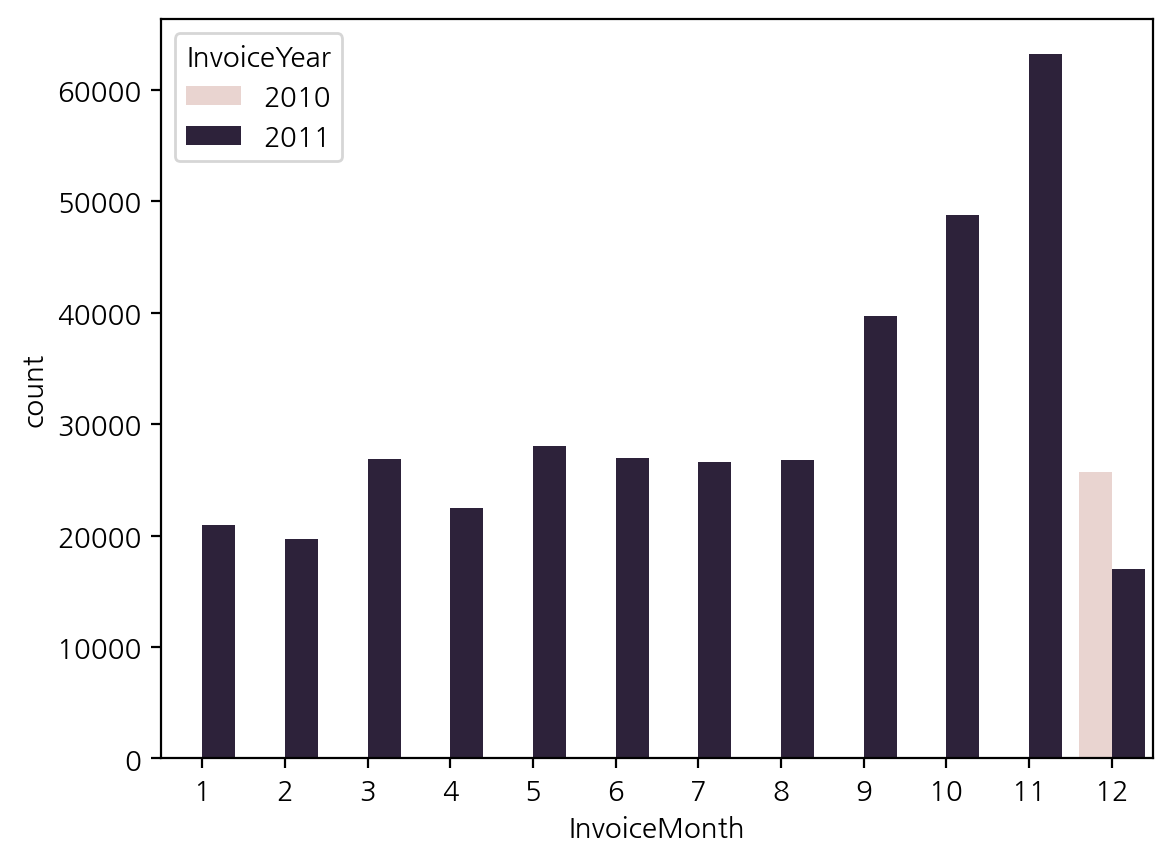

In [56]:
sns.countplot(data=df_valid, x="InvoiceMonth", hue="InvoiceYear")

In [57]:
# 2010.12 ~ 2011.12
df_valid["InvoiceDate"].describe()

count                           392692
mean     2011-07-10 19:13:07.771892480
min                2010-12-01 08:26:00
25%                2011-04-07 11:12:00
50%                2011-07-31 12:02:00
75%                2011-10-20 12:53:00
max                2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

In [58]:
# 2011-09부터 뚜렷한 성장세가 나타나기 시작
# 2011-12는 09일까지만의 데이터를 보유

<Axes: xlabel='InvoiceYM', ylabel='count'>

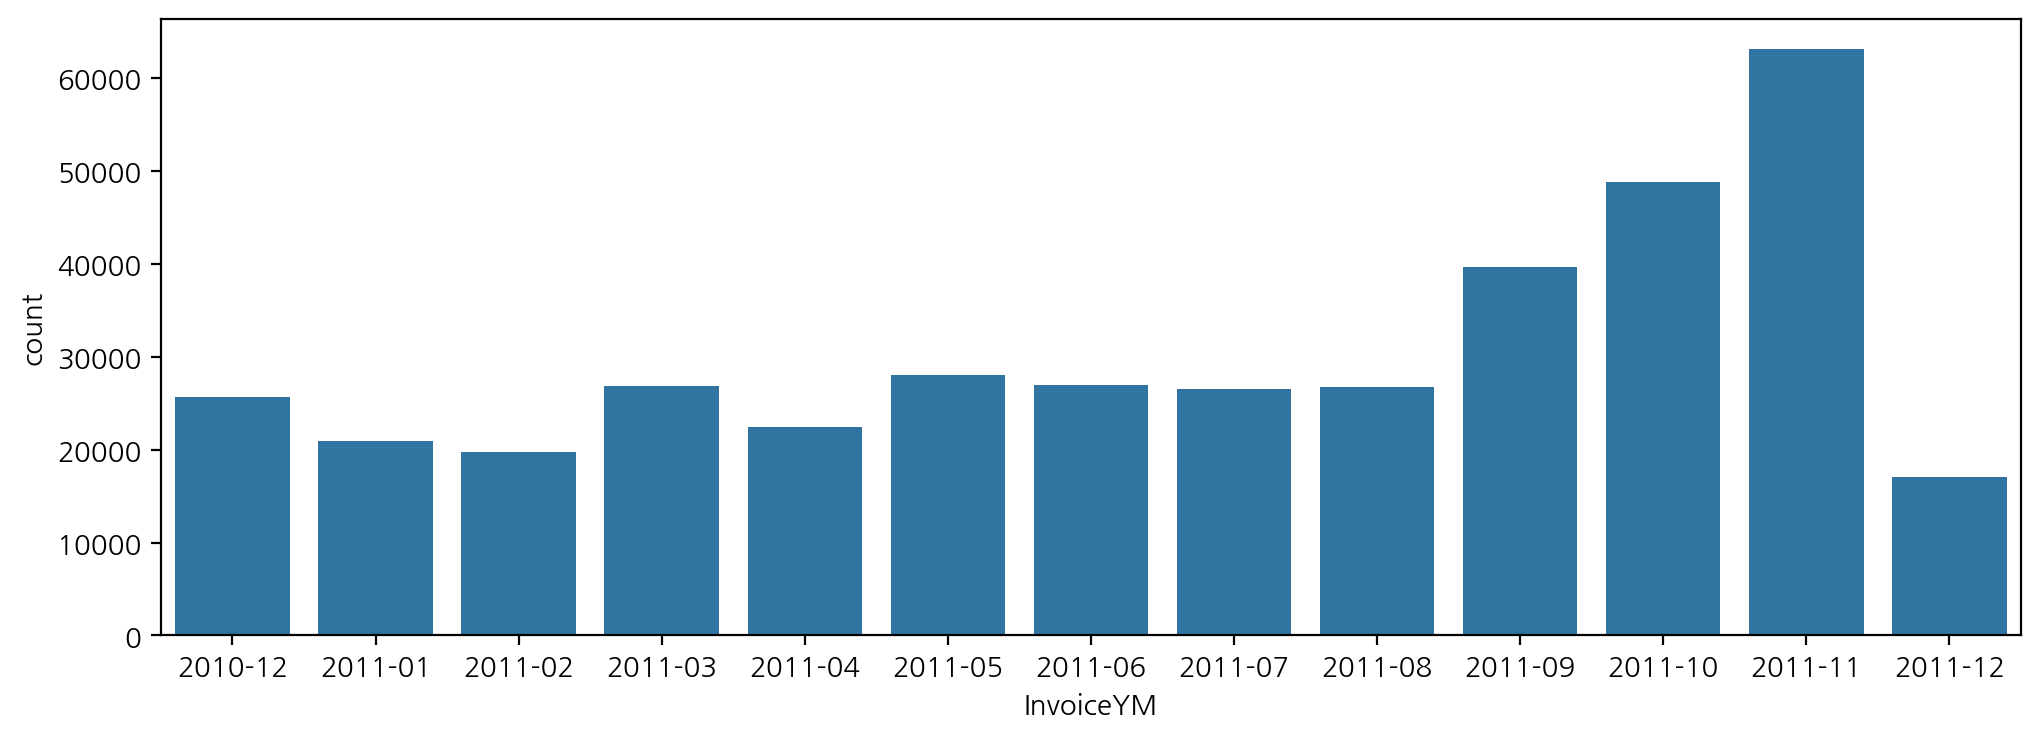

In [59]:
plt.figure(figsize=(12,4))
sns.countplot(data=df_valid, x="InvoiceYM")

<Axes: xlabel='InvoiceDow', ylabel='count'>

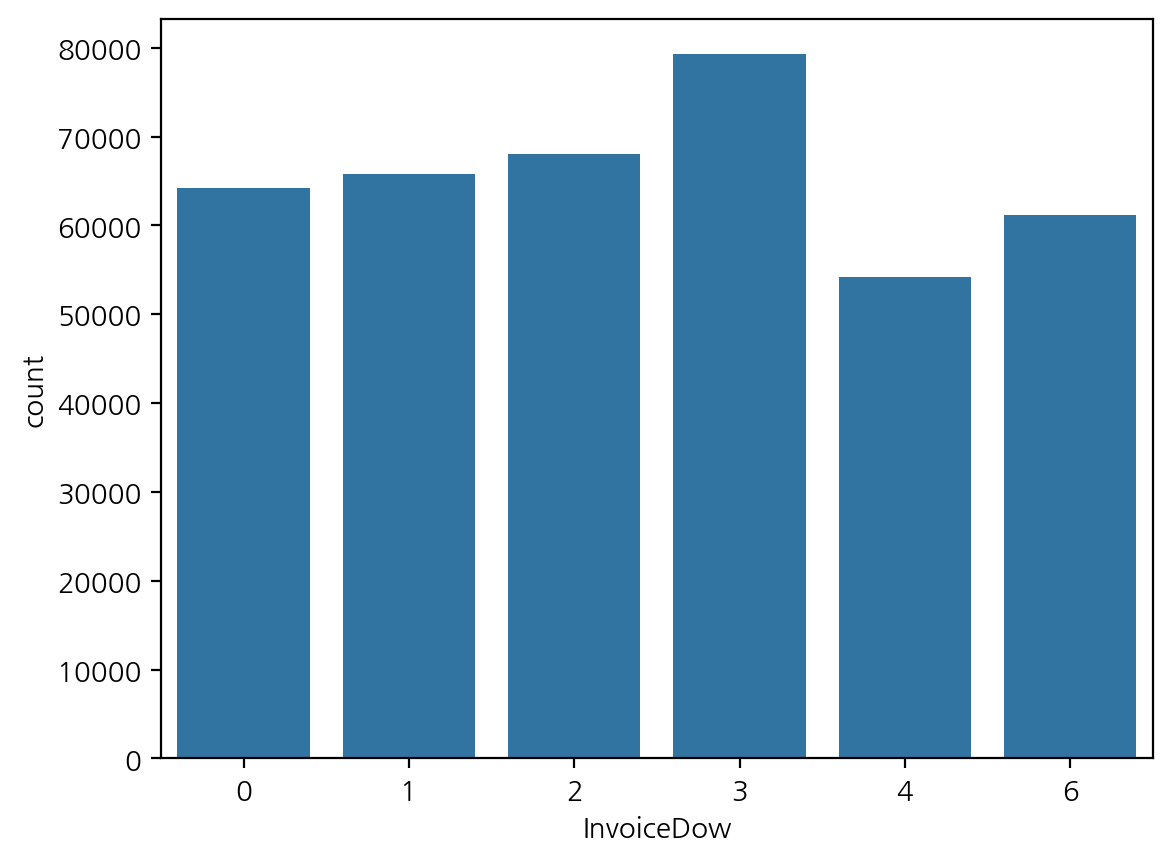

In [60]:
# 요일별 주문건수 확인
sns.countplot(data=df_valid, x="InvoiceDow")

In [61]:
# 토요일 주문 데이터 부재
df_valid["InvoiceDow"].value_counts().sort_index()

InvoiceDow
0    64231
1    65744
2    68040
3    79243
4    54222
6    61212
Name: count, dtype: int64

In [62]:
day_name = [w for w in "월화수목금토일"]
day_name

['월', '화', '수', '목', '금', '토', '일']

In [63]:
day_name.remove("토")
day_name

['월', '화', '수', '목', '금', '일']

In [64]:
dow_count = df_valid["InvoiceDow"].value_counts().sort_index()
dow_count.index = day_name

<Axes: >

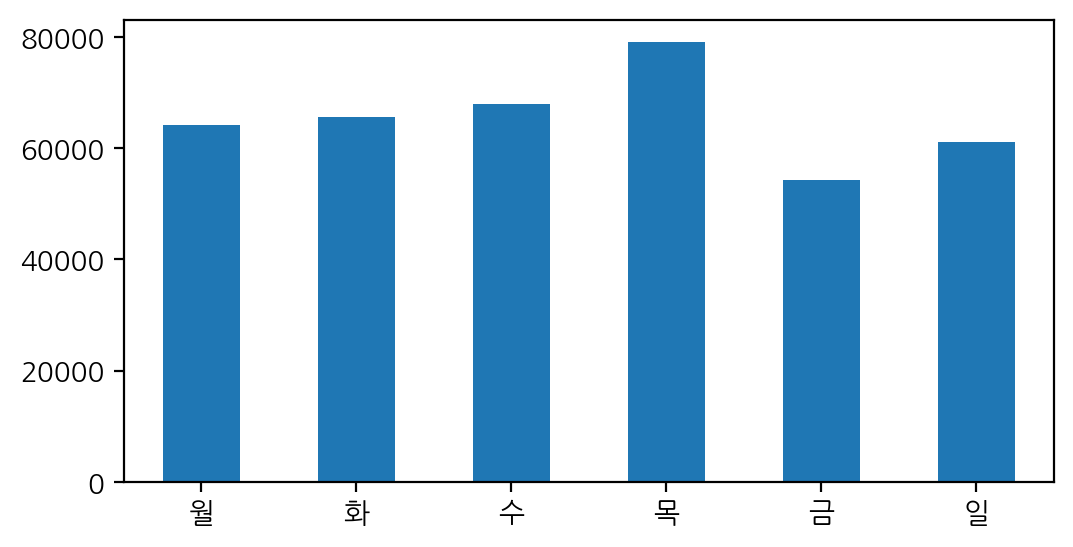

In [65]:
dow_count.plot.bar(figsize=(6, 3), rot=0)

<Axes: xlabel='InvoiceDayName', ylabel='count'>

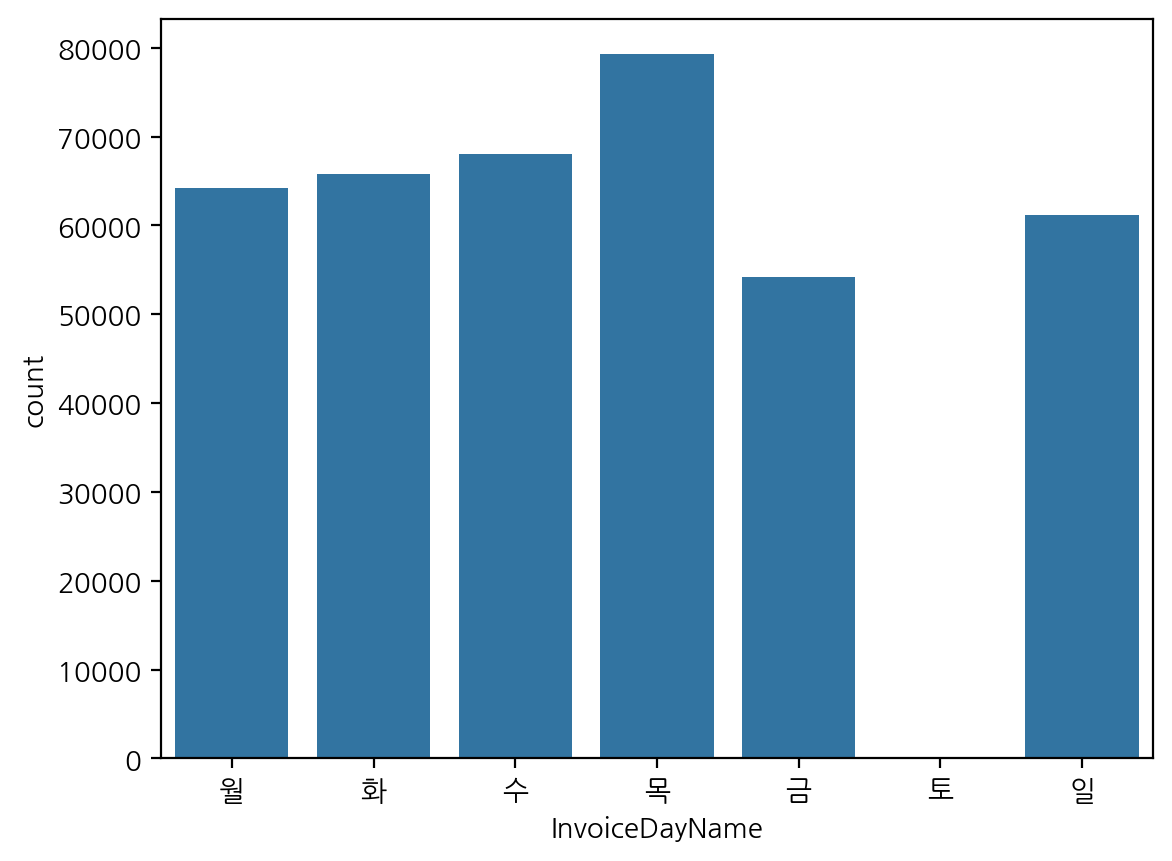

In [66]:
# DayOfWeek를 '월-일'로 변경한 파생변수 "InvoiceDayName" 생성
df_valid["InvoiceDayName"] = df_valid["InvoiceDow"].map(lambda x: "월화수목금토일"[x])
sns.countplot(data=df_valid, x="InvoiceDayName", order=list("월화수목금토일"))

<Axes: xlabel='InvoiceHour', ylabel='TotalPrice'>

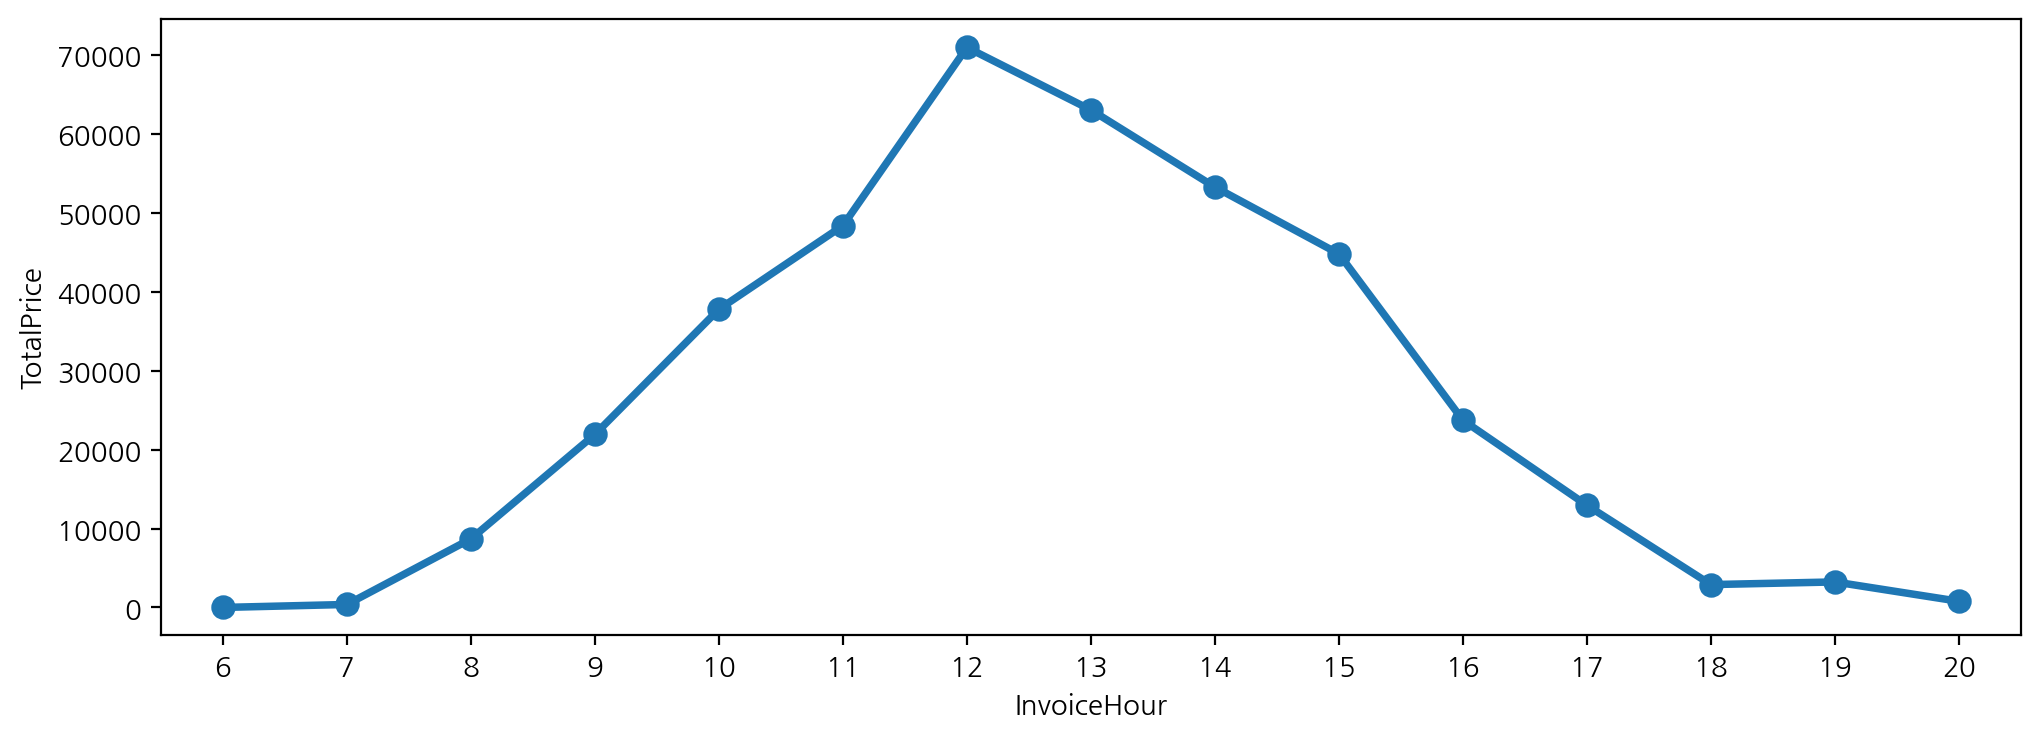

In [67]:
# 시간대별 주문 건수 확인
plt.figure(figsize=(12, 4))
sns.pointplot(data=df_valid, x="InvoiceHour", y="TotalPrice", estimator=len)

<Axes: xlabel='InvoiceHour', ylabel='TotalPrice'>

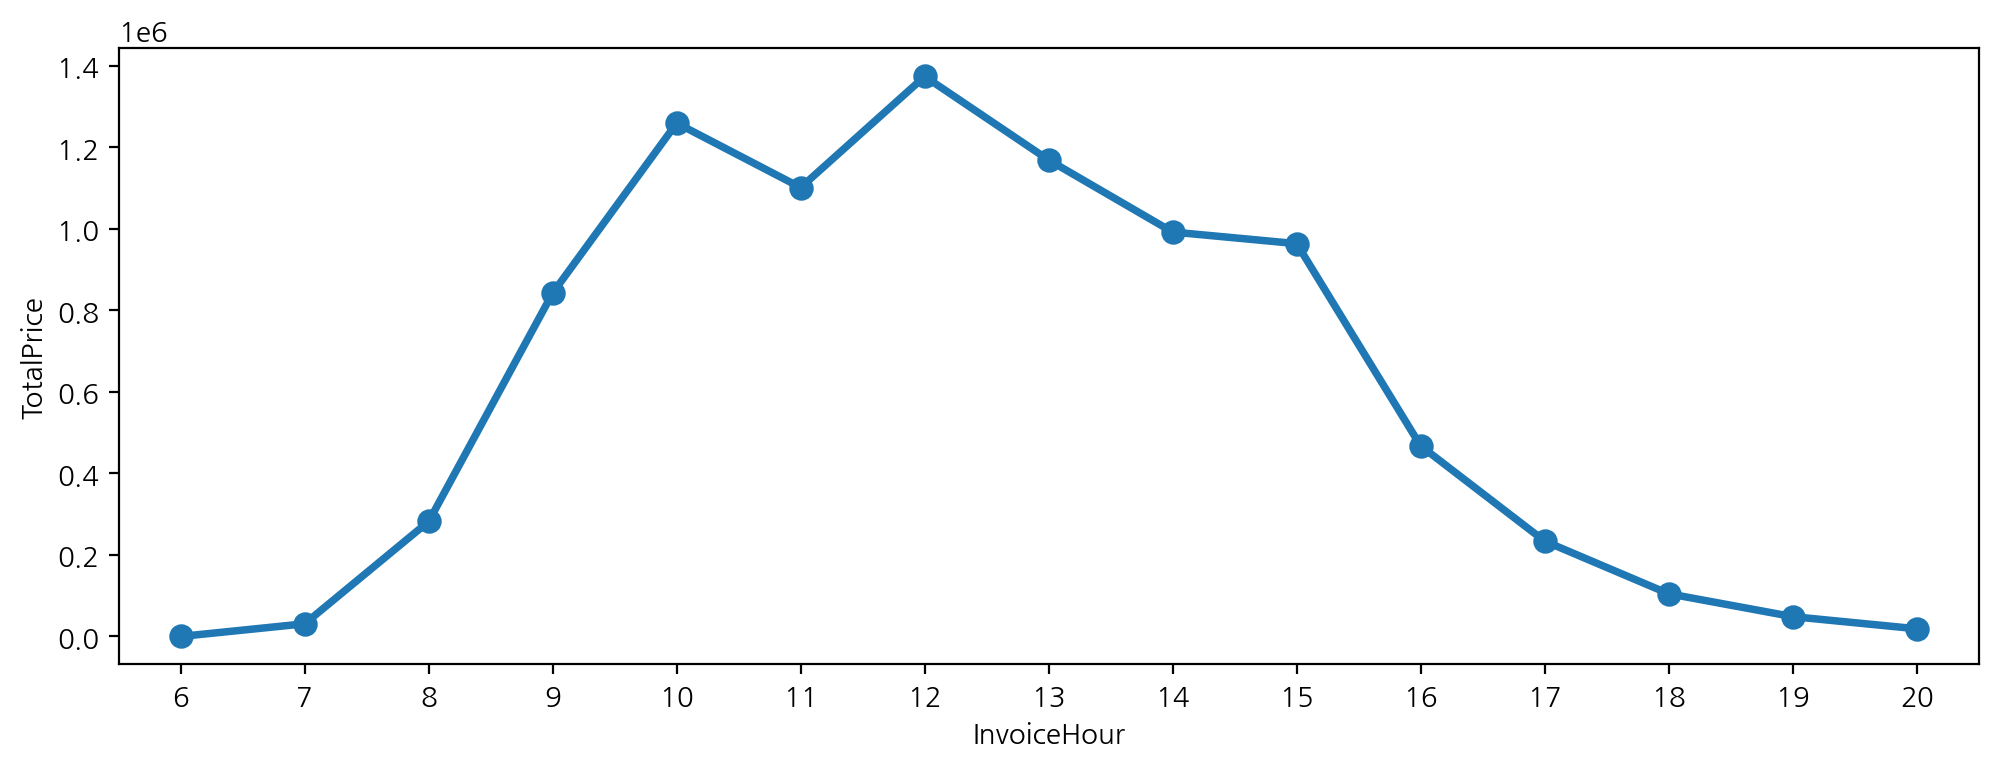

In [68]:
# 시간대별 매출액 확인
plt.figure(figsize=(12, 4))
sns.pointplot(data=df_valid, x="InvoiceHour", y="TotalPrice", estimator="sum", errorbar=None)

In [69]:
hour_dow = pd.crosstab(df_valid["InvoiceHour"], df_valid["InvoiceDayName"])
hour_dow = hour_dow[list("월화수목금일")]
hour_dow

InvoiceDayName      월      화      수      목     금      일
InvoiceHour                                            
6                   0      0      0      1     0      0
7                  61     65     59     64   130      0
8                1563   1710   1818   1763  1833      0
9                4345   4542   4078   4569  4368     25
10               6106   6575   6927   7528  7161   3476
11               7401   8418   8292   7134  7189   9931
12              10585  11903  12684  12908  9765  13093
13              10459  10274  11137  11446  8300  11403
14               9119   9428   8716   9173  7227   9588
15               7634   7219   7752   7616  4682   9887
16               3999   3592   4197   6031  2087   3809
17               2959   1951   2348   4300  1383      0
18                  0     67      0   2826     2      0
19                  0      0     14   3131    88      0
20                  0      0     18    753     7      0

In [70]:
# 전반적으로 10~15시 사이에 주문량이 집중되며, 12시에 최고점 기록
# 일요일의 경우 낮 시간대인 11~15시 집중 정도가 높음
# 그 외 평일의 경우 09시부터 주문 증가가 나타나 17시에 마감하는 경향
# 단, 목요일의 경우 배송 일정 등을 고려하여 주문이 집중되는 것으로 보이며,
# 19시까지 상당량의 주문이 이루어지는 것으로 나타남
hour_dow.style.background_gradient().format("{:,}")

In [71]:
hour_dow.style.background_gradient(axis=1).format("{:,}")

In [72]:
hour_dow.style.background_gradient(axis=None).format("{:,}")

In [73]:
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

<Axes: xlabel='InvoiceDayName', ylabel='InvoiceHour'>

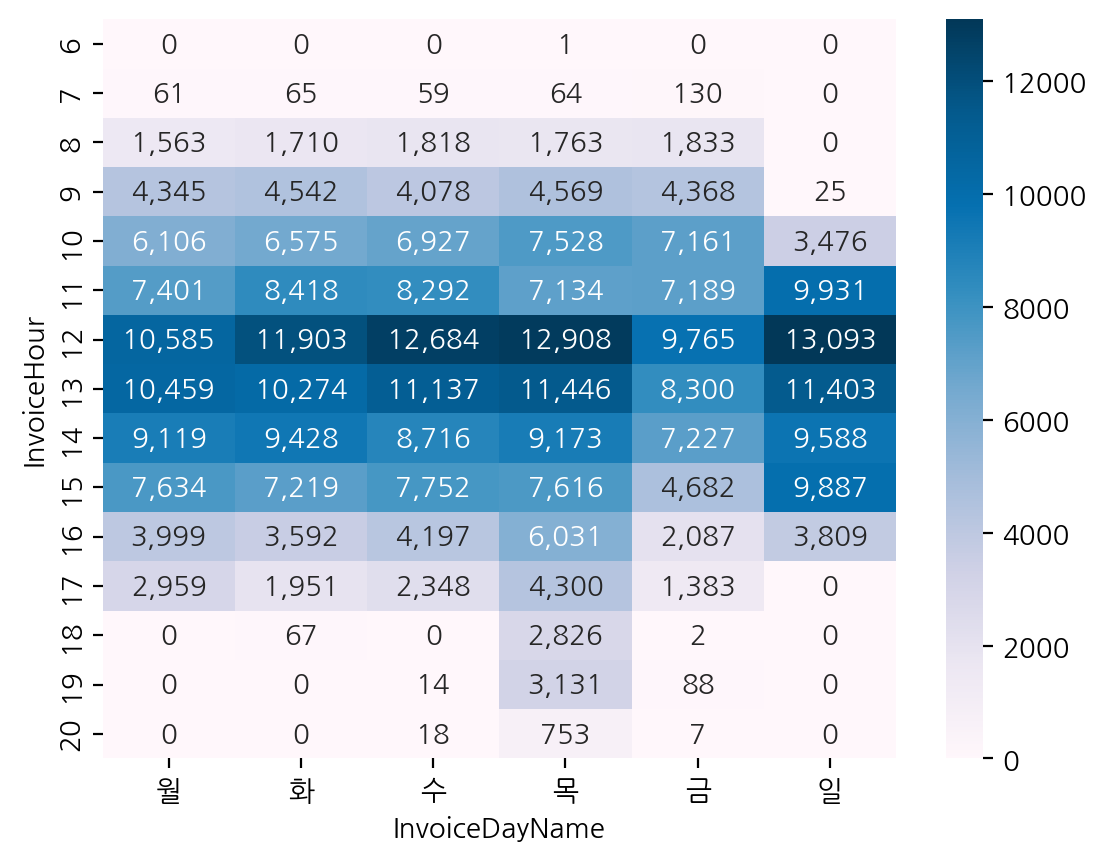

In [74]:
sns.heatmap(hour_dow, cmap="PuBu", annot=True, fmt=",.0f")

<Figure size 1200x800 with 0 Axes>

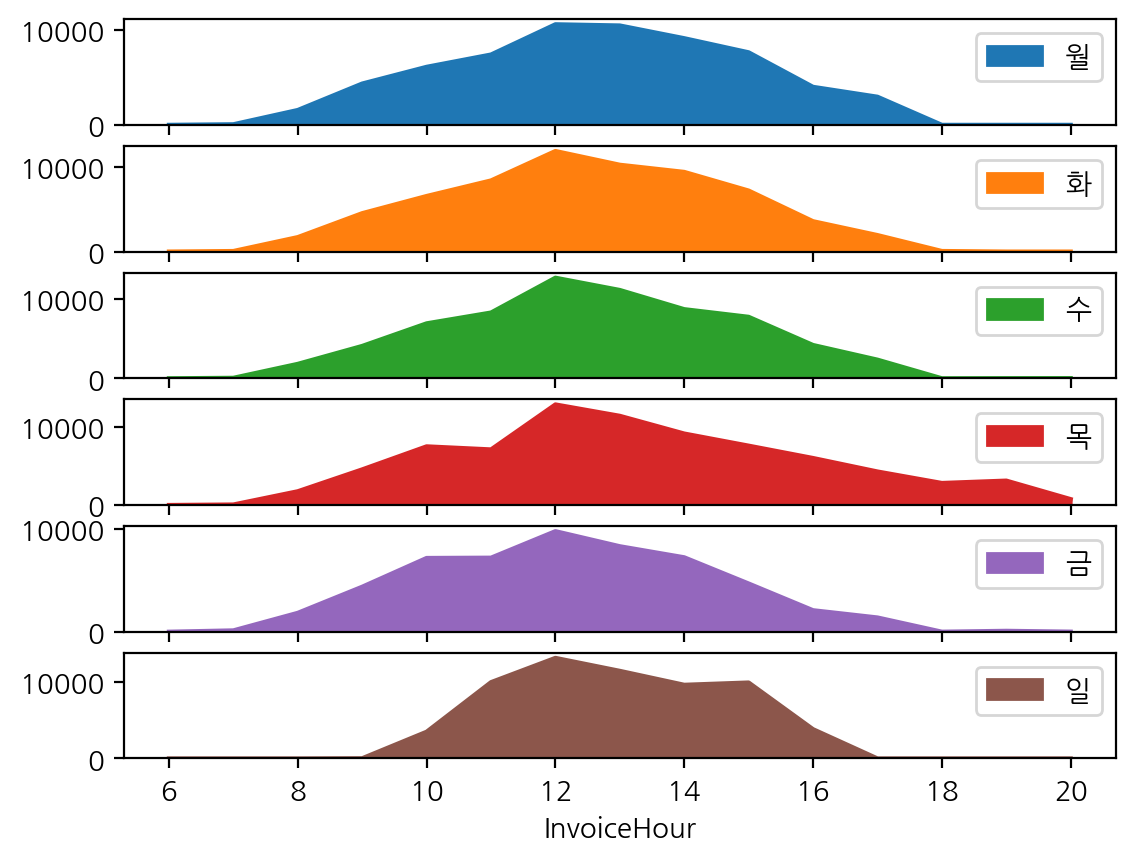

In [75]:
plt.figure(figsize=(12, 8))
hour_dow.plot(subplots=True, kind="area");

## ARPU, ARPPU
* ARPU (Average Revenue Per User):
    * User 1명당 평균 매출
    * APRU = Revenue / No. of active users
* ARPPU (Average Revenue Per Paying User):
    * Paying user 1명당 평균 매출
    * ARPU와 ARPPU의 차이를 통해 BM 및 subscription plan 조정 여부 검토
* ARPDAU (Average Revenue Per Daily Active User)
    * Active user 1명당 일별 평균 매출
    * 평일/주말 ARDPAU에 차이가 있는 경우, 개선사항 검토

In [76]:
arppu = df_valid.groupby(["InvoiceYM"]).agg({"TotalPrice": "sum", 
                                             "CustomerID": "nunique"})
arppu.style.format("{:,.0f}")

In [77]:
arppu["ARPPU"] = arppu["TotalPrice"] / arppu["CustomerID"]
arppu.style.format("{:,.0f}")

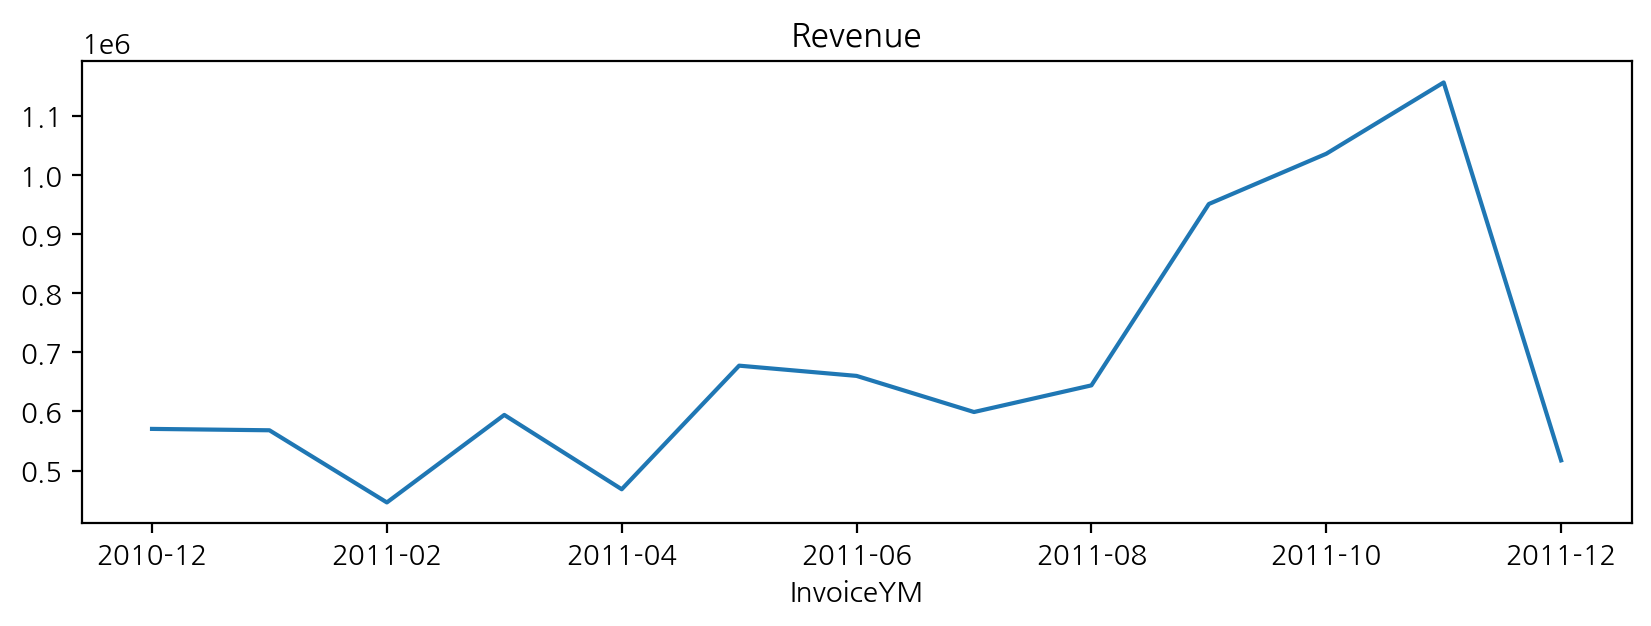

In [78]:
arppu["TotalPrice"].plot(figsize=(10, 3), title="Revenue");

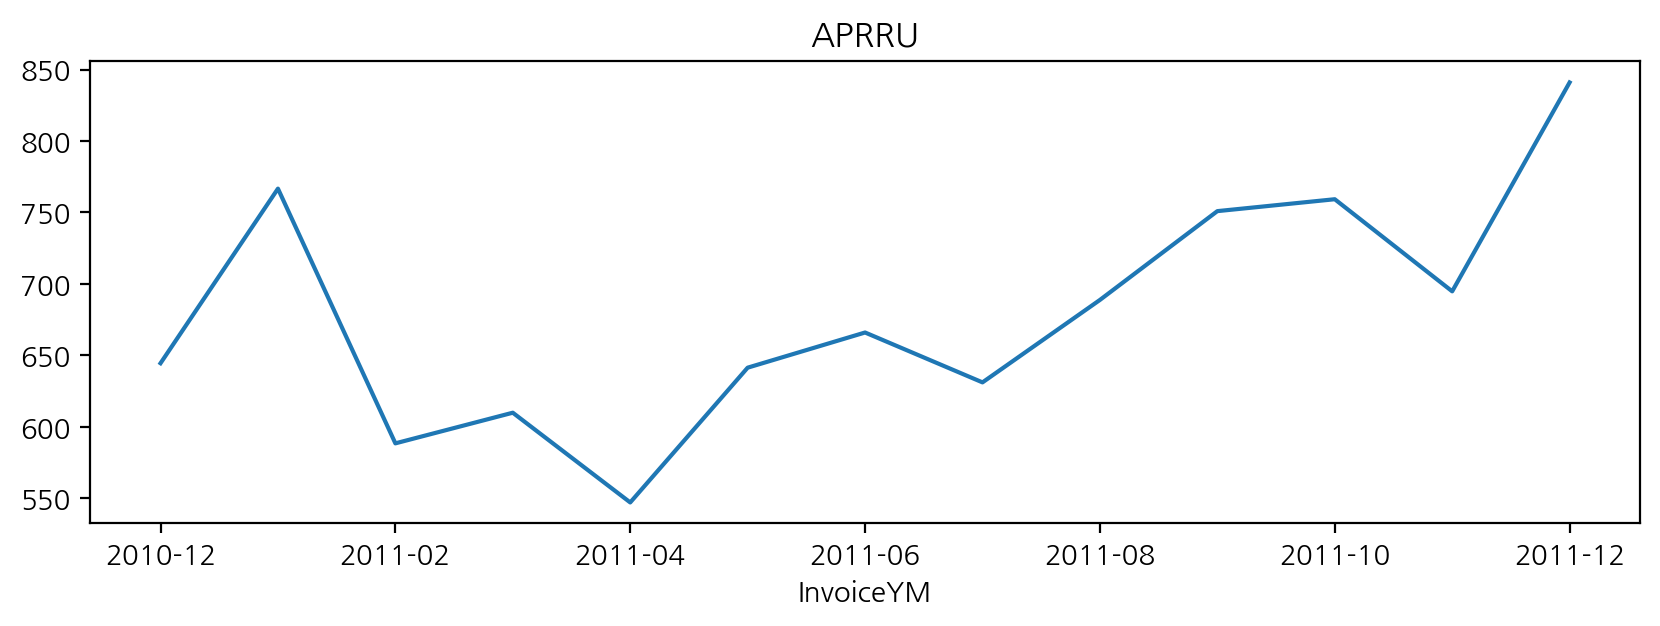

In [79]:
arppu["ARPPU"].plot(figsize=(10, 3), title="APRRU");

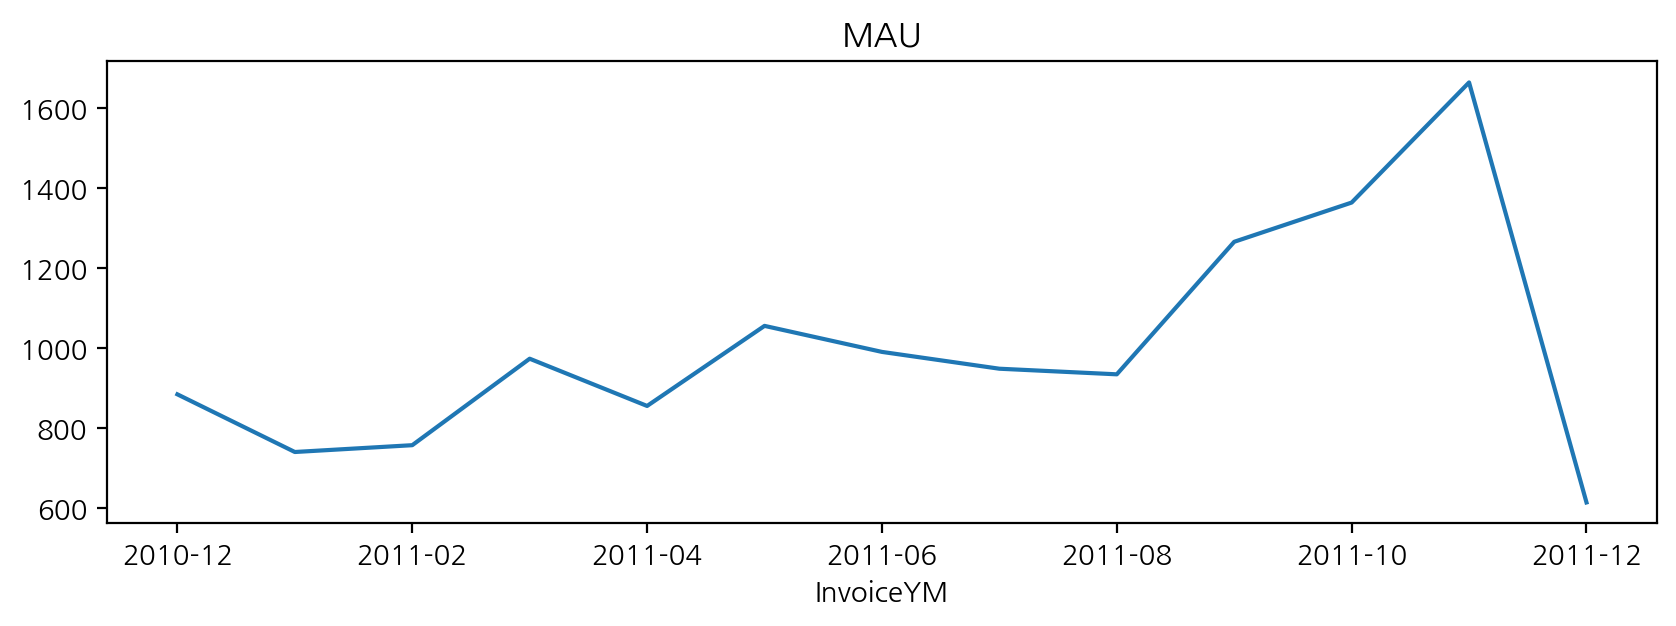

In [80]:
arppu["CustomerID"].plot(figsize=(10, 3), title="MAU");

In [81]:
# User별 구매 빈도 확인
cust_agg = df_valid.groupby("CustomerID").agg({"InvoiceNo": "count", "TotalPrice": ["mean", "sum"]})
cust_agg

InvoiceNo    TotalPrice          
               count          mean       sum
CustomerID                                  
12346.0            1  77183.600000  77183.60
12347.0          182     23.681319   4310.00
12348.0           31     57.975484   1797.24
12349.0           73     24.076027   1757.55
12350.0           17     19.670588    334.40
...              ...           ...       ...
18280.0           10     18.060000    180.60
18281.0            7     11.545714     80.82
18282.0           12     14.837500    178.05
18283.0          721      2.837074   2045.53
18287.0           70     26.246857   1837.28

[4338 rows x 3 columns]

In [82]:
# Outlier 존재
cust_agg.describe()

InvoiceNo    TotalPrice               
             count          mean            sum
count  4338.000000   4338.000000    4338.000000
mean     90.523744     68.381590    2048.688081
std     225.506968   1467.918294    8985.230220
min       1.000000      2.136970       3.750000
25%      17.000000     12.393196     306.482500
50%      41.000000     17.755000     668.570000
75%      98.000000     24.878950    1660.597500
max    7676.000000  77183.600000  280206.020000

In [83]:
cust_agg.columns

MultiIndex([( 'InvoiceNo', 'count'),
            ('TotalPrice',  'mean'),
            ('TotalPrice',   'sum')],
           )

In [84]:
cust_agg[cust_agg[("InvoiceNo", "count")] >= 1000].sort_values(("InvoiceNo", "count"))

InvoiceNo  TotalPrice           
               count        mean        sum
CustomerID                                 
13081.0         1024   27.673223   28337.38
14769.0         1062    9.808832   10416.98
14056.0         1088    7.493300    8152.71
15005.0         1112    5.661304    6295.37
16033.0         1128    7.782642    8778.82
14796.0         1132    7.045486    7975.49
14159.0         1175    3.940723    4630.35
18118.0         1263    4.453745    5625.08
14156.0         1395   84.021563  117210.08
15039.0         1477   13.382932   19766.59
14298.0         1637   31.476665   51527.30
13263.0         1667    4.461266    7436.93
13089.0         1814   32.393649   58762.08
14646.0         2076  134.973998  280206.02
15311.0         2366   25.626691   60632.75
14606.0         2677    4.511076   12076.15
12748.0         4412    7.491657   33053.19
14096.0         5111   12.749910   65164.79
14911.0         5670   25.345885  143711.17
17841.0         7676    5.278770   40519.84

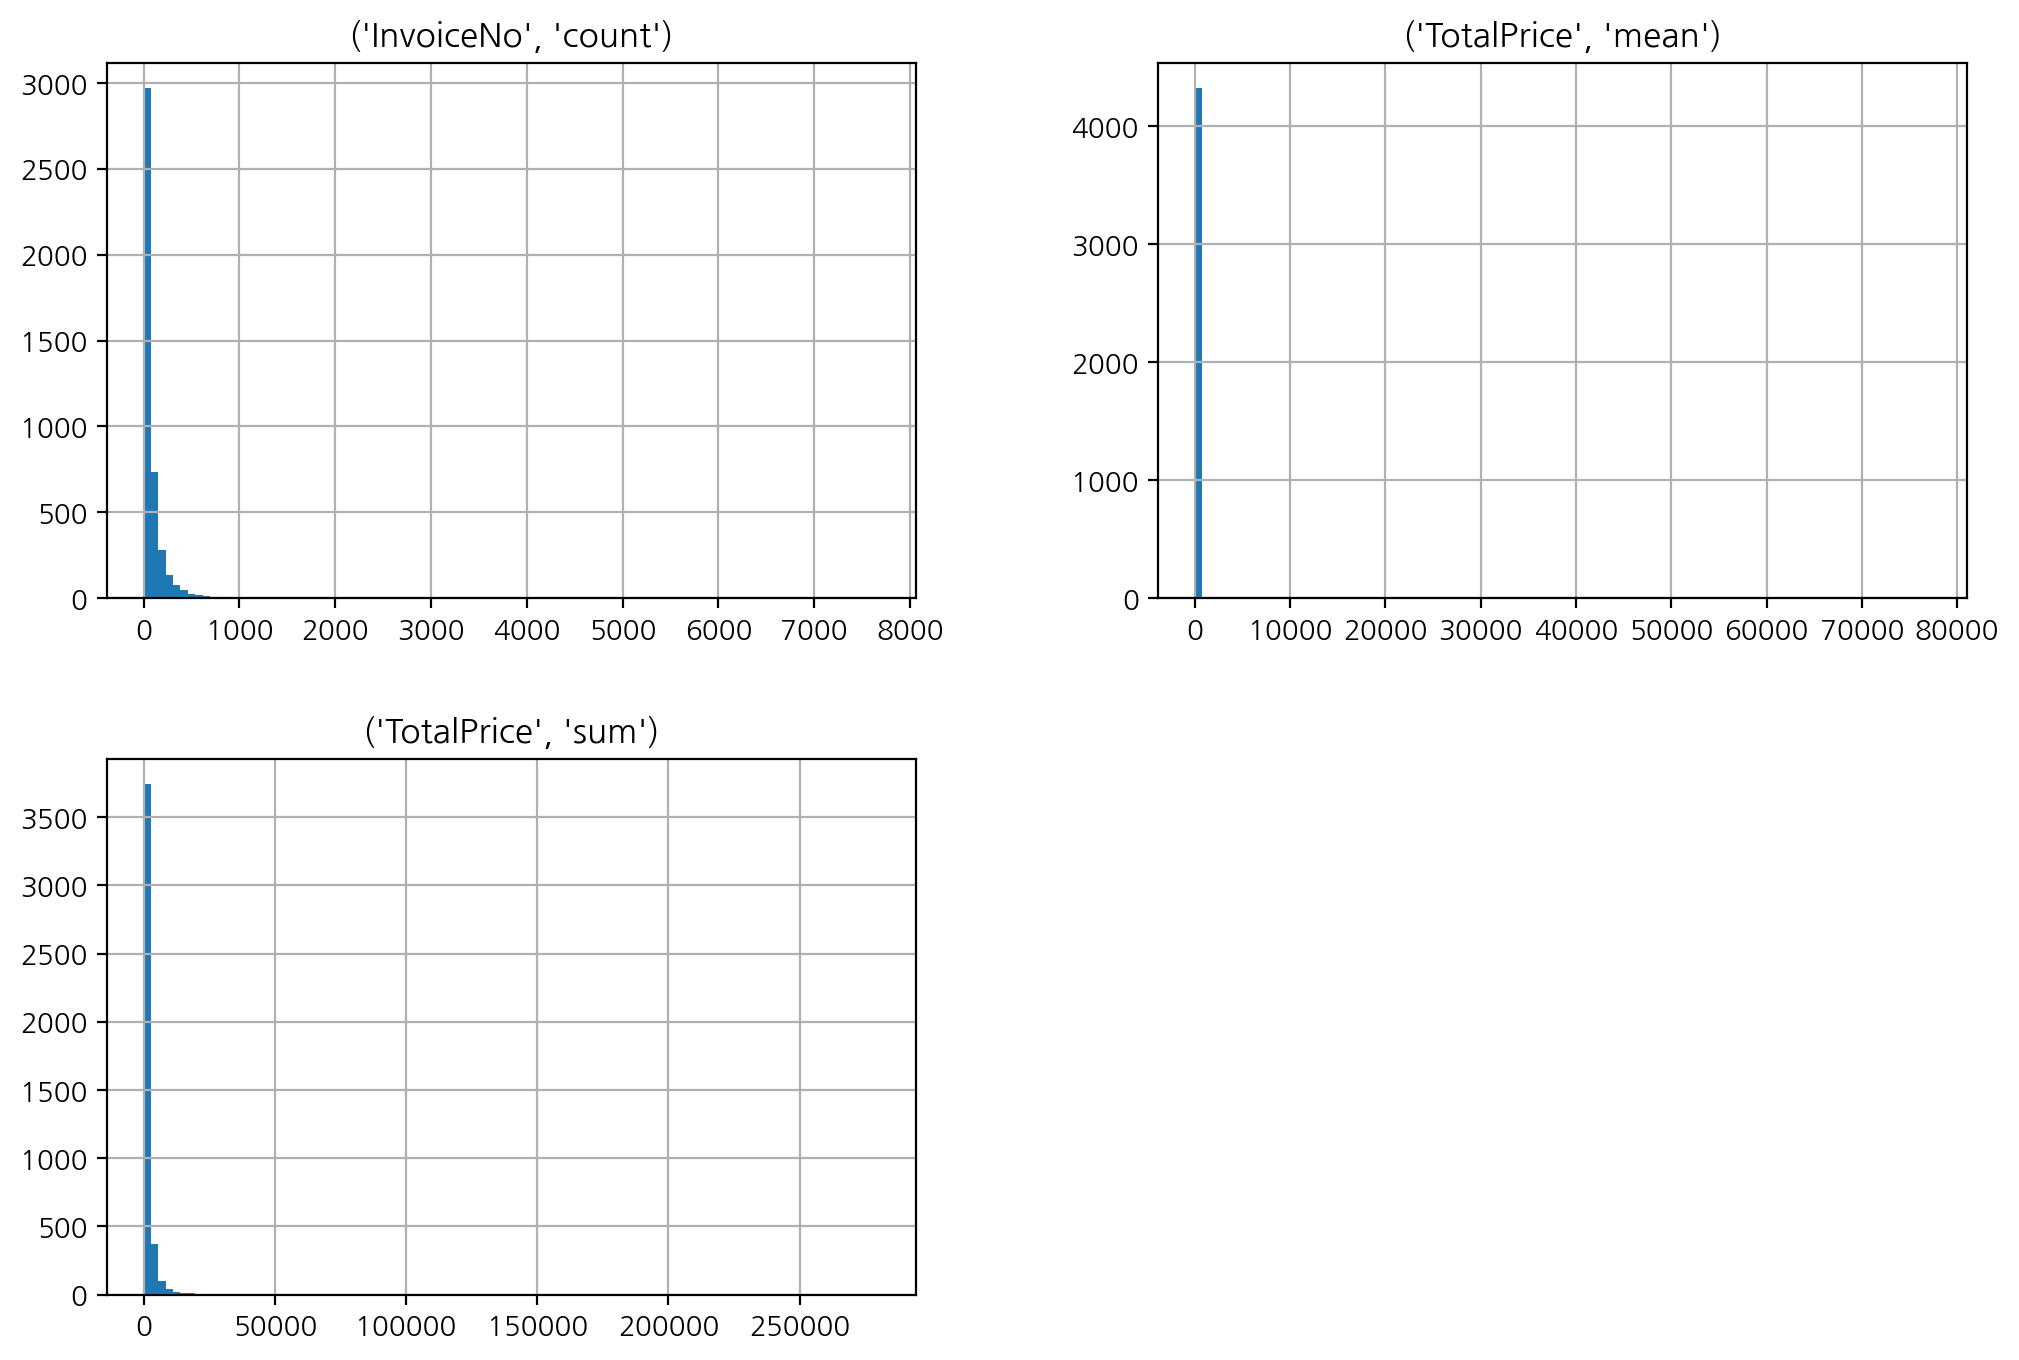

In [85]:
cust_agg.hist(figsize=(12, 8), bins=100);

### MAU

<Axes: title={'center': 'MAU'}, xlabel='InvoiceYM'>

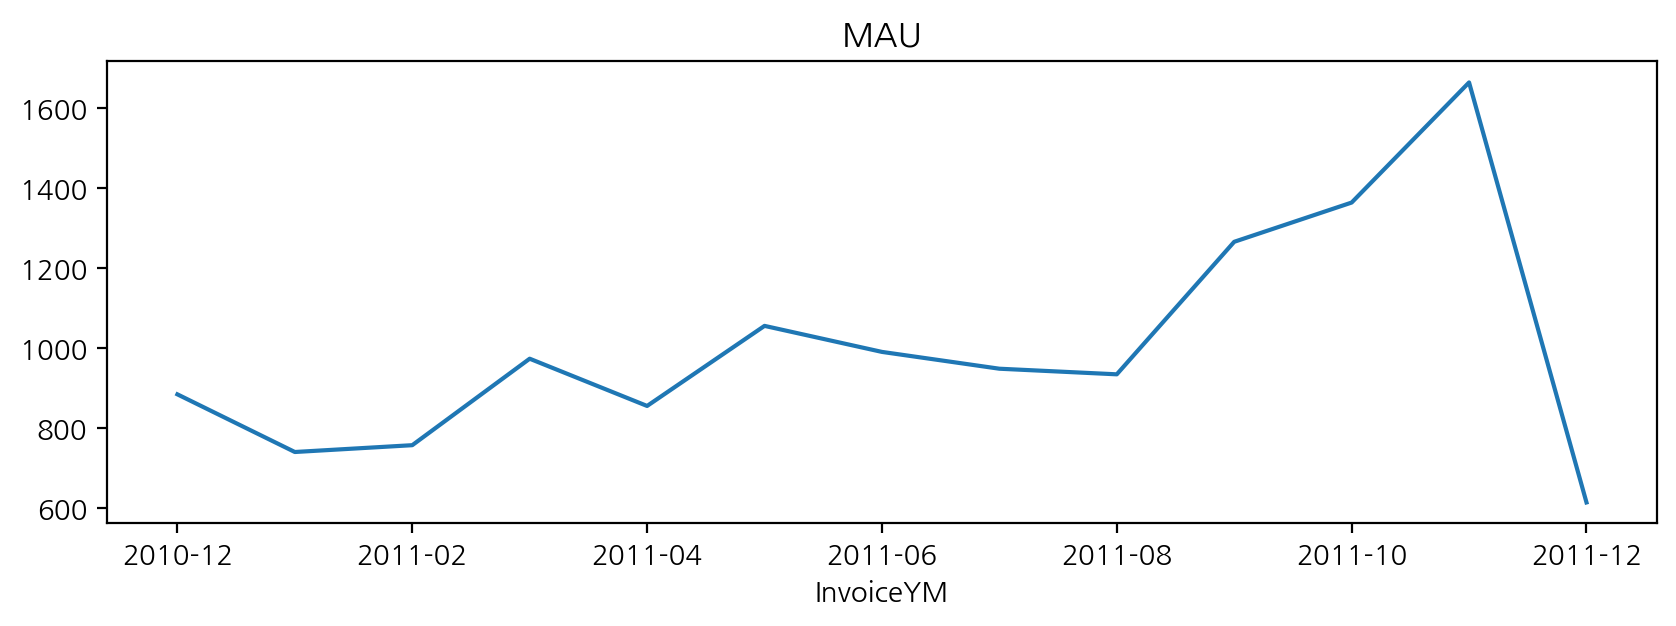

In [86]:
MAU = df_valid.groupby("InvoiceYM")["CustomerID"].nunique()
MAU.plot(figsize=(10, 3), title="MAU")

In [87]:
# 연월별 주문건, 품목 수, 주문회원 수, 품목 가격 평균, 수량 합계 및 평균, 총계 합계 및 평균 확인
# 주문 및 품목 수 모두 증가 추세
# 주문회원 수는 2011-06 ~ 2011-08간 소폭 감소 및 정체하였으나 다시 상승 추세
df_valid.groupby("InvoiceYM").agg({"InvoiceNo": "count", 
                                   "StockCode": "nunique",
                                   "CustomerID": "nunique",
                                   "UnitPrice": "mean",
                                   "Quantity": ["sum", "mean"],
                                   "TotalPrice": ["sum", "mean"]}).style.background_gradient(axis=0).format("{:,.1f}")

### Retention

In [88]:
# 고객별 첫 구매일 파생변수 생성
df_valid["InvoiceDateFirst"] = df_valid.groupby("CustomerID")["InvoiceDate"].transform("min")
df_valid[["CustomerID", "InvoiceDateFirst"]]

CustomerID    InvoiceDateFirst
0         17850.0 2010-12-01 08:26:00
1         17850.0 2010-12-01 08:26:00
2         17850.0 2010-12-01 08:26:00
3         17850.0 2010-12-01 08:26:00
4         17850.0 2010-12-01 08:26:00
...           ...                 ...
541904    12680.0 2011-08-18 15:44:00
541905    12680.0 2011-08-18 15:44:00
541906    12680.0 2011-08-18 15:44:00
541907    12680.0 2011-08-18 15:44:00
541908    12680.0 2011-08-18 15:44:00

[392692 rows x 2 columns]

In [89]:
# year diff
year_diff = df_valid["InvoiceDate"].dt.year - df_valid["InvoiceDateFirst"].dt.year
# month diff
month_diff = df_valid["InvoiceDate"].dt.month - df_valid["InvoiceDateFirst"].dt.month

In [90]:
year_diff.value_counts()

0    251153
1    141539
Name: count, dtype: int64

### Cohort analysis

In [91]:
# 최초 구매 후 월별 잔존 구매 빈도 확인을 위한 cohortIndex 파생변수 생성 
df_valid["CohortIndex"] = (year_diff * 12) + month_diff + 1
df_valid["CohortIndex"].sample(5)

523798     2
403397    11
183303     5
479992     1
91         1
Name: CohortIndex, dtype: int32

In [92]:
df_valid["CohortIndex"].value_counts()

CohortIndex
1     116857
2      27516
4      26993
3      26727
6      26673
5      25165
7      23462
8      23298
12     23011
10     22968
9      22751
11     20098
13      7173
Name: count, dtype: int64

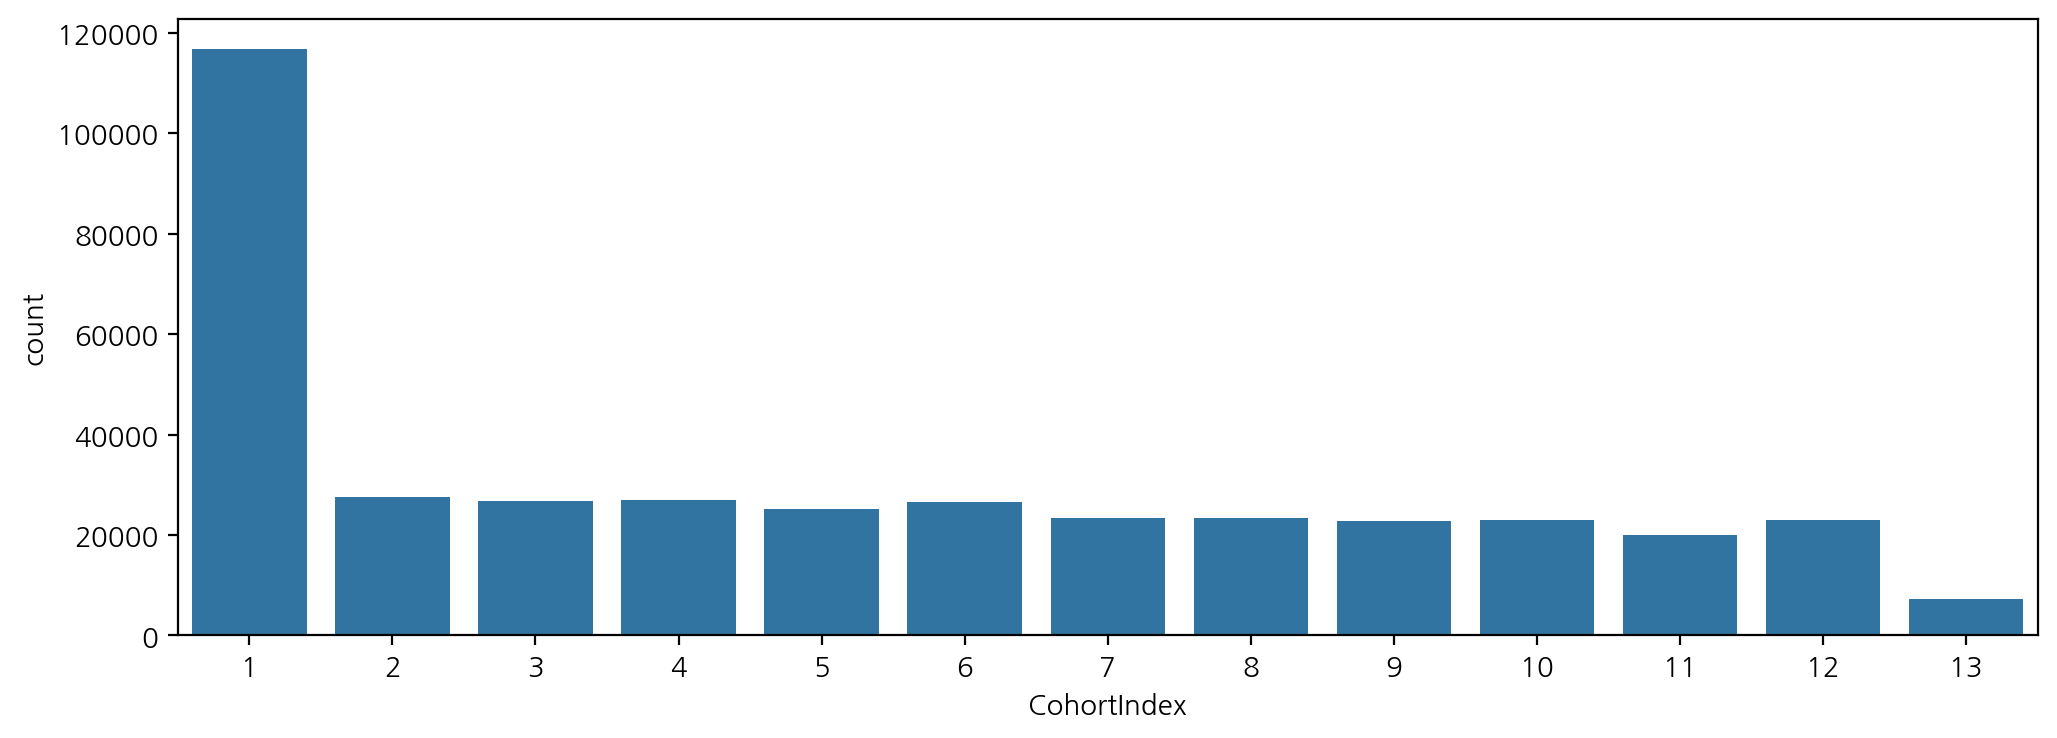

In [93]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df_valid, x="CohortIndex");

In [94]:
# 잔존 빈도 확인을 위해, 최초 주문일 중 Year, Month 파생변수 생성
df_valid["InvoiceDateFirstYM"] = df_valid["InvoiceDateFirst"].astype(str).str[:7]

In [95]:
df_valid.groupby(["InvoiceDateFirstYM", "CohortIndex"])\
    ["CustomerID"].nunique().unstack().\
        style.background_gradient(axis=None).format("{:.0f}")

In [96]:
cohort_count = df_valid.groupby(["InvoiceDateFirstYM", "CohortIndex"])\
    ["CustomerID"].nunique().unstack()

In [97]:
# 월별 신규 유입 고객 수
cohort_count[1]

InvoiceDateFirstYM
2010-12    885.0
2011-01    417.0
2011-02    380.0
2011-03    452.0
2011-04    300.0
2011-05    284.0
2011-06    242.0
2011-07    188.0
2011-08    169.0
2011-09    299.0
2011-10    358.0
2011-11    323.0
2011-12     41.0
Name: 1, dtype: float64

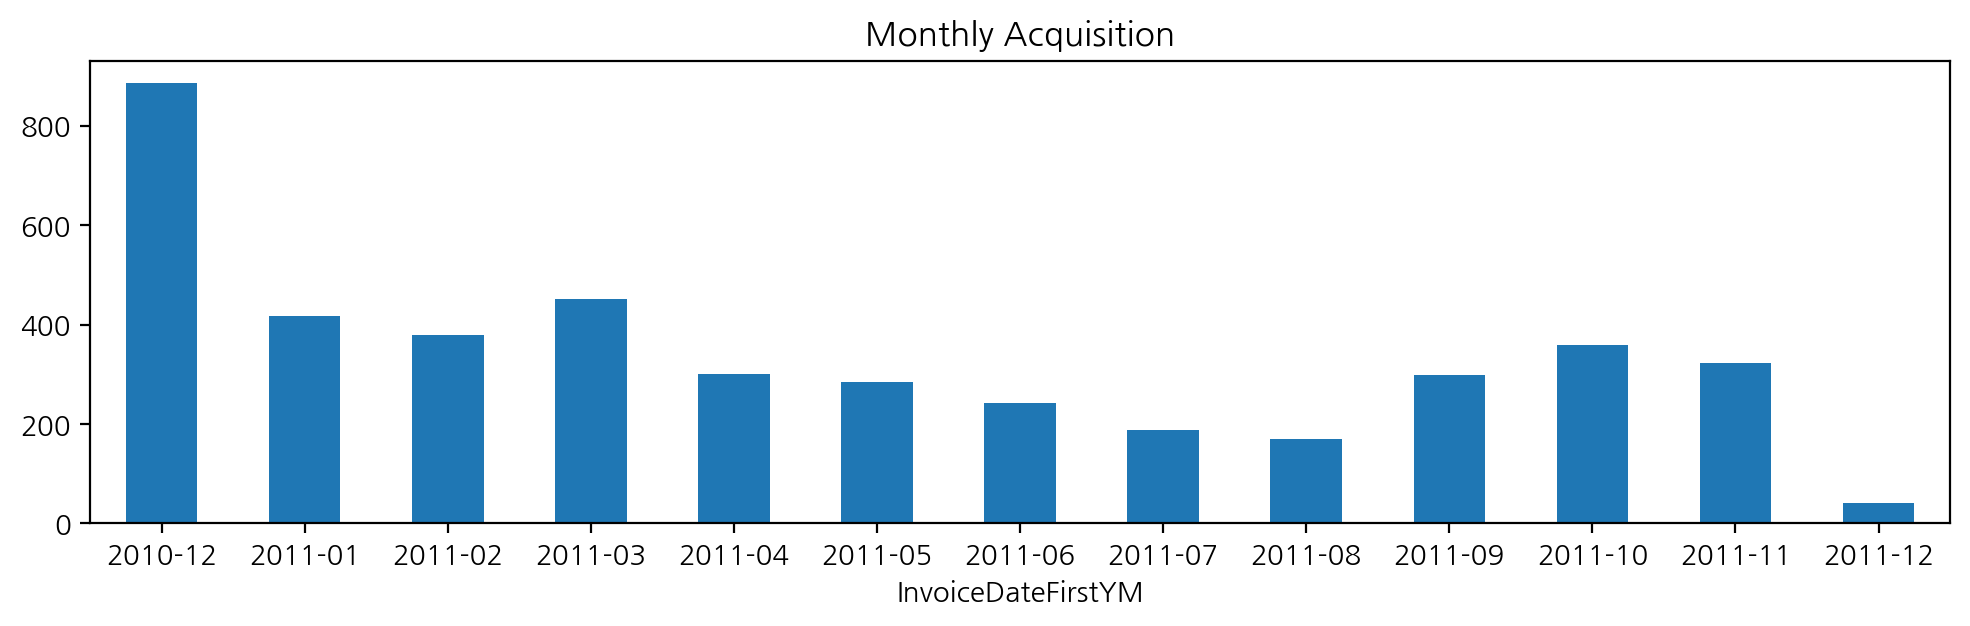

In [98]:
cohort_count[1].plot(kind="bar", figsize=(12, 3), rot=0, title="Monthly Acquisition");

In [99]:
# 잔존 비율 확인
cohort_norm = cohort_count.div(cohort_count[1], axis=0)

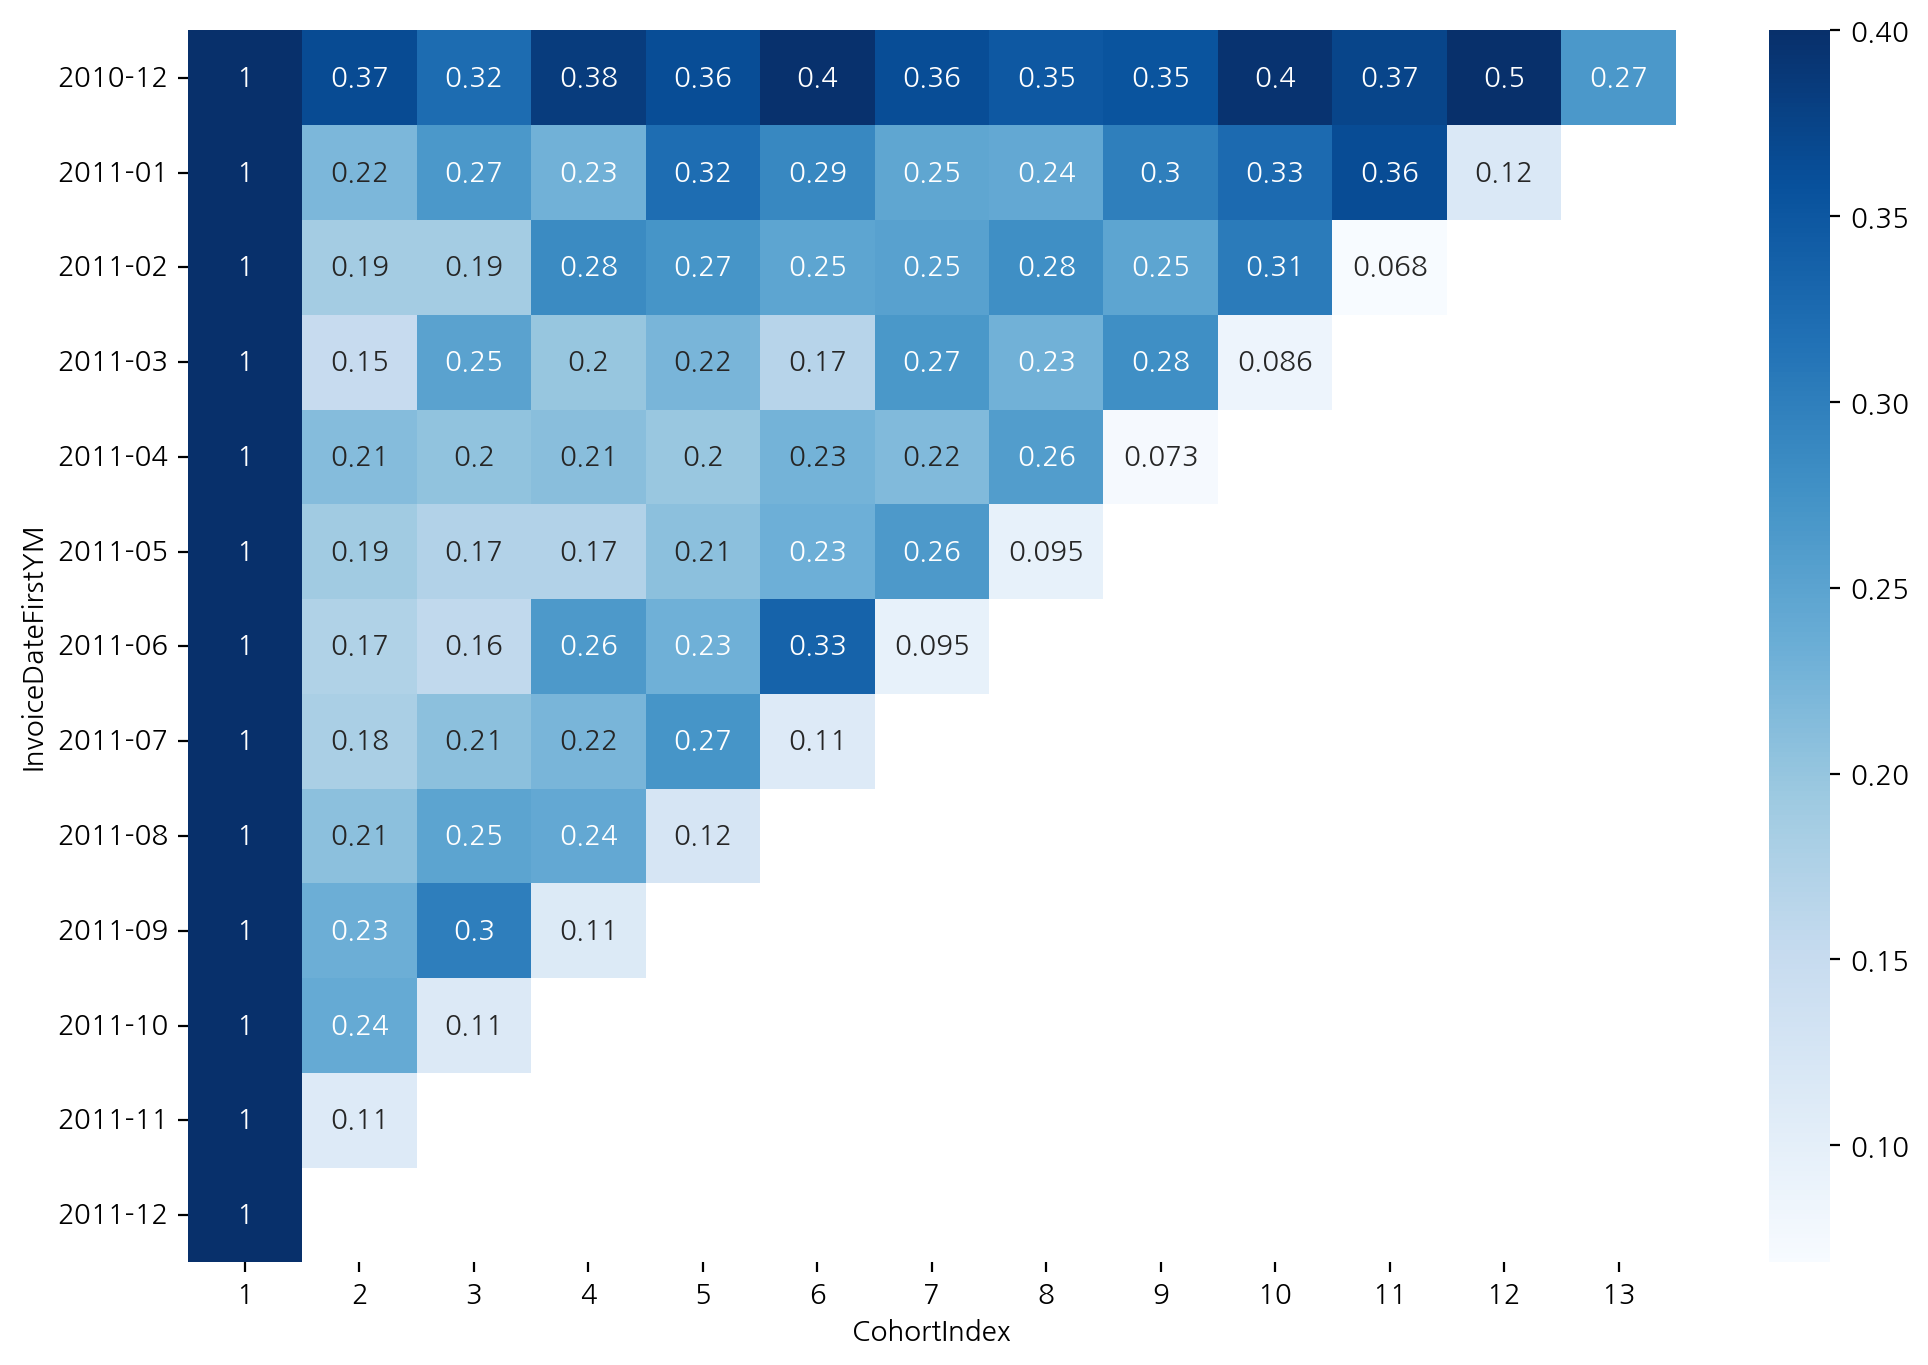

In [100]:
plt.figure(figsize=(12, 8))
sns.heatmap(data=cohort_norm, annot=True, vmax=0.4, cmap="Blues");

In [101]:
cohort_total_price = df_valid.groupby(["InvoiceDateFirstYM", "CohortIndex",])["TotalPrice"].sum().unstack()

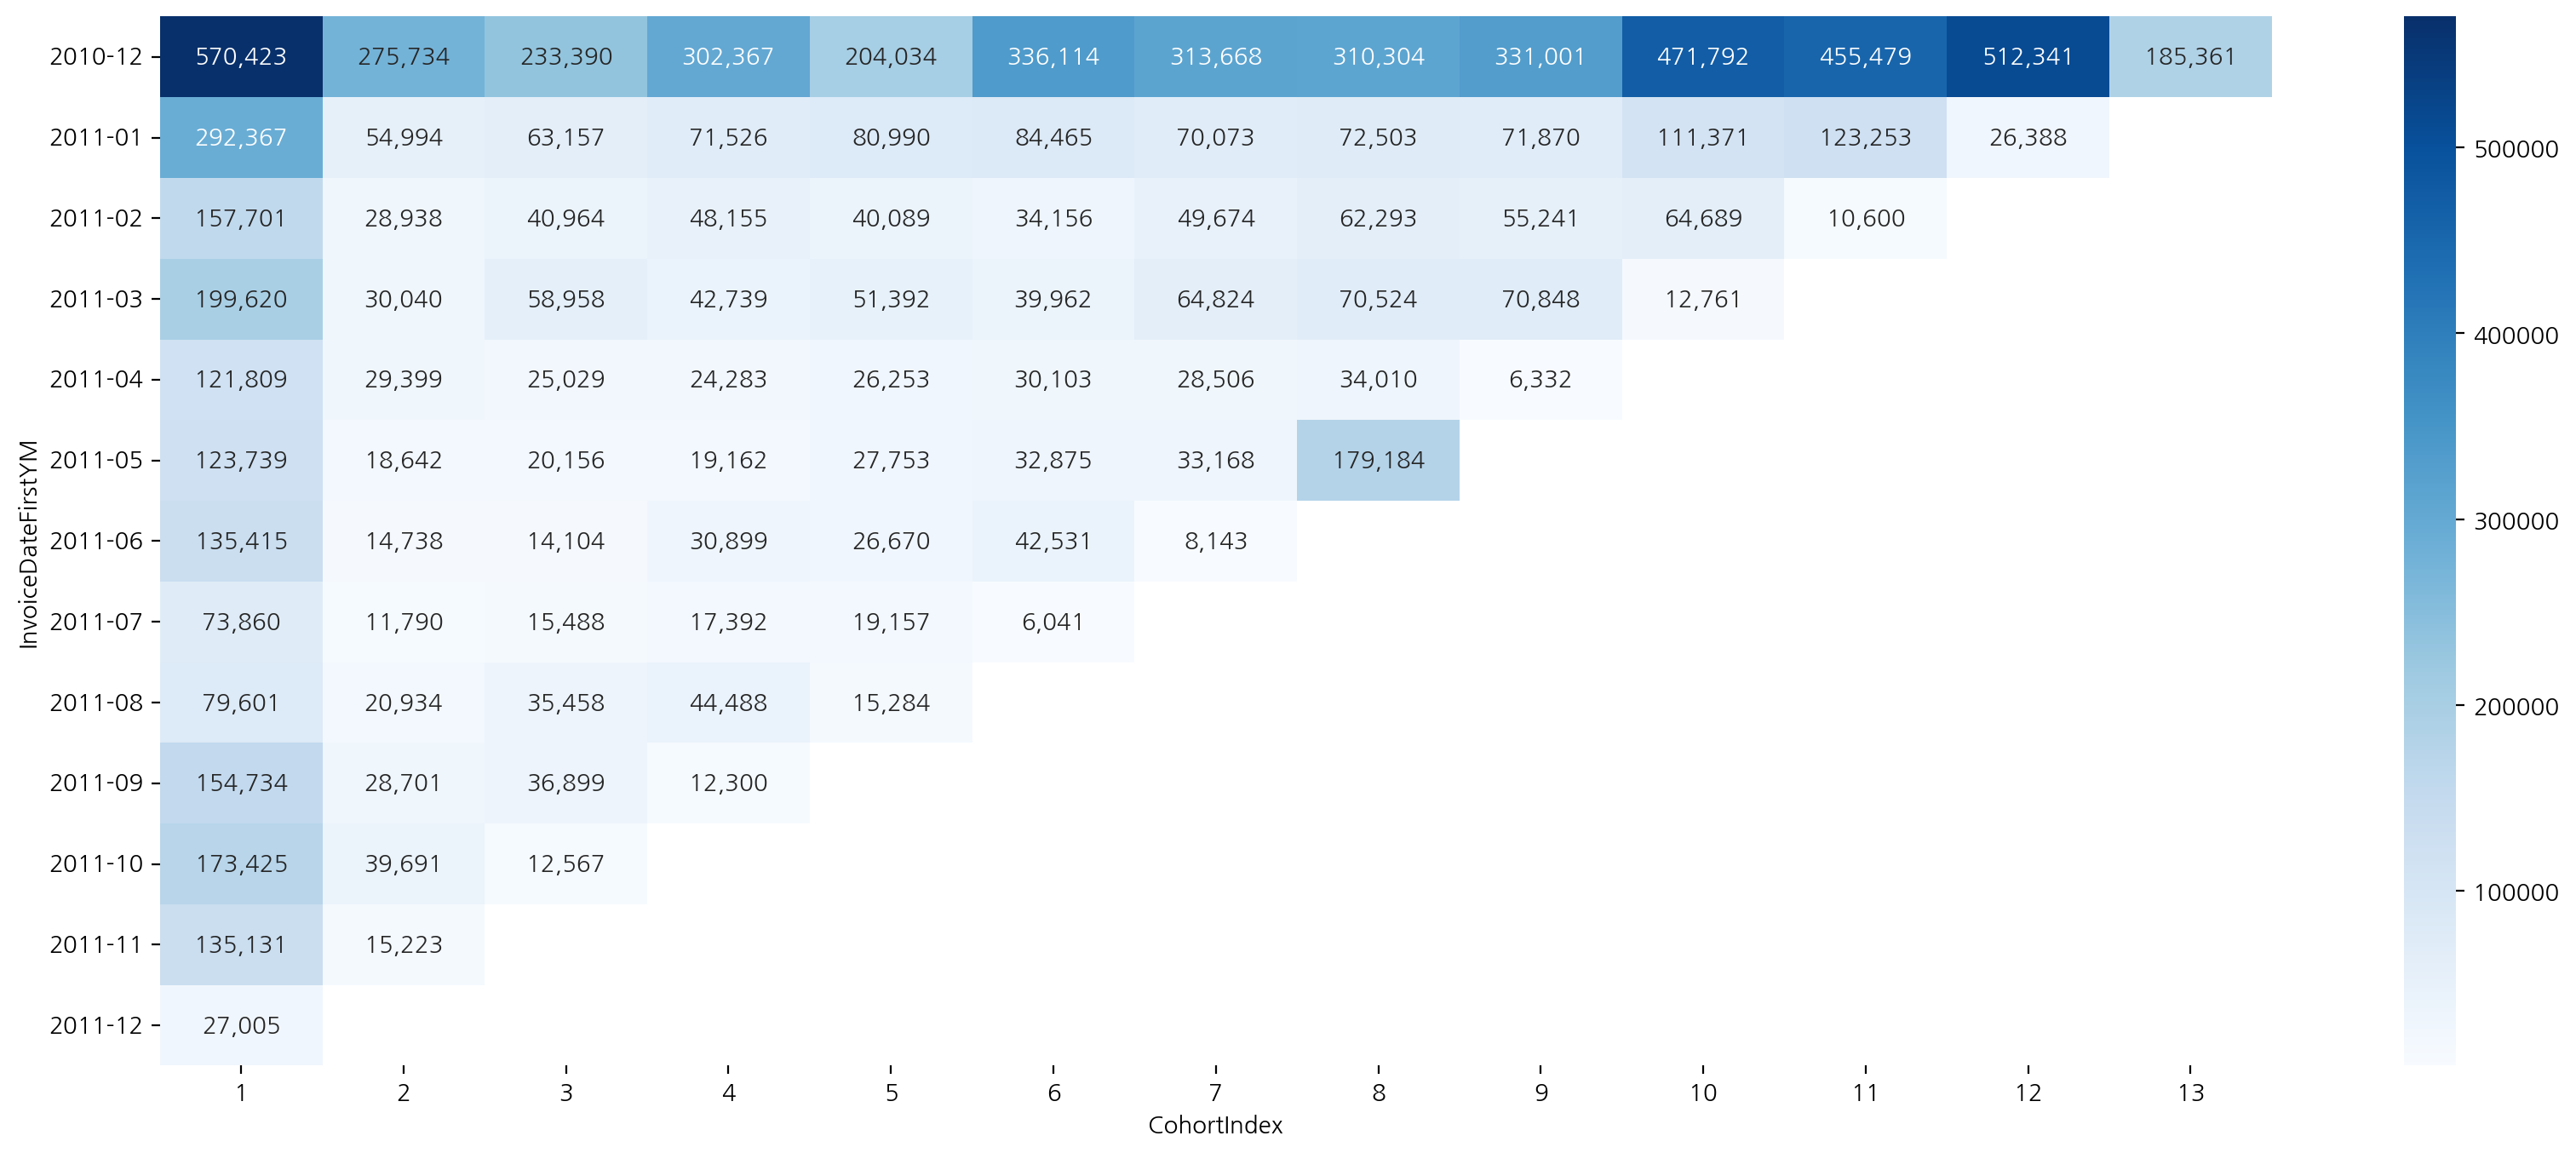

In [102]:
# 잔존 고객별 매출 확인
# 초기 유입 고객의 높은 충성도가 매출 견인
# 
plt.figure(figsize=(20, 8))
sns.heatmap(data=cohort_total_price, annot=True, cmap="Blues", fmt=",.0f");

## RFM
* R(H)/F(H)/M(H)
    * 우수고객으로 차별화된 서비스 제공
    * 본사차원의 고급정보 및 차별화된 오퍼링 제공
* R(L)/F(H)/M(H)
    * 구매 품목 및 제품수명주기 고려
    * BM 전환 유도를 위한 캠페인/이벤트 전략
* R(H)/F(L)/M(H)
    * Assocation rules 분석을 통한 추천 캠페인
* R(H)/F(H)/M(L)
    * 구매금액 상향을 위한 마케팅 활동 고려
    * 고가제품 구매 시 프리미엄 제공

[Source: IT DAILY - 고객가치 평가의 척도 - RFM](http://www.itdaily.kr/news/articleView.html?idxno=8371)

### Preprocessing

In [103]:
df_valid["TotalPrice"].describe()

count    392692.000000
mean         22.631500
std         311.099224
min           0.001000
25%           4.950000
50%          12.450000
75%          19.800000
max      168469.600000
Name: TotalPrice, dtype: float64

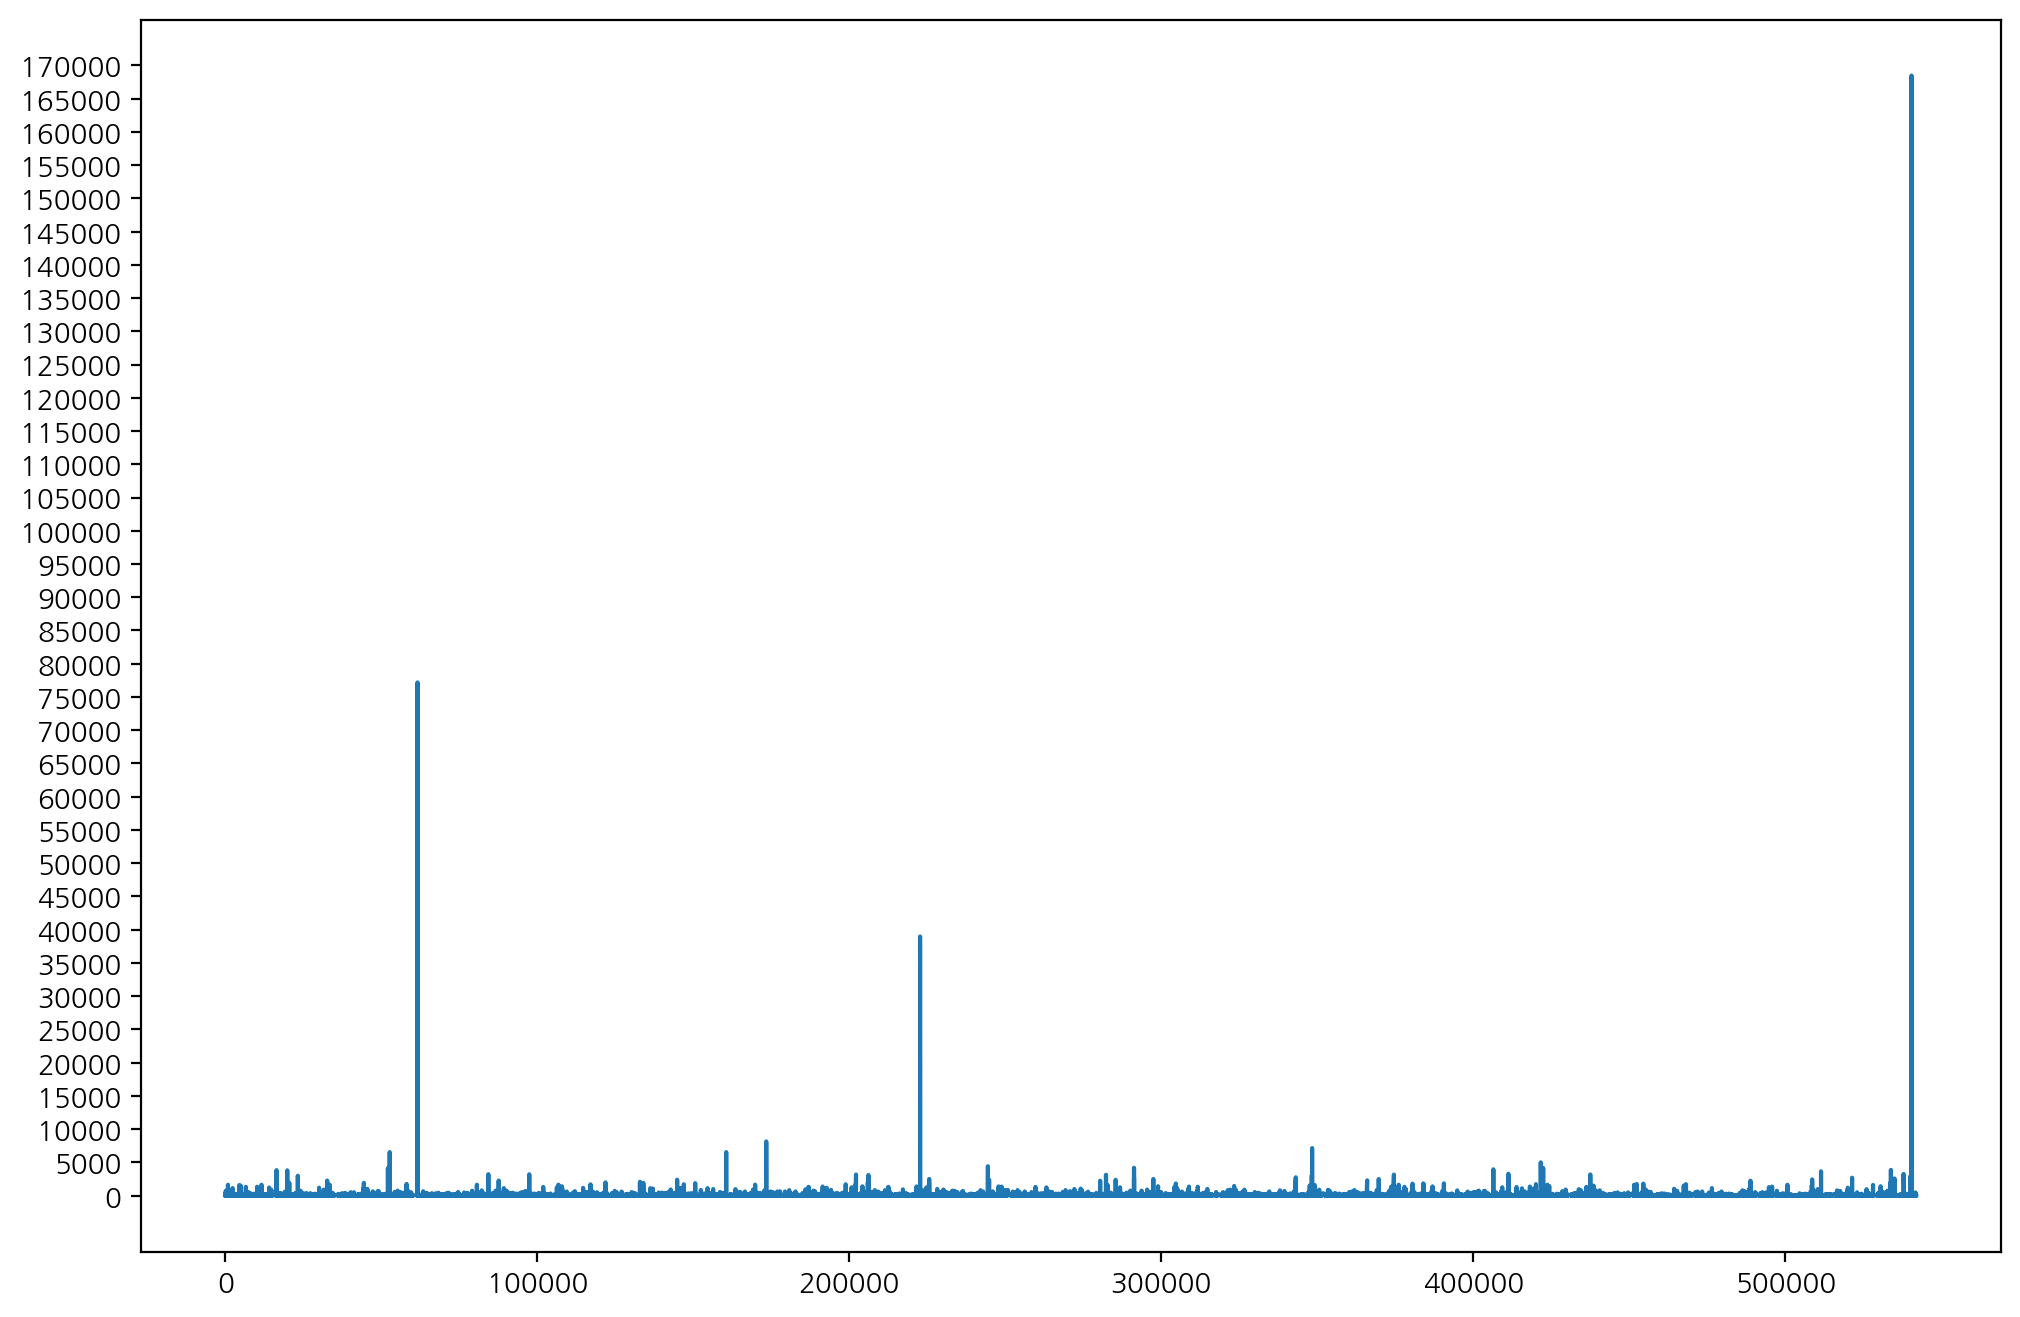

In [104]:
# Monetary 분포 확인
df_valid["TotalPrice"].plot(figsize=(12, 8), yticks=np.arange(0, 175000, 5000));

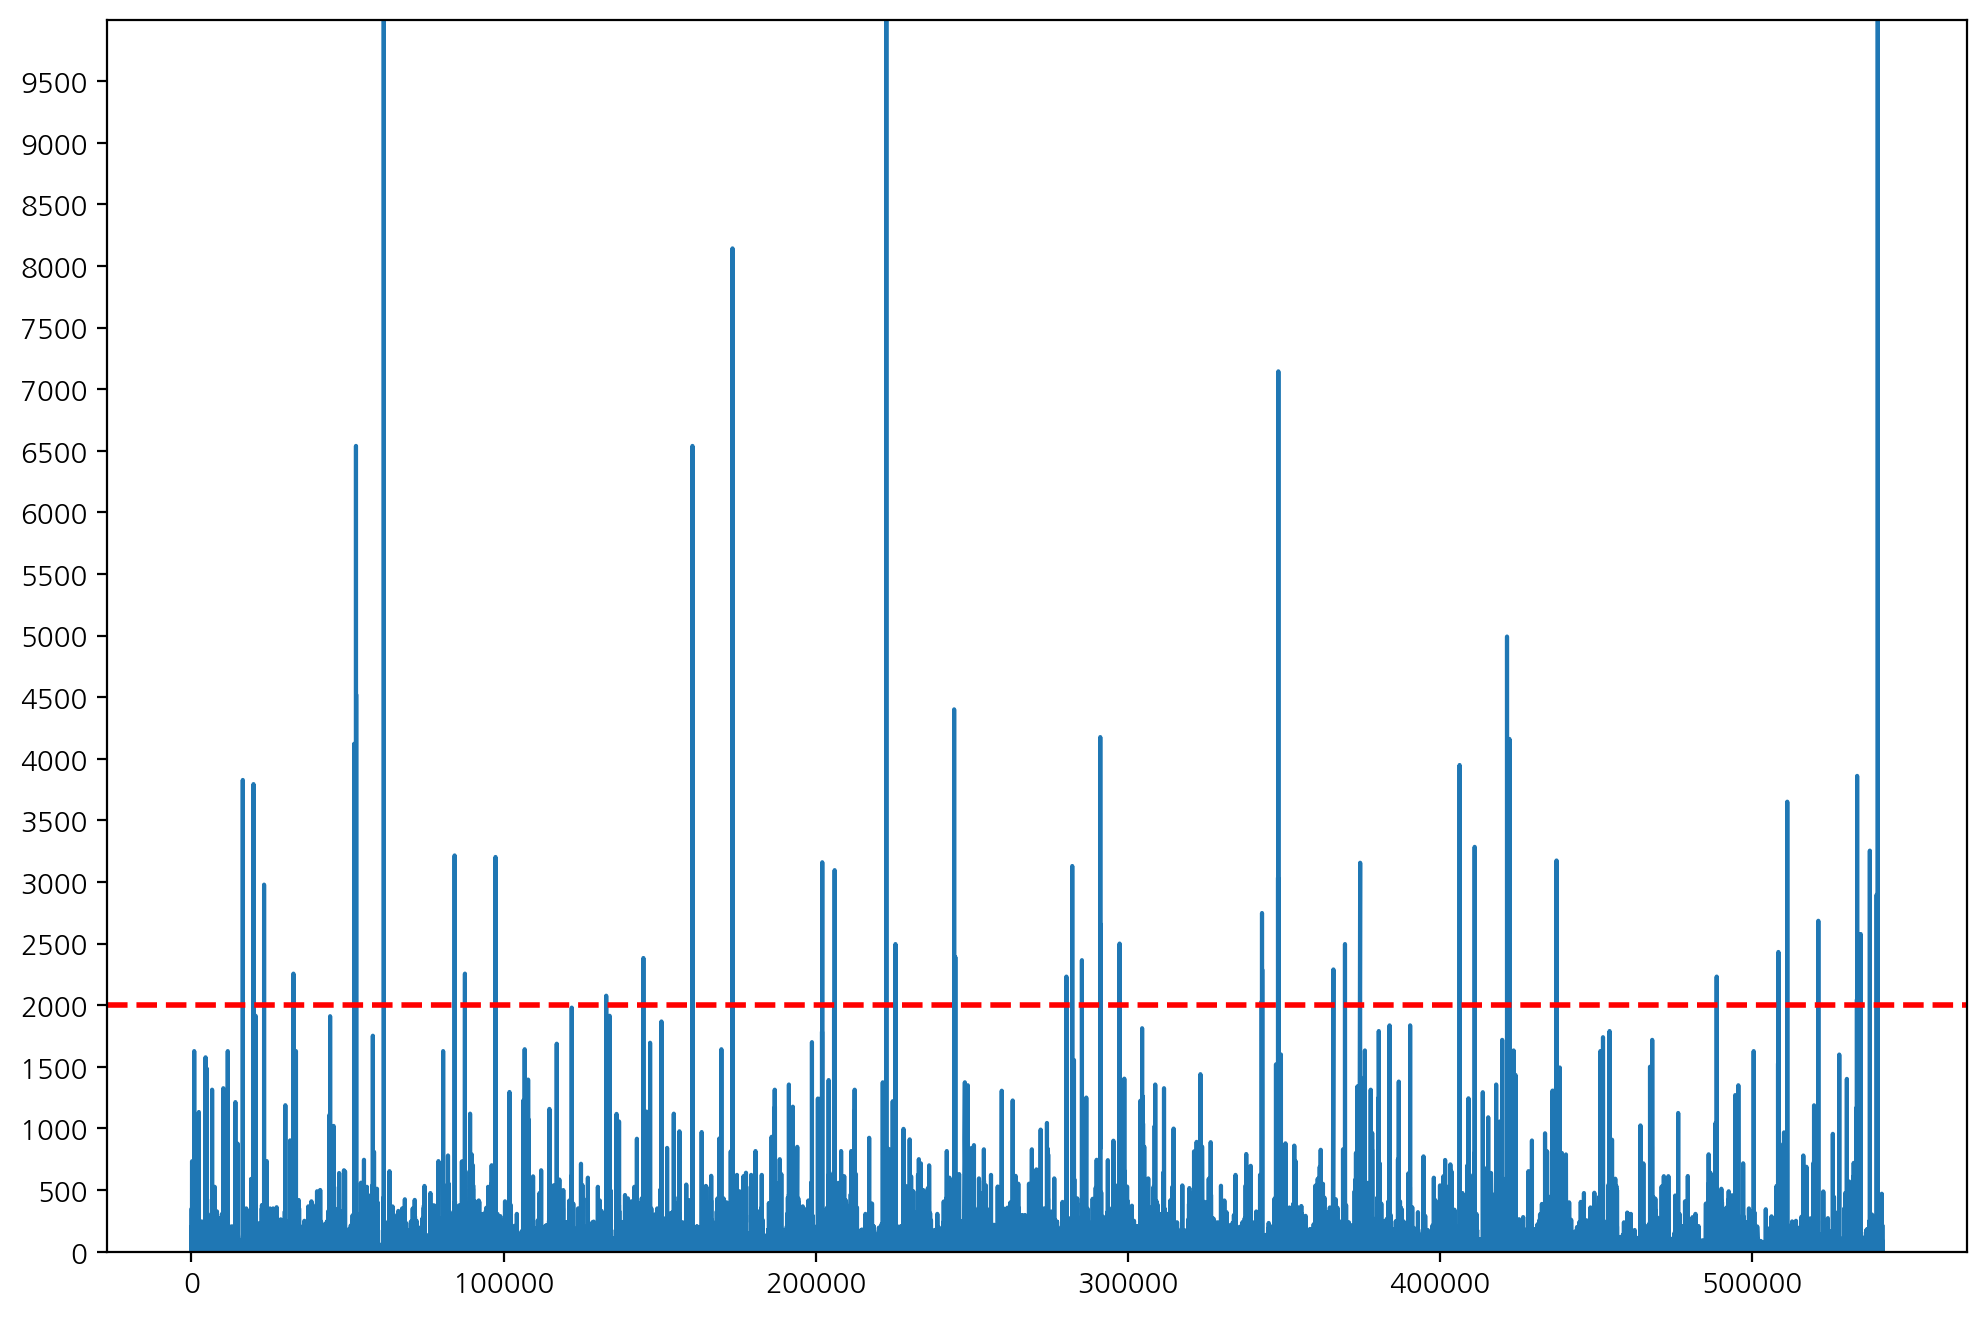

In [105]:
# TotalPrice > 2000인 주문에 대한 추가 확인 진행
plt.figure(figsize=(12, 8))
df_valid["TotalPrice"].plot(yticks=np.arange(0, 10000, 500), ylim=(0, 10000))
plt.axhline(2000, color='red', linestyle='--', linewidth=2)
plt.show()

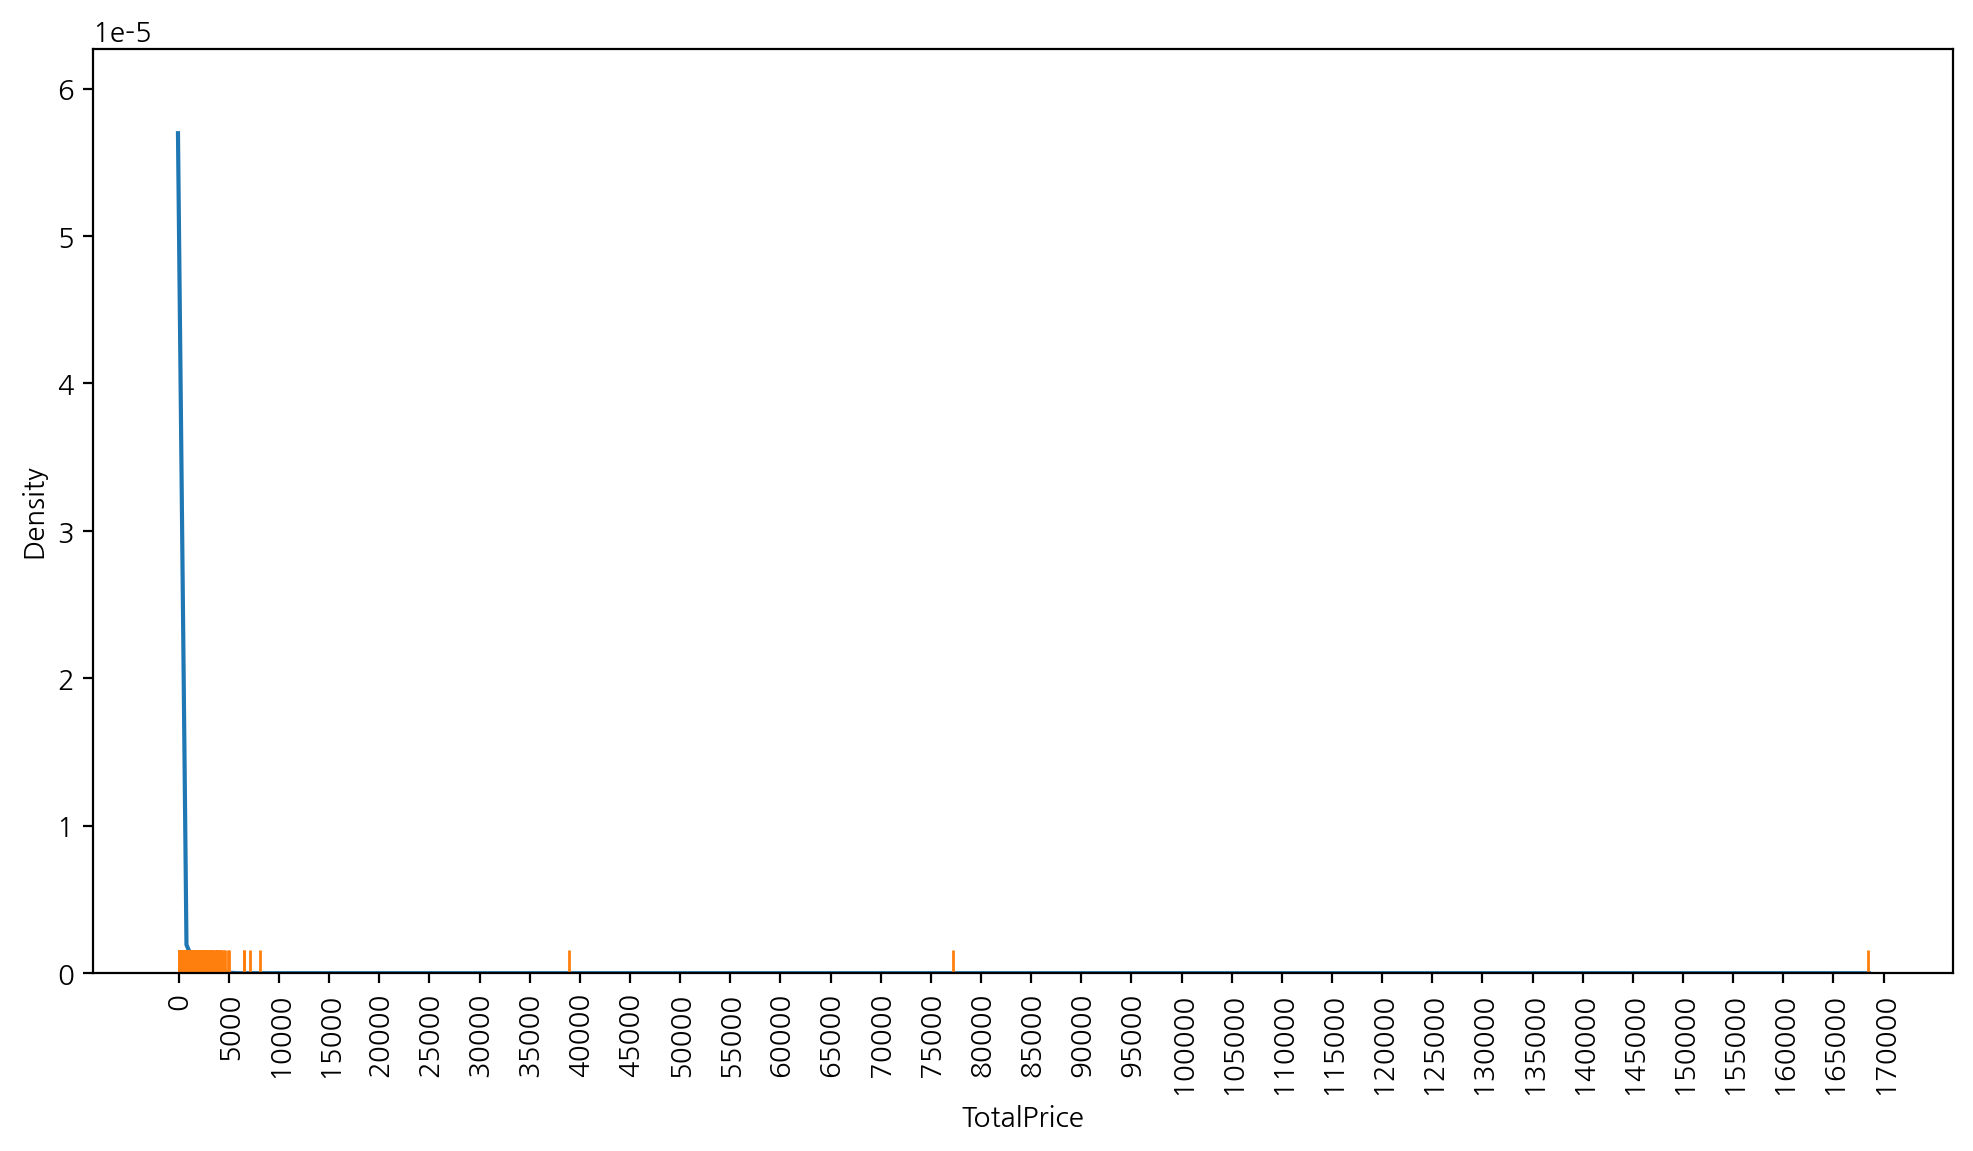

In [106]:
plt.figure(figsize=(12,6))
sns.kdeplot(x=df_valid["TotalPrice"])
sns.rugplot(x=df_valid["TotalPrice"])
plt.xticks(np.arange(0, 175000, 5000), rotation=90);

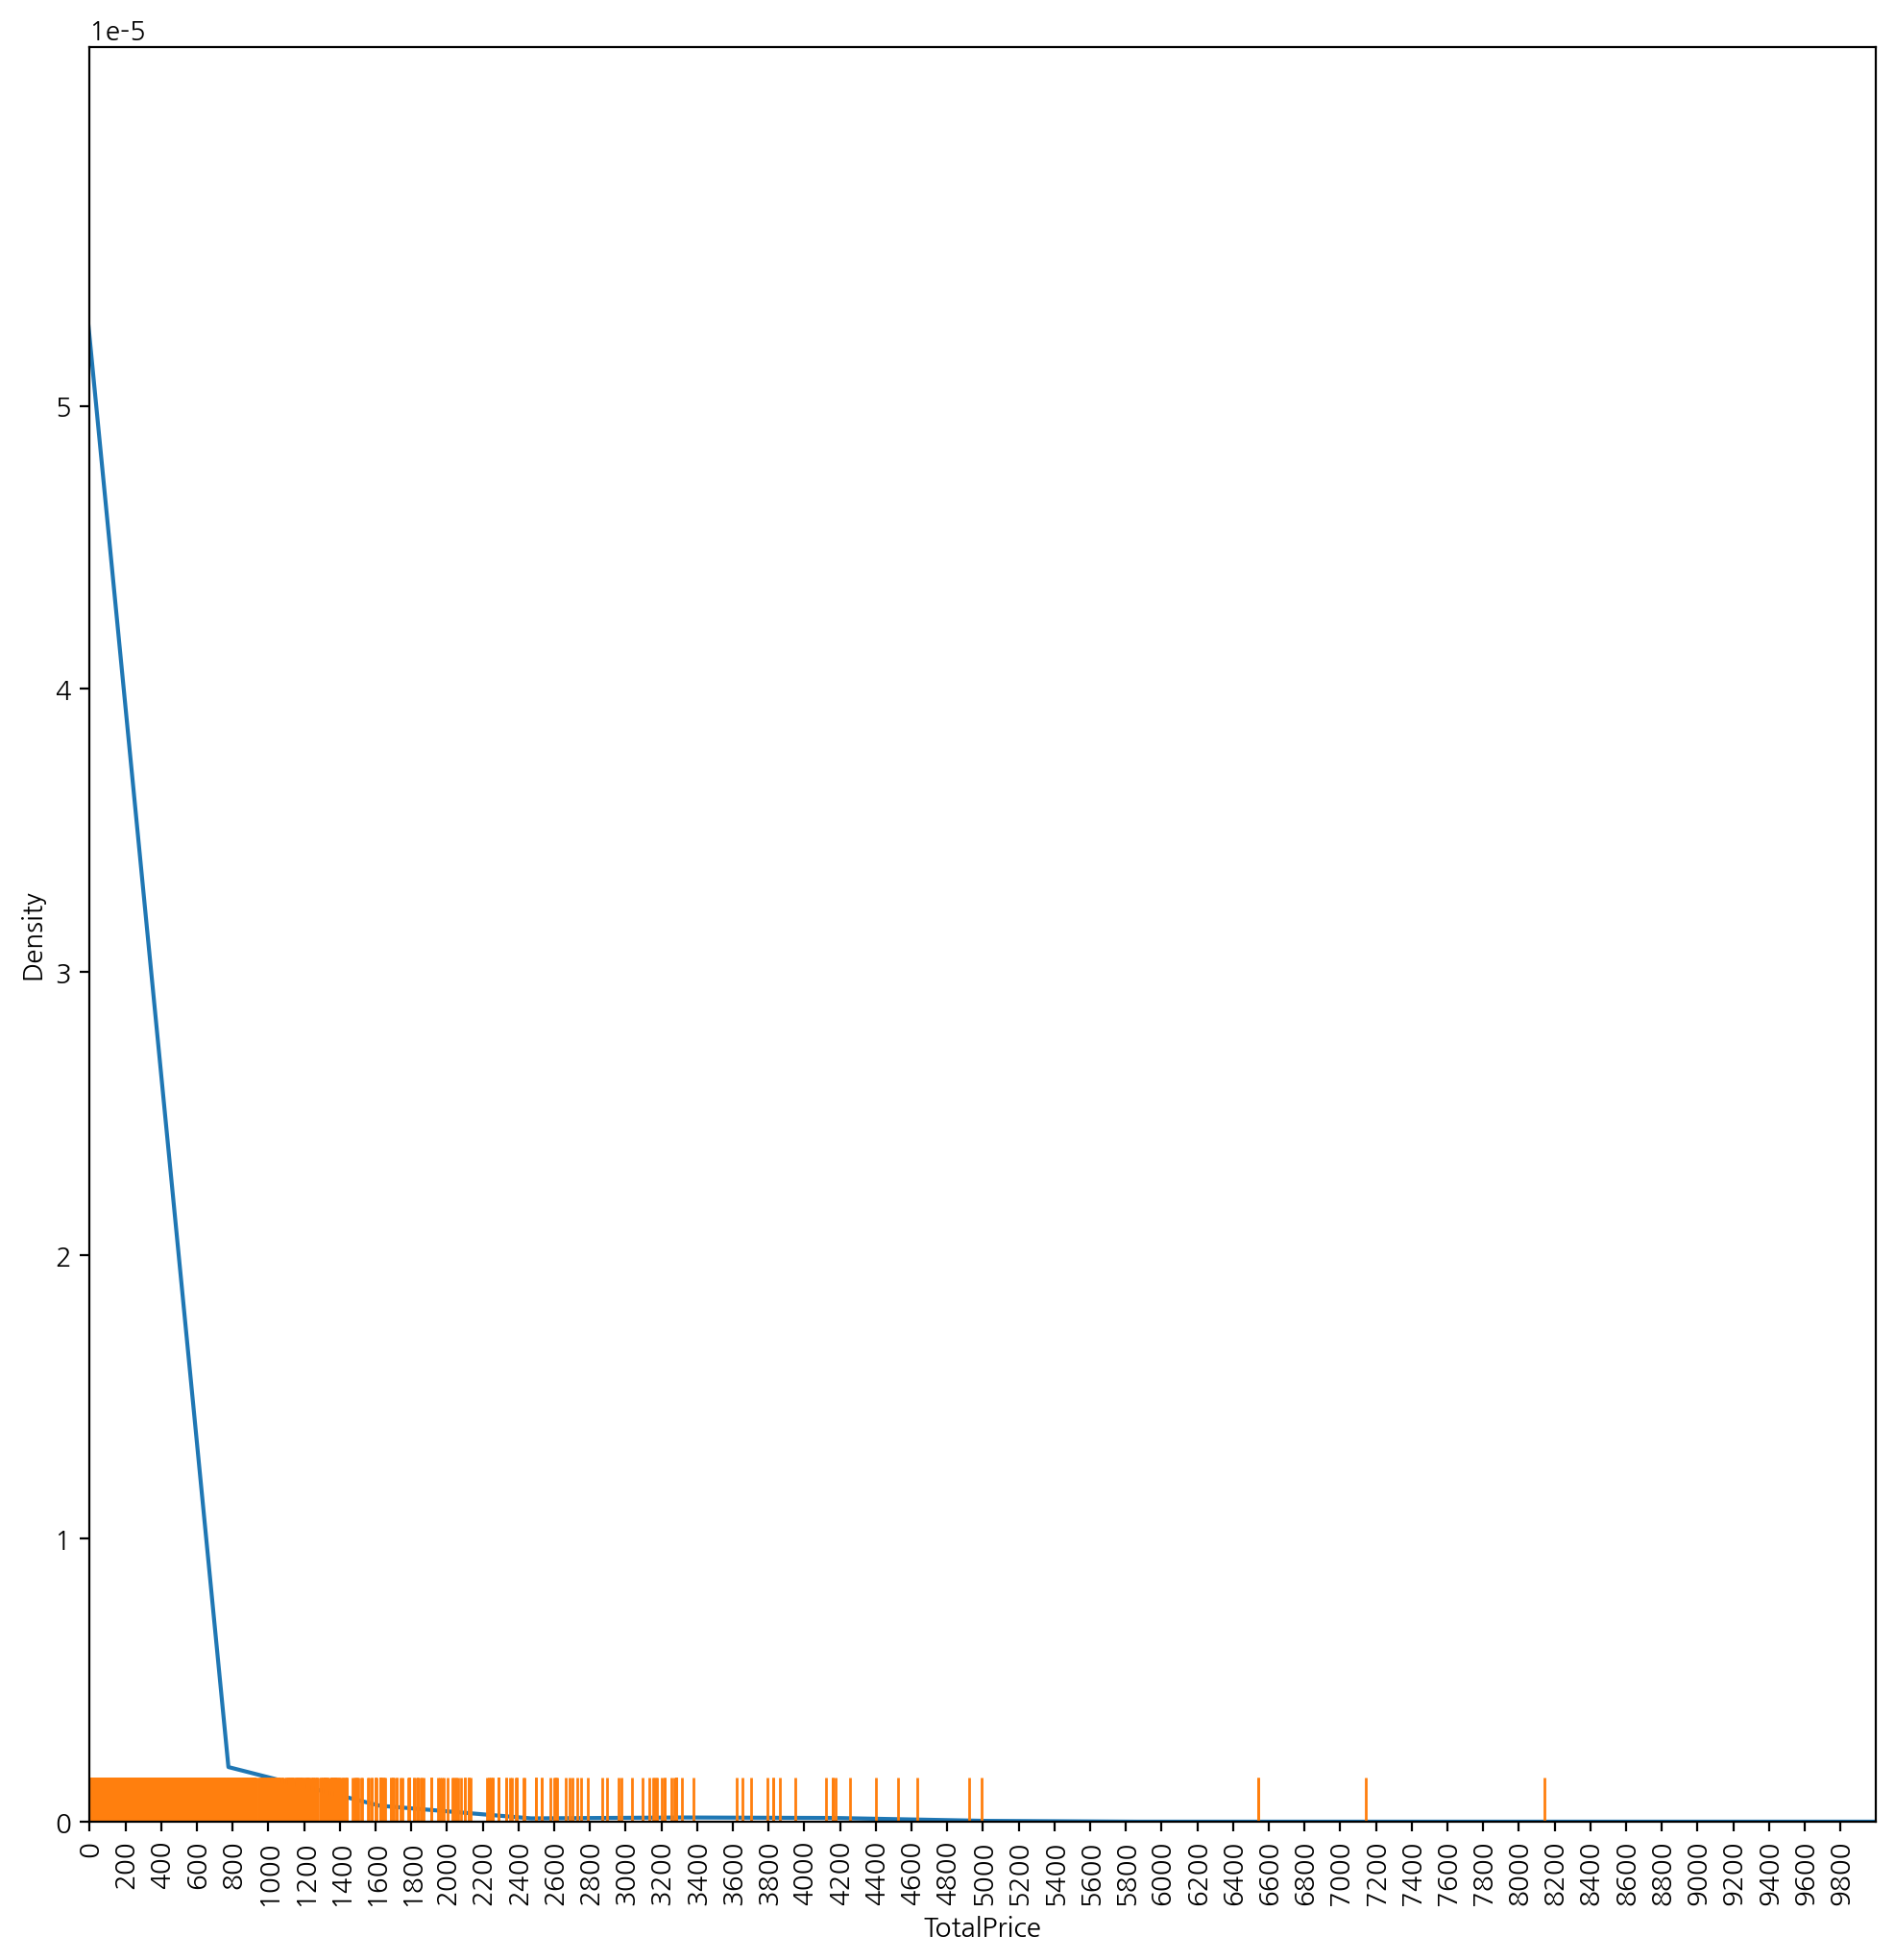

In [107]:
# TotalPrice > 5000부터 급격히 분포 저하
plt.figure(figsize=(12,12))
sns.kdeplot(x=df_valid["TotalPrice"])
sns.rugplot(x=df_valid["TotalPrice"])
plt.xticks(np.arange(0, 10000, 200), rotation=90)
plt.yticks(np.arange(0, 0.00006, 0.00001))
plt.xlim((0, 10000));

In [108]:
# TotalPrice > 2000 이상인 주문 102건
df_valid[df_valid["TotalPrice"] > 2000]

InvoiceNo StockCode                      Description  Quantity  \
16427     537657     22189          CREAM HEART CARD HOLDER       972   
16428     537657     22188          BLACK HEART CARD HOLDER       972   
16429     537657     21623     VINTAGE UNION JACK MEMOBOARD       408   
16435     537659     22189          CREAM HEART CARD HOLDER      1008   
16436     537659     22188          BLACK HEART CARD HOLDER      1008   
...          ...       ...                              ...       ...   
533812    581115     22413  METAL SIGN TAKE IT OR LEAVE IT       1404   
534952    581175     23084               RABBIT NIGHT LIGHT      1440   
537883    581375     21137         BLACK RECORD COVER FRAME       960   
540061    581457     23543              WALL ART KEEP CALM        698   
540421    581483     23843      PAPER CRAFT , LITTLE BIRDIE     80995   

               InvoiceDate  UnitPrice CustomerID         Country  \
16427  2010-12-07 16:42:00       2.31    18102.0  United Kingdom   
16428  2010-12-07 16:42:00       2.31    18102.0  United Kingdom   
16429  2010-12-07 16:42:00       6.38    18102.0  United Kingdom   
16435  2010-12-07 16:43:00       2.31    18102.0  United Kingdom   
16436  2010-12-07 16:43:00       2.31    18102.0  United Kingdom   
...                    ...        ...        ...             ...   
533812 2011-12-07 12:20:00       2.75    15195.0  United Kingdom   
534952 2011-12-07 15:16:00       1.79    14646.0     Netherlands   
537883 2011-12-08 12:36:00       3.39    16210.0  United Kingdom   
540061 2011-12-08 18:43:00       4.15    18102.0  United Kingdom   
540421 2011-12-09 09:15:00       2.08    16446.0  United Kingdom   

        isRegistered  TotalPrice  ... InvoiceMonth  InvoiceDay  InvoiceDow  \
16427           True     2245.32  ...           12           7           1   
16428           True     2245.32  ...           12           7           1   
16429           True     2603.04  ...           12           7           1   
16435           True     2328.48  ...           12           7           1   
16436           True     2328.48  ...           12           7           1   
...              ...         ...  ...          ...         ...         ...   
533812          True     3861.00  ...           12           7           2   
534952          True     2577.60  ...           12           7           2   
537883          True     3254.40  ...           12           8           3   
540061          True     2896.70  ...           12           8           3   
540421          True   168469.60  ...           12           9           4   

        InvoiceYM  InvoiceTime  InvoiceHour InvoiceDayName  \
16427     2010-12     16:42:00           16              화   
16428     2010-12     16:42:00           16              화   
16429     2010-12     16:42:00           16              화   
16435     2010-12     16:43:00           16              화   
16436     2010-12     16:43:00           16              화   
...           ...          ...          ...            ...   
533812    2011-12     12:20:00           12              수   
534952    2011-12     15:16:00           15              수   
537883    2011-12     12:36:00           12              목   
540061    2011-12     18:43:00           18              목   
540421    2011-12     09:15:00            9              금   

          InvoiceDateFirst  CohortIndex InvoiceDateFirstYM  
16427  2010-12-07 16:42:00            1            2010-12  
16428  2010-12-07 16:42:00            1            2010-12  
16429  2010-12-07 16:42:00            1            2010-12  
16435  2010-12-07 16:42:00            1            2010-12  
16436  2010-12-07 16:42:00            1            2010-12  
...                    ...          ...                ...  
533812 2011-12-07 12:20:00            1            2011-12  
534952 2010-12-20 10:09:00           13            2010-12  
537883 2010-12-01 12:27:00           13            2010-12  
540061 2010-12-07 16:

In [109]:
# TotalPrice > 2000으로 주문한 CustomerID별 TotalPrice, Quantity 확인
outlier_check = df_valid.loc[df_valid["CustomerID"]\
             .isin(df_valid[df_valid["TotalPrice"] > 2000]["CustomerID"].unique())]\
                .groupby("CustomerID")\
                    .agg({"TotalPrice":["sum", "count", "std", "mean", "max"],
                          "Quantity":["sum", "count", "std", "mean", "max"]})\
                        .sort_values(by=[('TotalPrice', 'count'), 
                                         ('TotalPrice', 'max')], ascending=False)
outlier_check.style.background_gradient(axis=0).format("{:,.0f}")

In [110]:
df_valid[df_valid["CustomerID"] == 16446]

InvoiceNo StockCode                  Description  Quantity  \
194354    553573     22980       PANTRY SCRUBBING BRUSH         1   
194355    553573     22982          PANTRY PASTRY BRUSH         1   
540421    581483     23843  PAPER CRAFT , LITTLE BIRDIE     80995   

               InvoiceDate  UnitPrice CustomerID         Country  \
194354 2011-05-18 09:52:00       1.65    16446.0  United Kingdom   
194355 2011-05-18 09:52:00       1.25    16446.0  United Kingdom   
540421 2011-12-09 09:15:00       2.08    16446.0  United Kingdom   

        isRegistered  TotalPrice  ... InvoiceMonth  InvoiceDay  InvoiceDow  \
194354          True        1.65  ...            5          18           2   
194355          True        1.25  ...            5          18           2   
540421          True   168469.60  ...           12           9           4   

        InvoiceYM  InvoiceTime  InvoiceHour InvoiceDayName  \
194354    2011-05     09:52:00            9              수   
194355    2011-05     09:52:00            9              수   
540421    2011-12     09:15:00            9              금   

          InvoiceDateFirst  CohortIndex InvoiceDateFirstYM  
194354 2011-05-18 09:52:00            1            2011-05  
194355 2011-05-18 09:52:00            1            2011-05  
540421 2011-05-18 09:52:00            8            2011-05  

[3 rows x 23 columns]

In [111]:
df_valid[df_valid["CustomerID"] == 13135]

InvoiceNo StockCode           Description  Quantity  \
206121    554868     22197  SMALL POPCORN HOLDER      4300   

               InvoiceDate  UnitPrice CustomerID         Country  \
206121 2011-05-27 10:52:00       0.72    13135.0  United Kingdom   

        isRegistered  TotalPrice  ... InvoiceMonth  InvoiceDay  InvoiceDow  \
206121          True      3096.0  ...            5          27           4   

        InvoiceYM  InvoiceTime  InvoiceHour InvoiceDayName  \
206121    2011-05     10:52:00           10              금   

          InvoiceDateFirst  CohortIndex InvoiceDateFirstYM  
206121 2011-05-27 10:52:00            1            2011-05  

[1 rows x 23 columns]

In [112]:
df_valid[df_valid["CustomerID"] == 15195]

InvoiceNo StockCode                      Description  Quantity  \
533812    581115     22413  METAL SIGN TAKE IT OR LEAVE IT       1404   

               InvoiceDate  UnitPrice CustomerID         Country  \
533812 2011-12-07 12:20:00       2.75    15195.0  United Kingdom   

        isRegistered  TotalPrice  ... InvoiceMonth  InvoiceDay  InvoiceDow  \
533812          True      3861.0  ...           12           7           2   

        InvoiceYM  InvoiceTime  InvoiceHour InvoiceDayName  \
533812    2011-12     12:20:00           12              수   

          InvoiceDateFirst  CohortIndex InvoiceDateFirstYM  
533812 2011-12-07 12:20:00            1            2011-12  

[1 rows x 23 columns]

In [113]:
df_valid[df_valid["CustomerID"] == 18087]

InvoiceNo StockCode            Description  Quantity  \
97432     544612     22053  EMPIRE DESIGN ROSETTE      3906   
323876    565377         M                 Manual         1   

               InvoiceDate  UnitPrice CustomerID         Country  \
97432  2011-02-22 10:43:00       0.82    18087.0  United Kingdom   
323876 2011-09-02 15:12:00     852.80    18087.0  United Kingdom   

        isRegistered  TotalPrice  ... InvoiceMonth  InvoiceDay  InvoiceDow  \
97432           True     3202.92  ...            2          22           1   
323876          True      852.80  ...            9           2           4   

        InvoiceYM  InvoiceTime  InvoiceHour InvoiceDayName  \
97432     2011-02     10:43:00           10              화   
323876    2011-09     15:12:00           15              금   

          InvoiceDateFirst  CohortIndex InvoiceDateFirstYM  
97432  2011-02-22 10:43:00            1            2011-02  
323876 2011-02-22 10:43:00            8            2011-02  

[2 rows x 23 columns]

In [114]:
df_valid[df_valid["CustomerID"] == 15098]

InvoiceNo StockCode                     Description  Quantity  \
222670    556442     22502      PICNIC BASKET WICKER SMALL        60   
222680    556444     22502  PICNIC BASKET WICKER 60 PIECES        60   
222682    556446     22502  PICNIC BASKET WICKER 60 PIECES         1   

               InvoiceDate  UnitPrice CustomerID         Country  \
222670 2011-06-10 15:22:00       4.95    15098.0  United Kingdom   
222680 2011-06-10 15:28:00     649.50    15098.0  United Kingdom   
222682 2011-06-10 15:33:00     649.50    15098.0  United Kingdom   

        isRegistered  TotalPrice  ... InvoiceMonth  InvoiceDay  InvoiceDow  \
222670          True       297.0  ...            6          10           4   
222680          True     38970.0  ...            6          10           4   
222682          True       649.5  ...            6          10           4   

        InvoiceYM  InvoiceTime  InvoiceHour InvoiceDayName  \
222670    2011-06     15:22:00           15              금   
222680    2011-06     15:28:00           15              금   
222682    2011-06     15:33:00           15              금   

          InvoiceDateFirst  CohortIndex InvoiceDateFirstYM  
222670 2011-06-10 15:22:00            1            2011-06  
222680 2011-06-10 15:22:00            1            2011-06  
222682 2011-06-10 15:22:00            1            2011-06  

[3 rows x 23 columns]

In [115]:
df_valid[df_valid["CustomerID"] == 12346]

InvoiceNo StockCode                     Description  Quantity  \
61619    541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215   

              InvoiceDate  UnitPrice CustomerID         Country  isRegistered  \
61619 2011-01-18 10:01:00       1.04    12346.0  United Kingdom          True   

       TotalPrice  ... InvoiceMonth  InvoiceDay  InvoiceDow  InvoiceYM  \
61619     77183.6  ...            1          18           1    2011-01   

       InvoiceTime  InvoiceHour InvoiceDayName    InvoiceDateFirst  \
61619     10:01:00           10              화 2011-01-18 10:01:00   

       CohortIndex InvoiceDateFirstYM  
61619            1            2011-01  

[1 rows x 23 columns]

In [116]:
# 일부 CustomerID의 경우 주문 건수는 적으나, TotalPrice sum, Quantity max가 매우 높게 나타남
# 우선 CustomerID.isin(16446, 12346)를 이상 ID로 분류하고 제외

df_no_outliers = df_valid[~df_valid["CustomerID"].isin([16446, 12346])]

In [117]:
# 중복 데이터가 없음을 확인
df_no_outliers.duplicated().sum()

0

### RFM Calculation

In [118]:
df_no_outliers.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'isRegistered', 'TotalPrice',
       'InvoiceCode', 'isCancel', 'InvoiceYear', 'InvoiceMonth', 'InvoiceDay',
       'InvoiceDow', 'InvoiceYM', 'InvoiceTime', 'InvoiceHour',
       'InvoiceDayName', 'InvoiceDateFirst', 'CohortIndex',
       'InvoiceDateFirstYM'],
      dtype='object')

In [119]:
# 최근 거래 기준일의 최소값을 1일로 설정하기 위해, last_timestamp 변수 생성
last_timestamp = df_no_outliers["InvoiceDate"].max() + dt.timedelta(days=1)
last_timestamp

Timestamp('2011-12-10 12:50:00')

In [120]:
# RFM table 생성
rfm = df_no_outliers.groupby("CustomerID").agg({"InvoiceDate": lambda x: (last_timestamp - x.max()).days,
                                         "InvoiceNo": "count",
                                         "TotalPrice": "sum"})

rfm = rfm.rename(columns={"InvoiceDate": "Recency", 
                    "InvoiceNo": "Frequency",
                    "TotalPrice": "Monetary"})

rfm.head()

Recency  Frequency  Monetary
CustomerID                              
12347.0           2        182   4310.00
12348.0          75         31   1797.24
12349.0          19         73   1757.55
12350.0         310         17    334.40
12352.0          36         85   2506.04

In [121]:
rfm.describe()

Recency    Frequency       Monetary
count  4336.000000  4336.000000    4336.000000
mean     92.503690    90.564576    1992.978043
std      99.964702   225.550963    8548.515874
min       1.000000     1.000000       3.750000
25%      18.000000    17.000000     306.457500
50%      51.000000    41.000000     668.495000
75%     142.000000    98.000000    1657.897500
max     374.000000  7676.000000  280206.020000

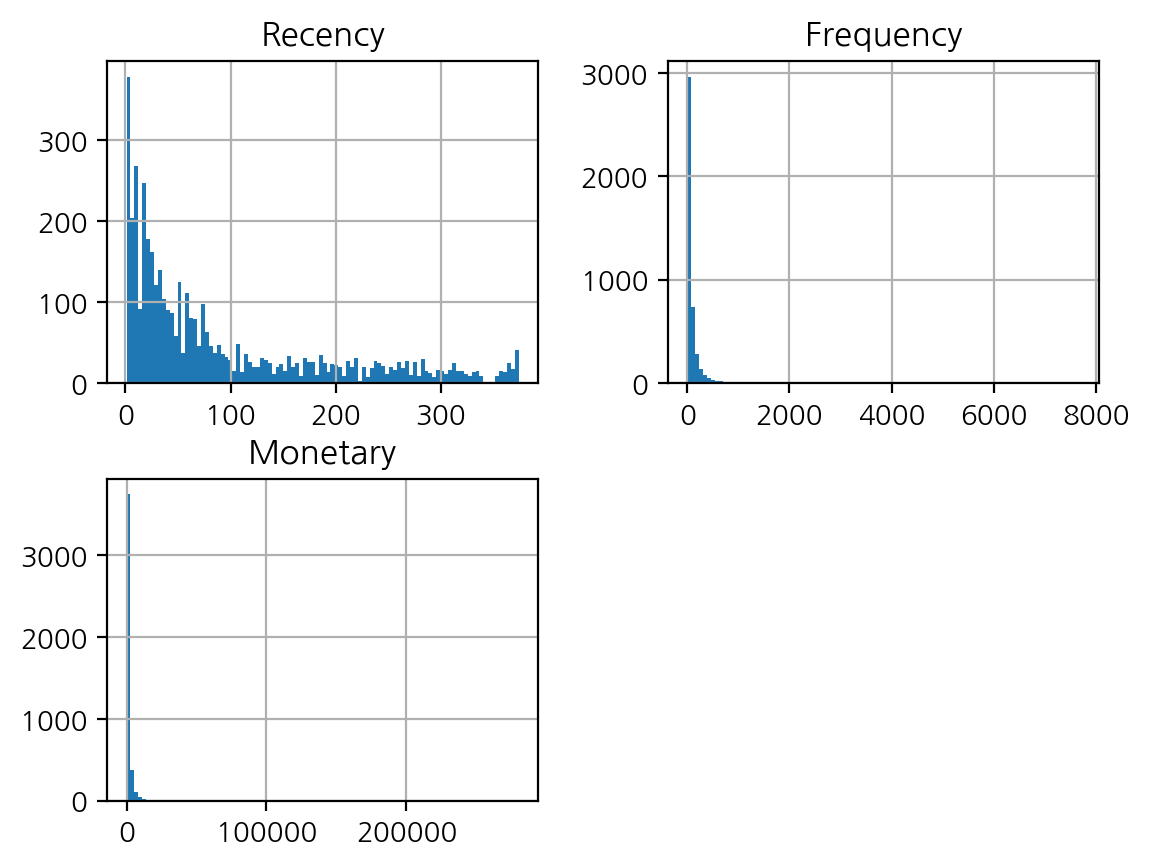

In [122]:
rfm.hist(bins=100);

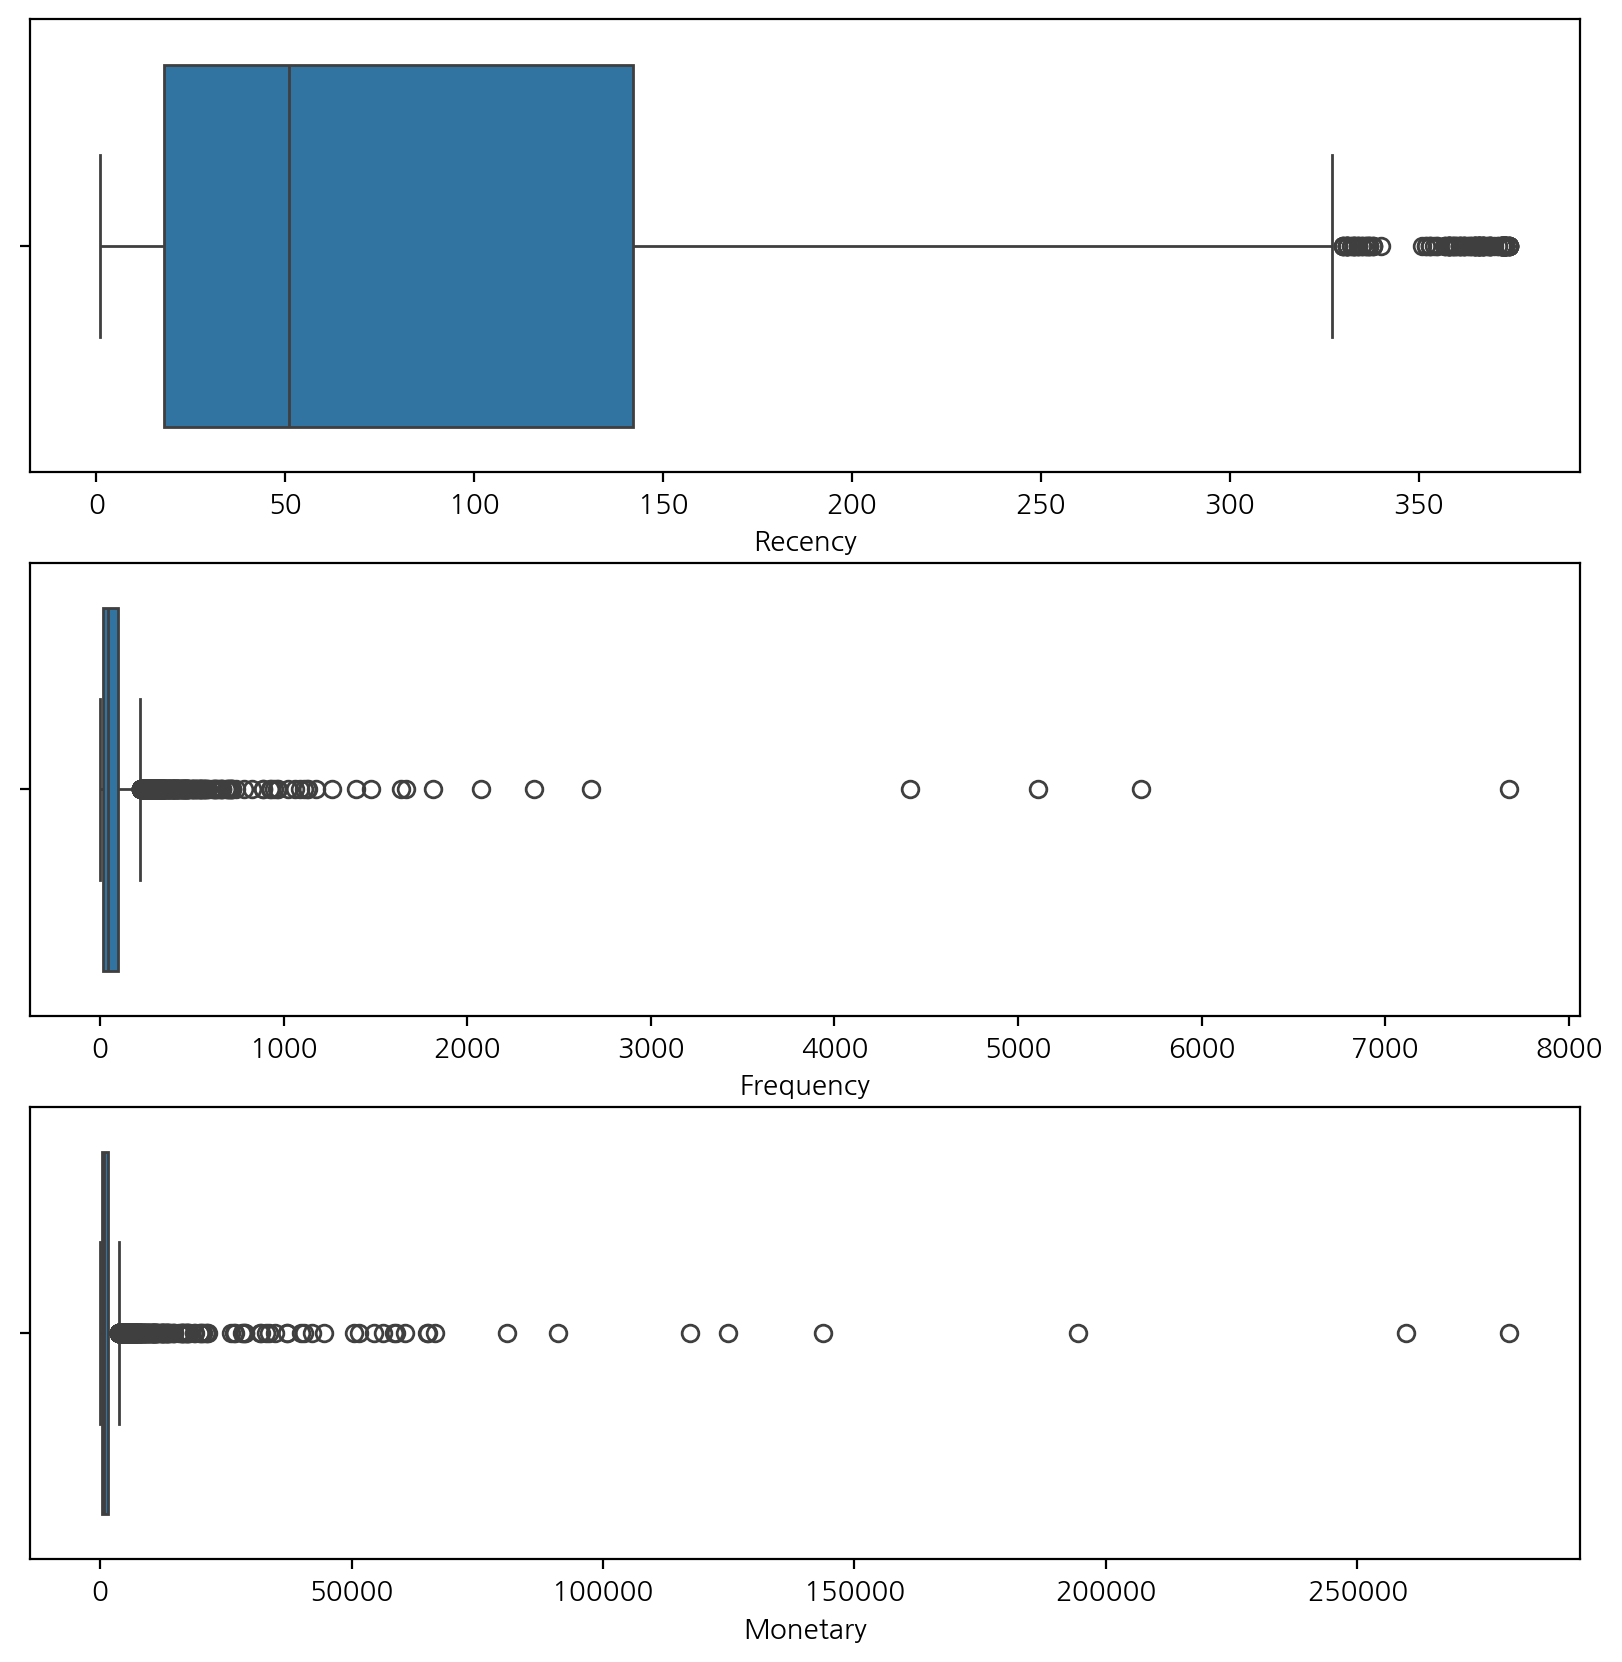

In [123]:
# RFM 
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))
sns.boxplot(x=rfm["Recency"], ax=axs[0])
sns.boxplot(x=rfm["Frequency"], ax=axs[1])
sns.boxplot(x=rfm["Monetary"], ax=axs[2]);

In [124]:
# Scoring

r_labels = list(range(5, 0, -1))
f_labels = list(range(1, 6))
m_labels = list(range(1, 6))
cut_size = 5

In [125]:
r_qcut = pd.qcut(rfm["Recency"], q=cut_size, labels=r_labels)
f_qcut = pd.qcut(rfm["Frequency"], q=cut_size, labels=f_labels)
m_qcut = pd.qcut(rfm["Monetary"], q=cut_size, labels=m_labels)

In [126]:
r_qcut.value_counts(normalize=True)

Recency
4    0.204797
5    0.203644
1    0.199262
3    0.197878
2    0.194419
Name: proportion, dtype: float64

In [127]:
f_qcut.value_counts(normalize=True)

Frequency
1    0.213330
4    0.199493
5    0.198801
3    0.195341
2    0.193035
Name: proportion, dtype: float64

In [128]:
m_qcut.value_counts(normalize=True)

Monetary
1    0.200185
2    0.199954
3    0.199954
4    0.199954
5    0.199954
Name: proportion, dtype: float64

In [129]:
rfm = rfm.assign(R=r_qcut, F=f_qcut, M=m_qcut)
rfm.head()

Recency  Frequency  Monetary  R  F  M
CustomerID                                       
12347.0           2        182   4310.00  5  5  5
12348.0          75         31   1797.24  2  3  4
12349.0          19         73   1757.55  4  4  4
12350.0         310         17    334.40  1  2  2
12352.0          36         85   2506.04  3  4  5

In [130]:
rfm["RFM_segment"] = rfm["R"].astype(str) + rfm["F"].astype(str) + rfm["M"].astype(str)
rfm.head()

Recency  Frequency  Monetary  R  F  M RFM_segment
CustomerID                                                   
12347.0           2        182   4310.00  5  5  5         555
12348.0          75         31   1797.24  2  3  4         234
12349.0          19         73   1757.55  4  4  4         444
12350.0         310         17    334.40  1  2  2         122
12352.0          36         85   2506.04  3  4  5         345

In [131]:
rfm["RFM_score"] = rfm[["R", "F", "M"]].astype(int).sum(axis=1)
rfm.head()

Recency  Frequency  Monetary  R  F  M RFM_segment  RFM_score
CustomerID                                                              
12347.0           2        182   4310.00  5  5  5         555         15
12348.0          75         31   1797.24  2  3  4         234          9
12349.0          19         73   1757.55  4  4  4         444         12
12350.0         310         17    334.40  1  2  2         122          5
12352.0          36         85   2506.04  3  4  5         345         12

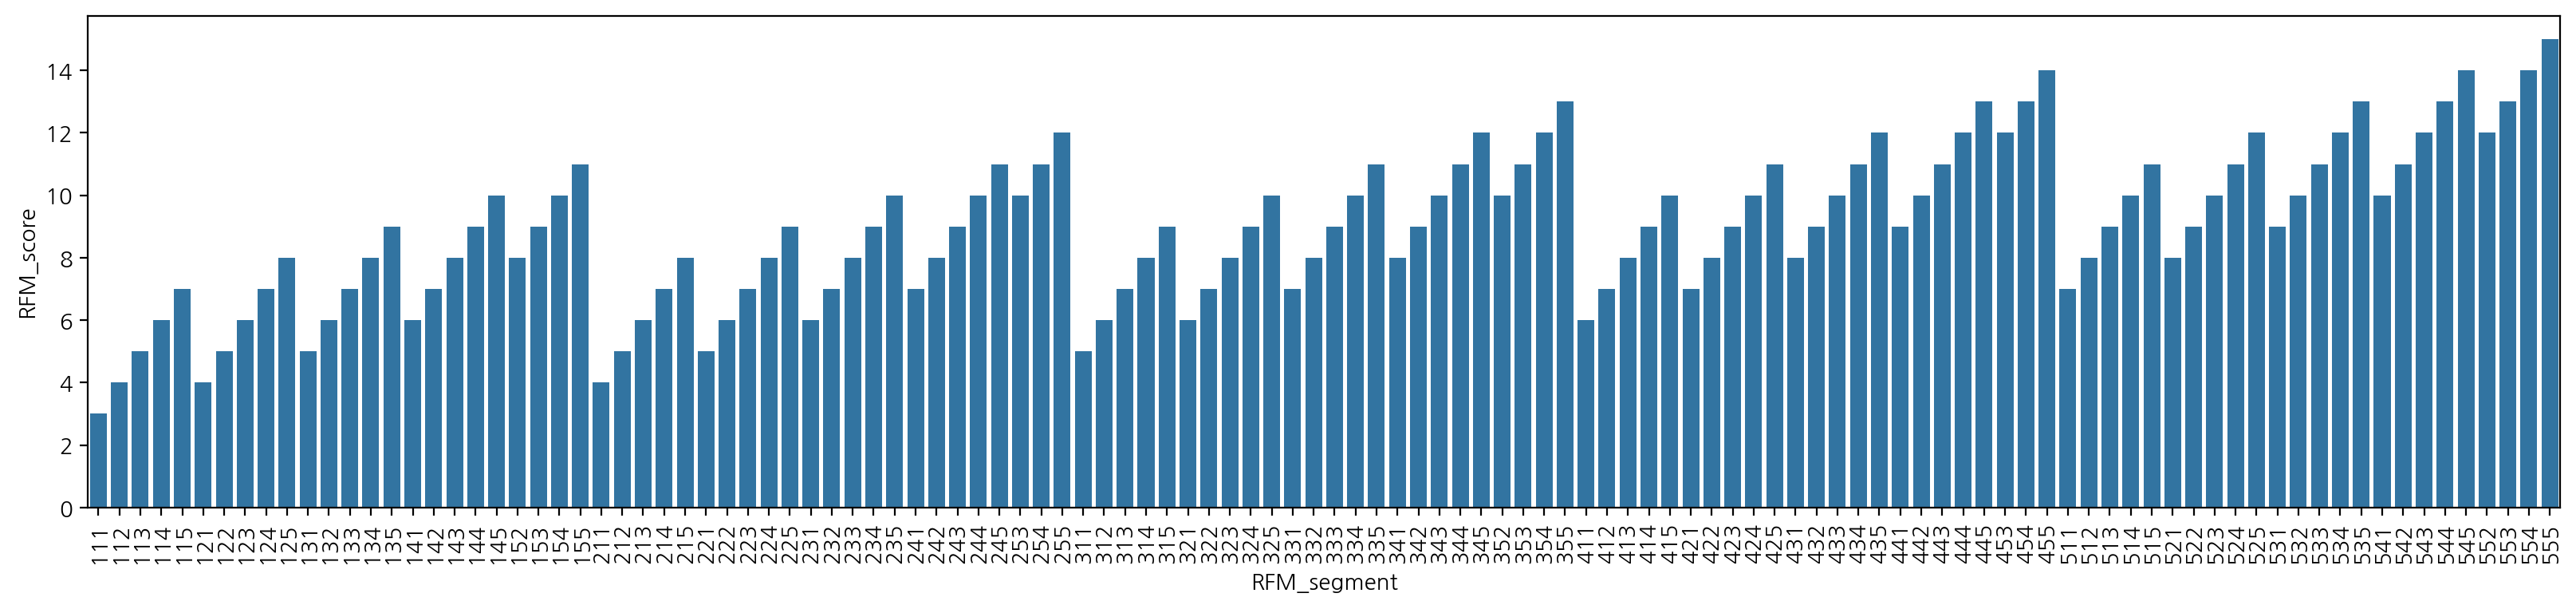

In [132]:
plt.figure(figsize=(20, 4))
sns.barplot(data=rfm.sort_values("RFM_segment"), x="RFM_segment", y="RFM_score")
plt.xticks(rotation=90);

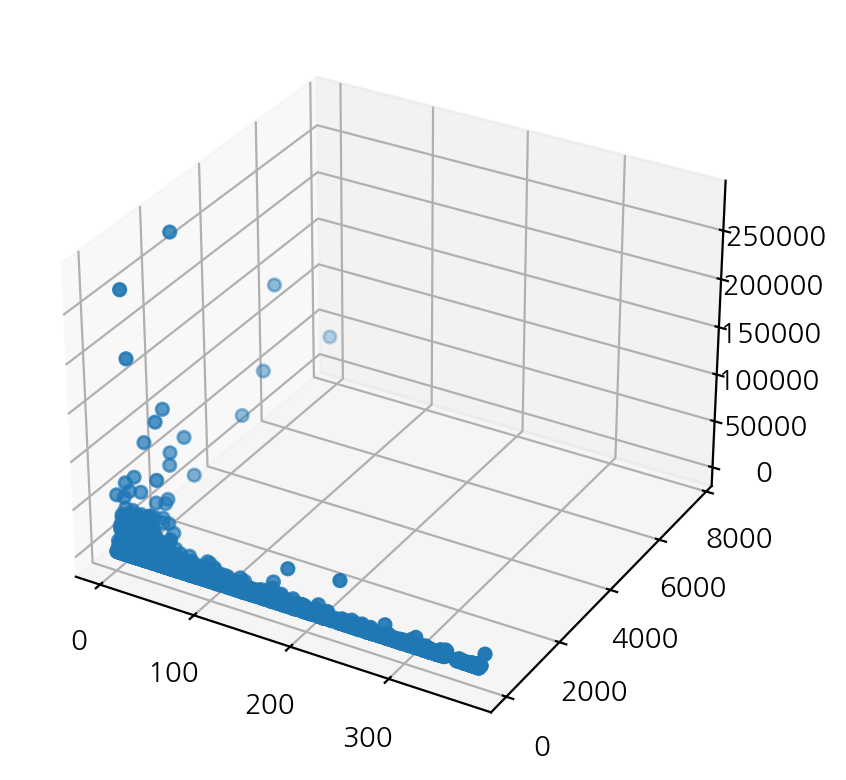

In [133]:
ax = plt.axes(projection="3d")
ax.scatter3D(rfm["Recency"], rfm["Frequency"], rfm["Monetary"]);

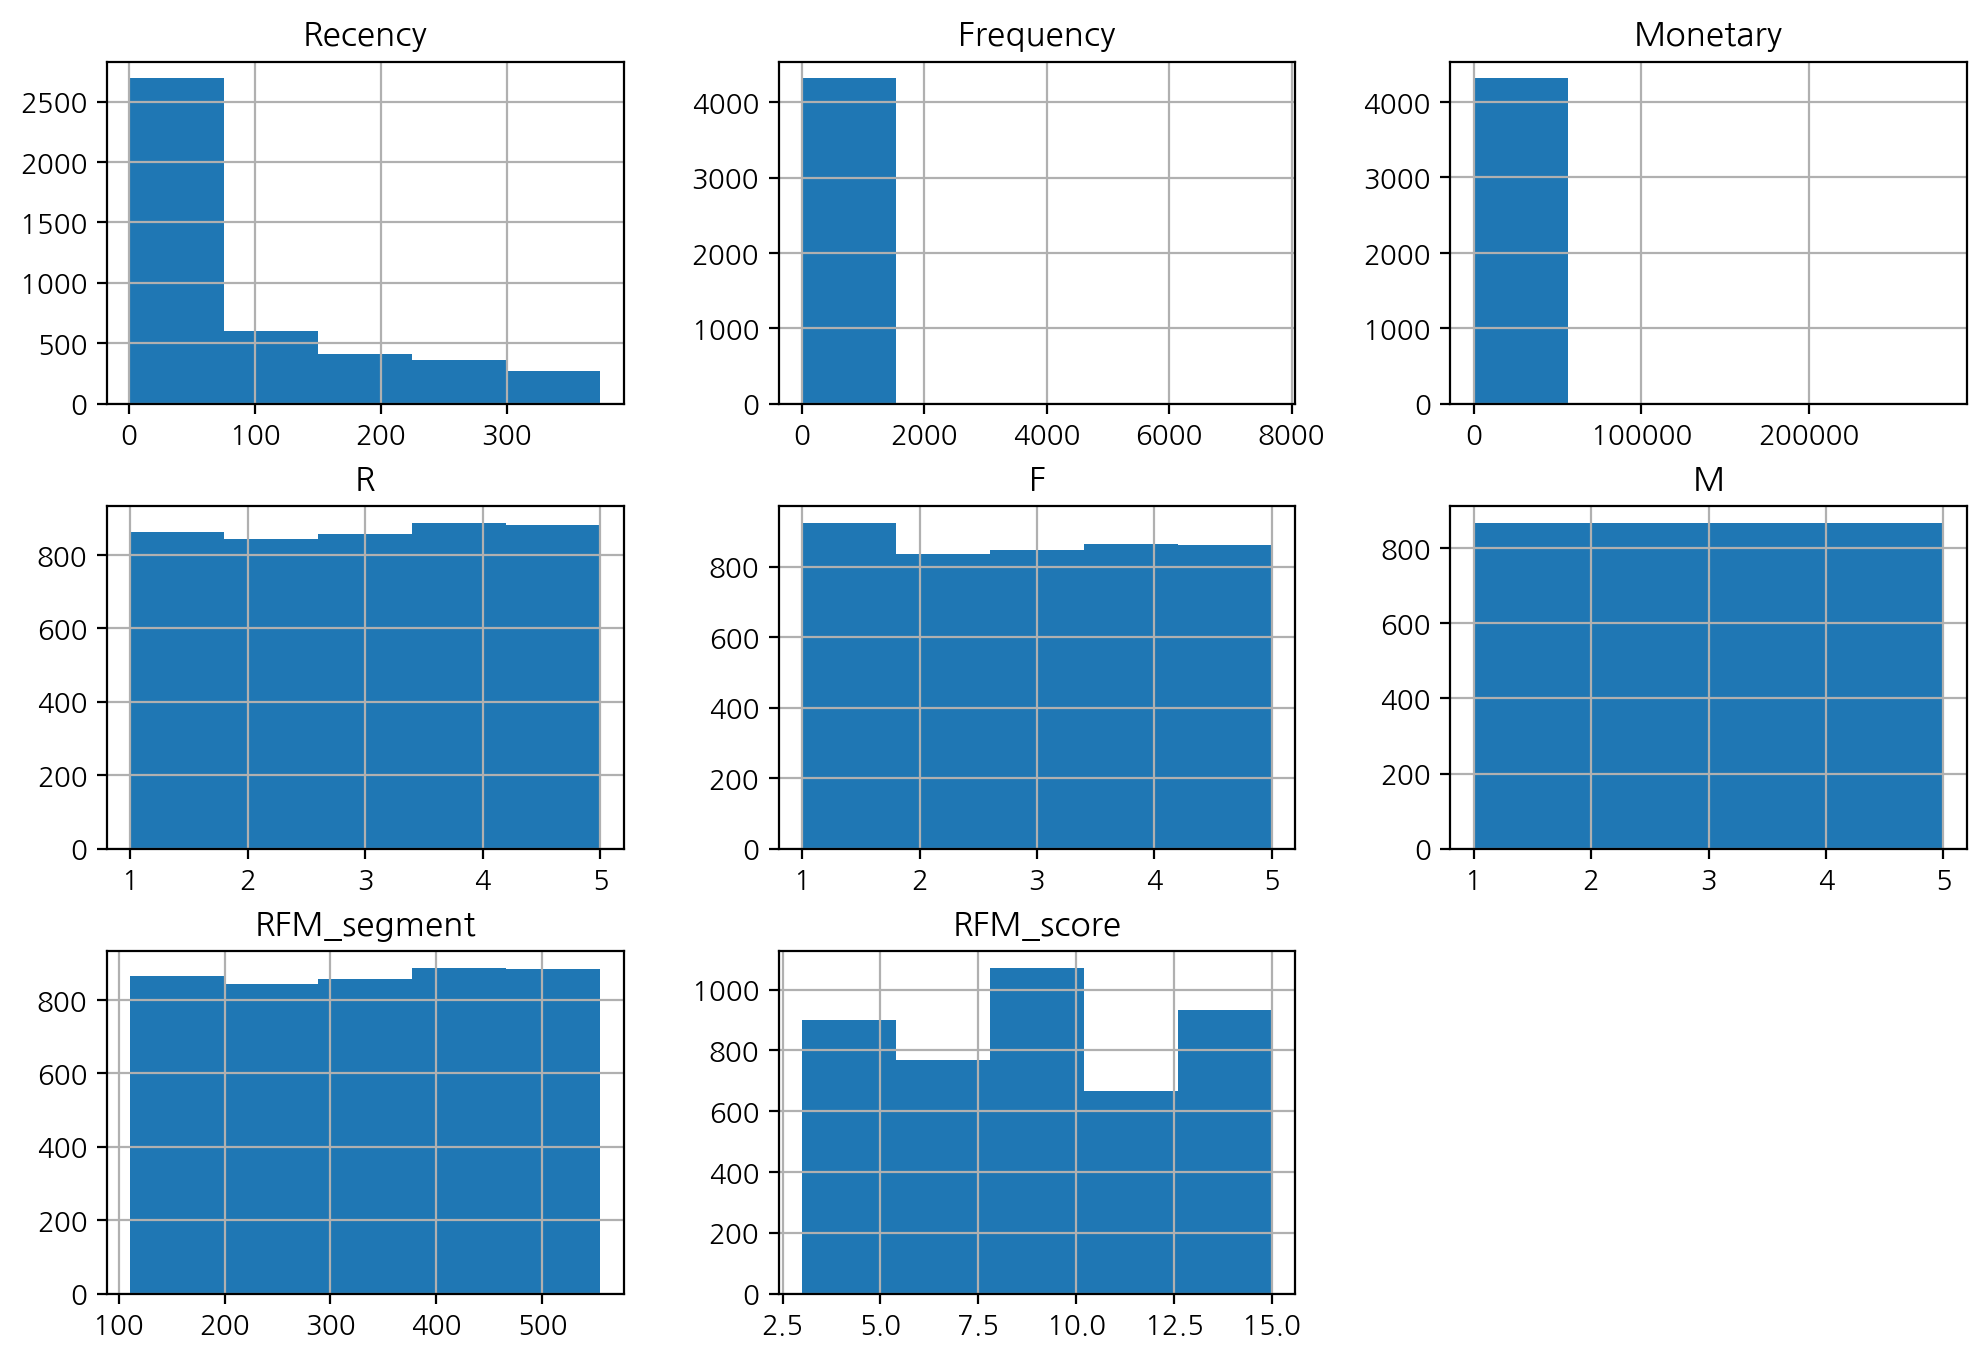

In [134]:
rfm.astype(int).hist(bins=5, figsize=(12, 8));

In [135]:
rfm.groupby("RFM_score").agg({"Recency": "mean",
                              "Frequency": "mean",
                              "Monetary": ["mean", "sum"]
                              }).style.background_gradient(axis=0).format("{:,.0f}")

In [136]:
rfm["RFM_class"] = pd.qcut(rfm["RFM_score"], q=3, labels=["Silver", "Gold", "Platinum"])
rfm

Recency  Frequency  Monetary  R  F  M RFM_segment  RFM_score  \
CustomerID                                                                 
12347.0           2        182   4310.00  5  5  5         555         15   
12348.0          75         31   1797.24  2  3  4         234          9   
12349.0          19         73   1757.55  4  4  4         444         12   
12350.0         310         17    334.40  1  2  2         122          5   
12352.0          36         85   2506.04  3  4  5         345         12   
...             ...        ...       ... .. .. ..         ...        ...   
18280.0         278         10    180.60  1  1  1         111          3   
18281.0         181          7     80.82  1  1  1         111          3   
18282.0           8         12    178.05  5  1  1         511          7   
18283.0           4        721   2045.53  5  5  4         554         14   
18287.0          43         70   1837.28  3  4  4         344         11   

           RFM_class  
CustomerID            
12347.0     Platinum  
12348.0         Gold  
12349.0     Platinum  
12350.0       Silver  
12352.0     Platinum  
...              ...  
18280.0       Silver  
18281.0       Silver  
18282.0       Silver  
18283.0     Platinum  
18287.0         Gold  

[4336 rows x 9 columns]

In [137]:
rfm.groupby("RFM_class")["RFM_score"].describe()

C:\Users\juher\AppData\Local\Temp\ipykernel_21140\1751954720.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm.groupby("RFM_class")["RFM_score"].describe()


count       mean       std   min   25%   50%   75%   max
RFM_class                                                           
Silver     1666.0   5.208884  1.383582   3.0   4.0   5.0   6.0   7.0
Gold       1409.0   9.469127  1.114505   8.0   8.0   9.0  10.0  11.0
Platinum   1261.0  13.471055  1.124120  12.0  12.0  13.0  14.0  15.0

<Axes: xlabel='RFM_class', ylabel='RFM_score'>

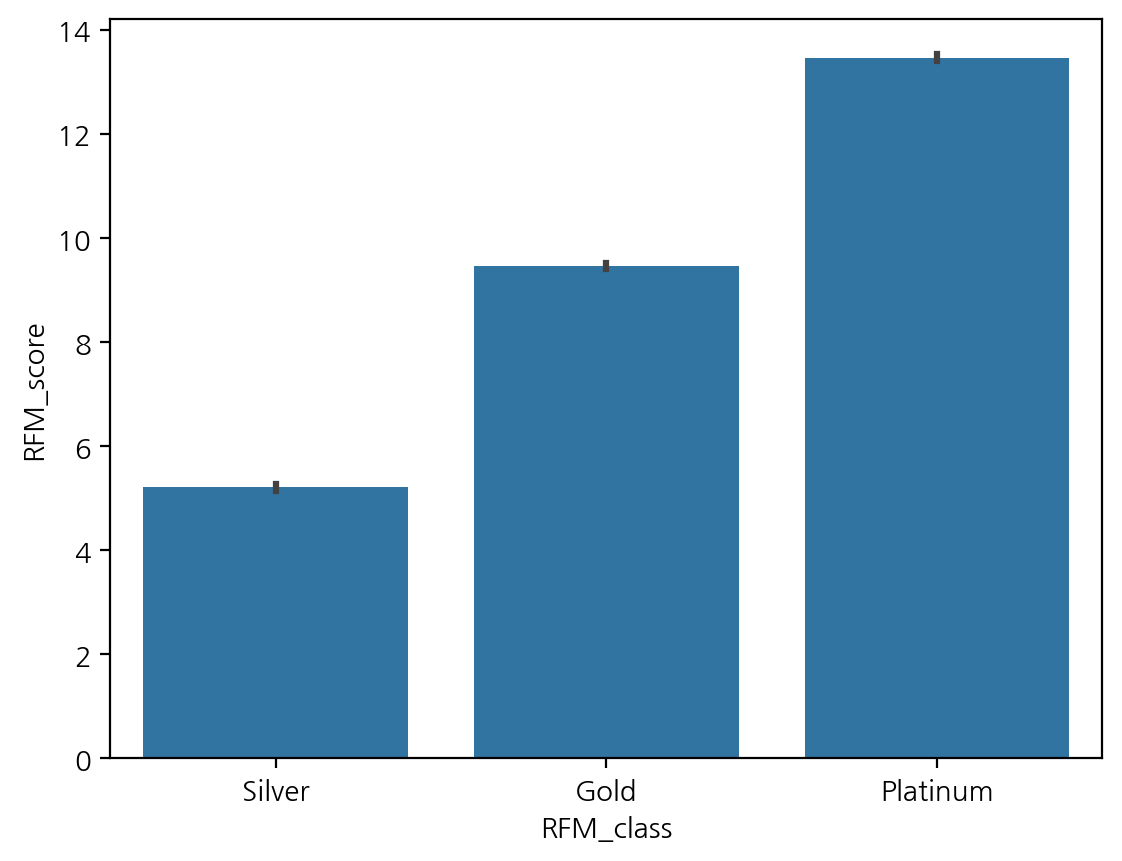

In [138]:
sns.barplot(data=rfm, x="RFM_class", y="RFM_score")

<Axes: xlabel='RFM_class', ylabel='RFM_score'>

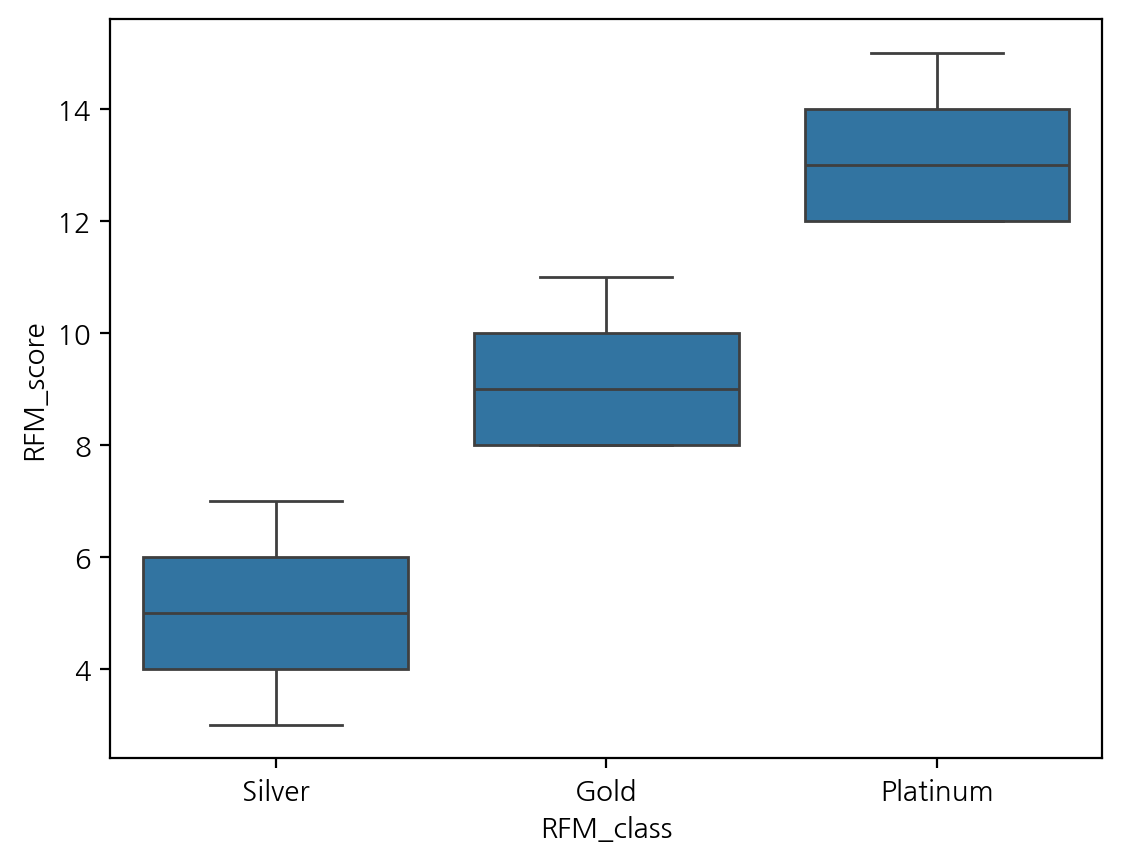

In [139]:
sns.boxplot(data=rfm, x="RFM_class", y="RFM_score")

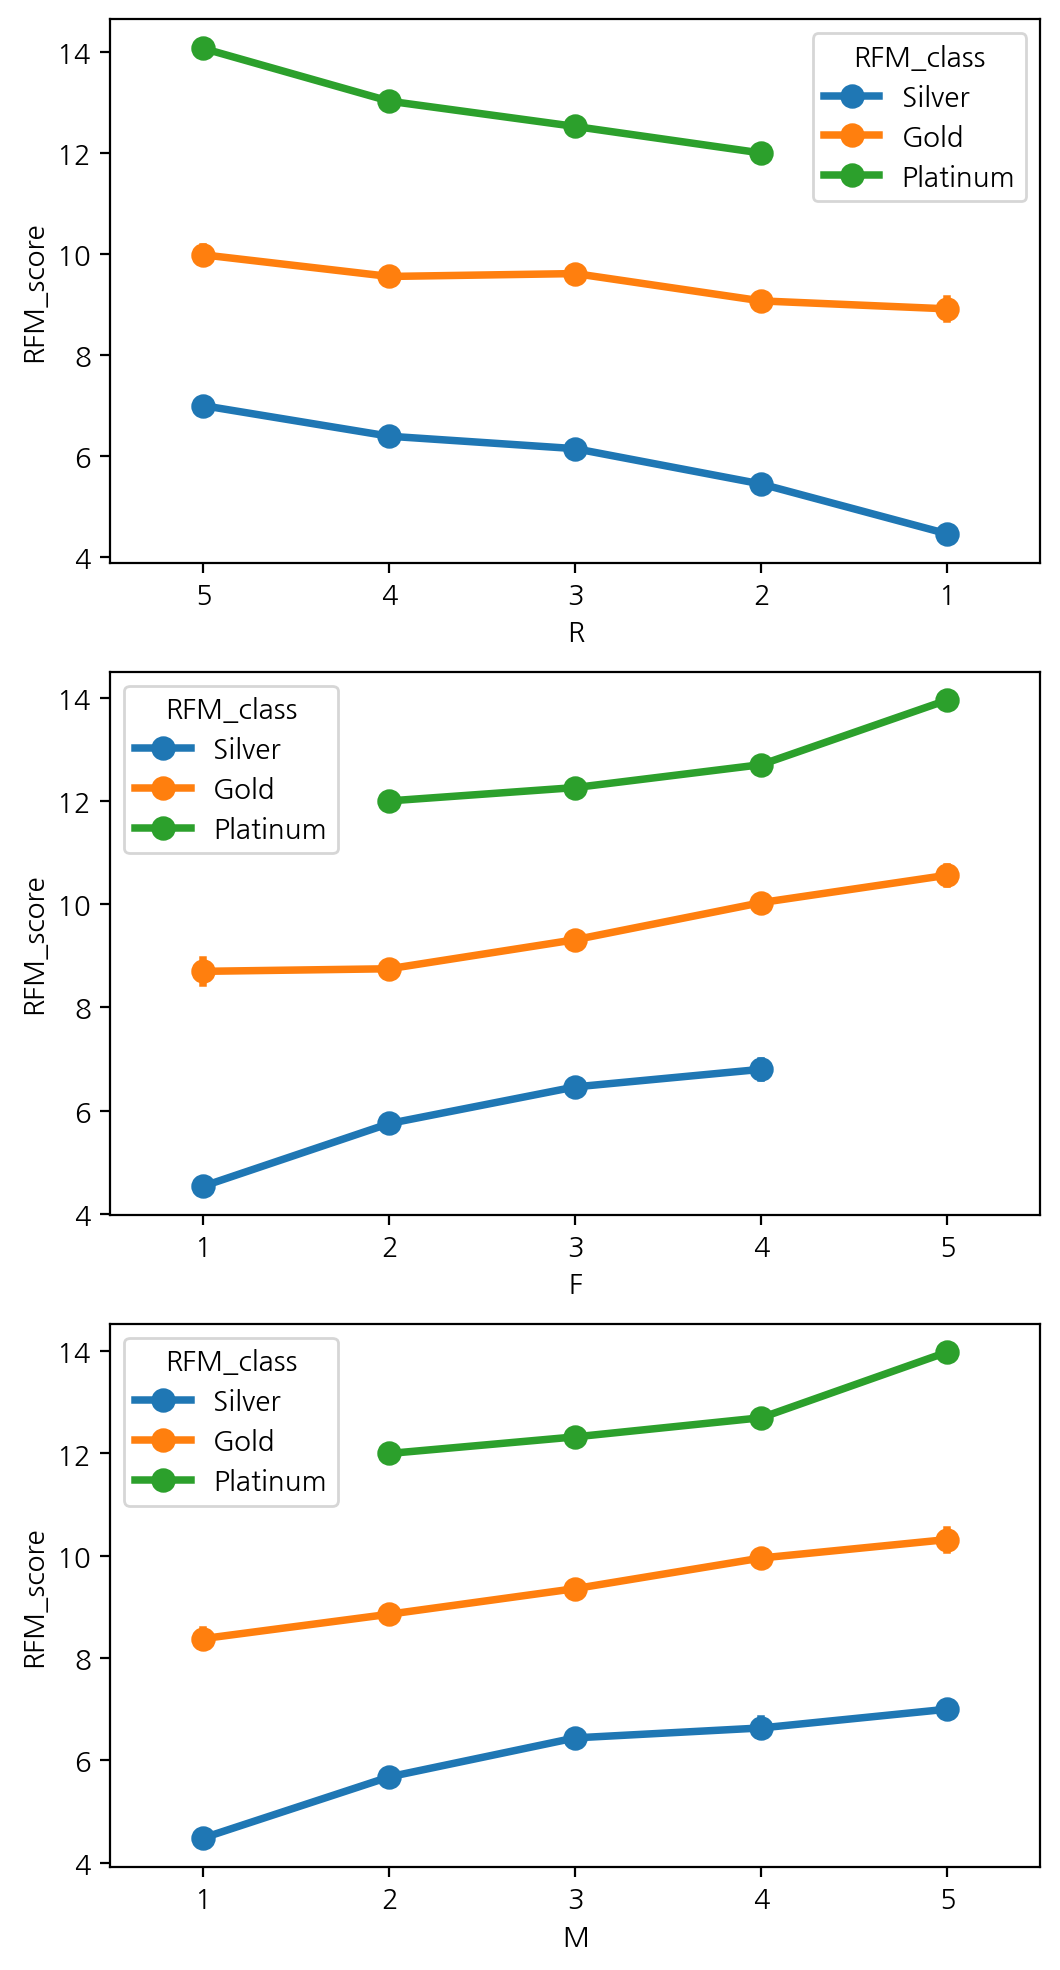

In [140]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6,12))
for c in ["R", "F", "M"]:
    sns.pointplot(data=rfm, x=c, y="RFM_score", hue="RFM_class", ax=axes[["R", "F", "M"].index(c)])

In [141]:
rfm.groupby("RFM_class").agg({"Recency": "mean",
                              "Frequency": "mean",
                              "Monetary": ["mean", "sum", "count"]
                              }).style.background_gradient(axis=0
                                                           ).format("{:,.0f}")

C:\Users\juher\AppData\Local\Temp\ipykernel_21140\1716980522.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm.groupby("RFM_class").agg({"Recency": "mean",


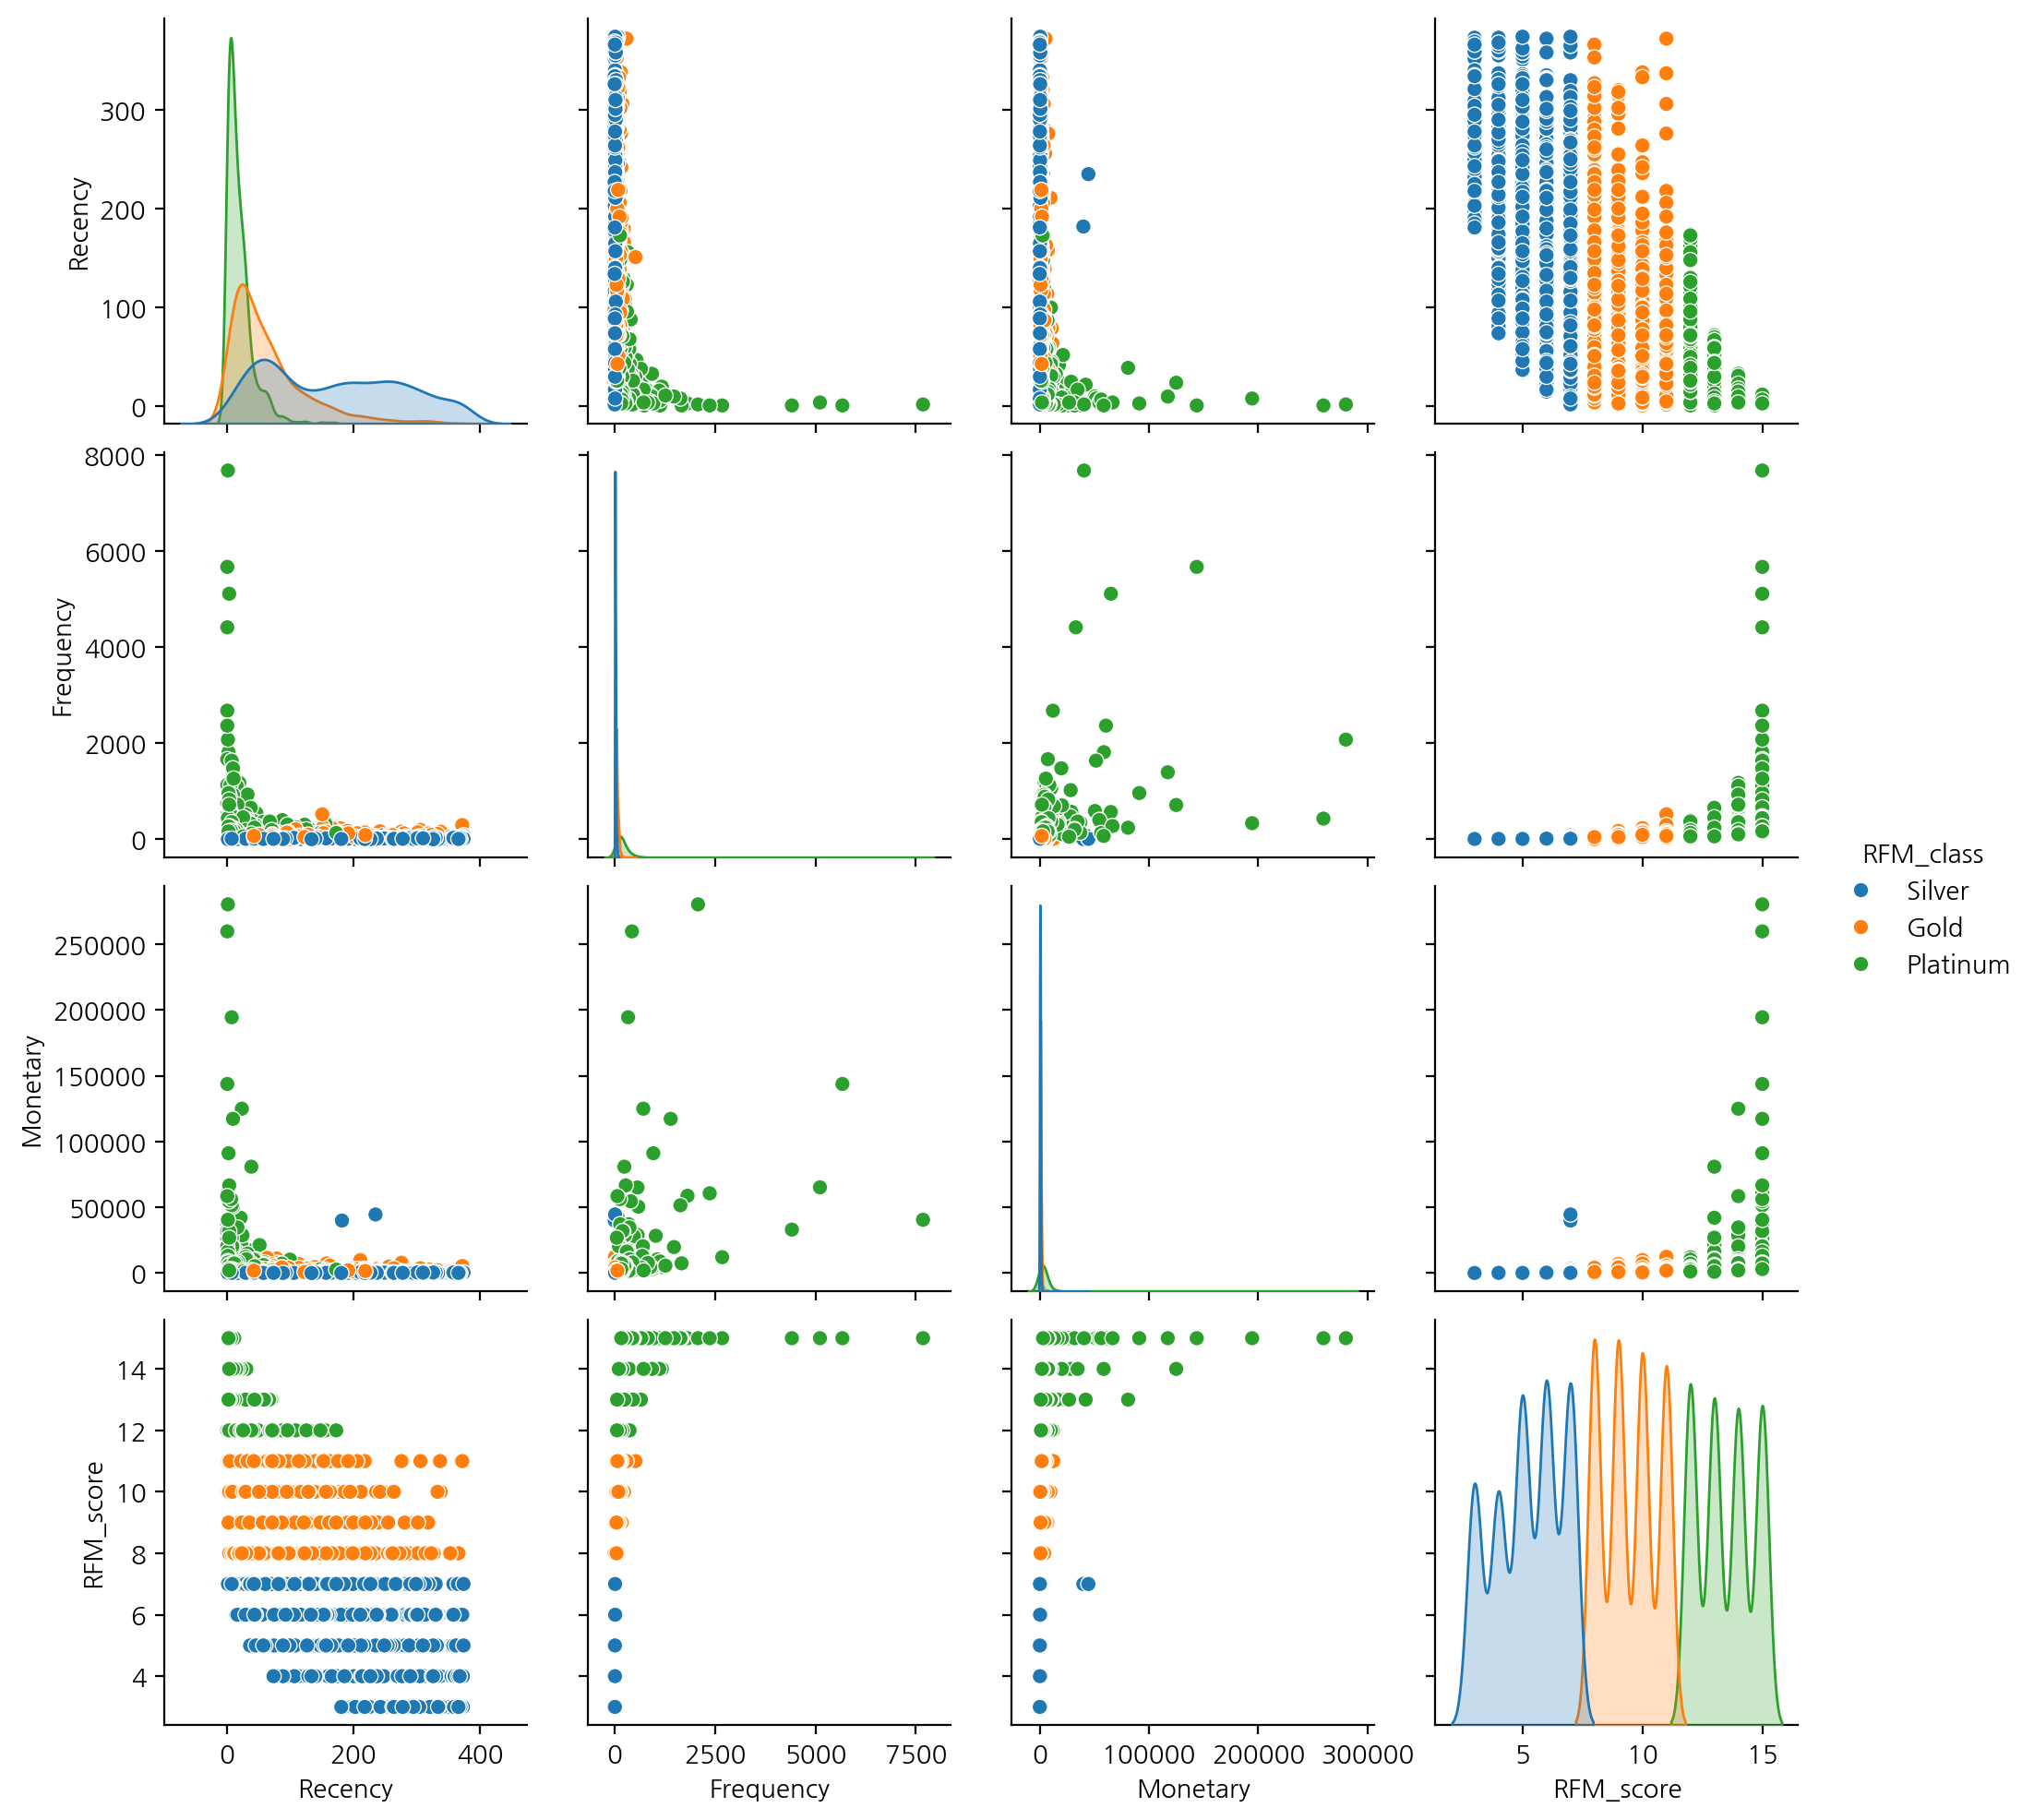

In [142]:
sns.pairplot(data=rfm, hue="RFM_class")

In [143]:
corr = rfm.select_dtypes(include="number").corr()
corr

Recency  Frequency  Monetary  RFM_score
Recency    1.000000  -0.206470 -0.128802  -0.700766
Frequency -0.206470   1.000000  0.449675   0.404202
Monetary  -0.128802   0.449675  1.000000   0.253773
RFM_score -0.700766   0.404202  0.253773   1.000000

<Axes: >

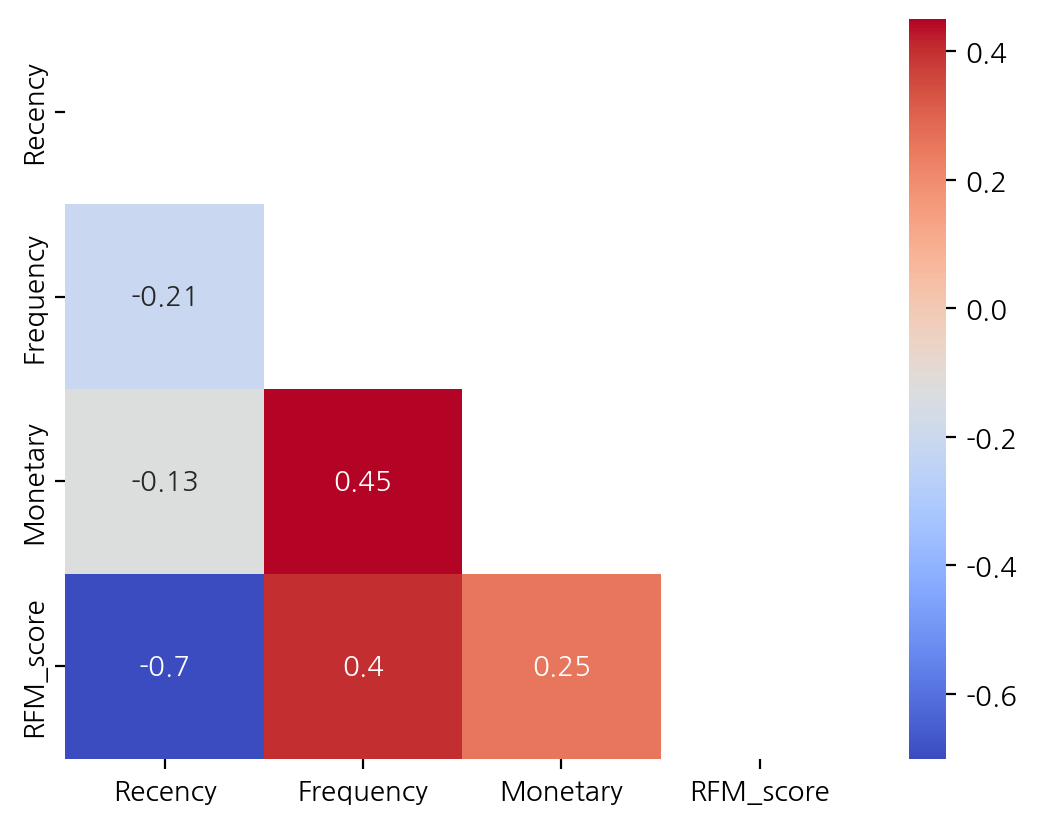

In [144]:
sns.heatmap(corr, annot=True, cmap="coolwarm", mask=np.triu(np.ones_like(corr)))

### RFM Clustering

In [145]:
rfm_cluster = rfm[["Recency", "Frequency", "Monetary"]]
rfm_cluster.head()

Recency  Frequency  Monetary
CustomerID                              
12347.0           2        182   4310.00
12348.0          75         31   1797.24
12349.0          19         73   1757.55
12350.0         310         17    334.40
12352.0          36         85   2506.04

In [146]:
rfm_cluster.describe

<bound method NDFrame.describe of             Recency  Frequency  Monetary
CustomerID                              
12347.0           2        182   4310.00
12348.0          75         31   1797.24
12349.0          19         73   1757.55
12350.0         310         17    334.40
12352.0          36         85   2506.04
...             ...        ...       ...
18280.0         278         10    180.60
18281.0         181          7     80.82
18282.0           8         12    178.05
18283.0           4        721   2045.53
18287.0          43         70   1837.28

[4336 rows x 3 columns]>

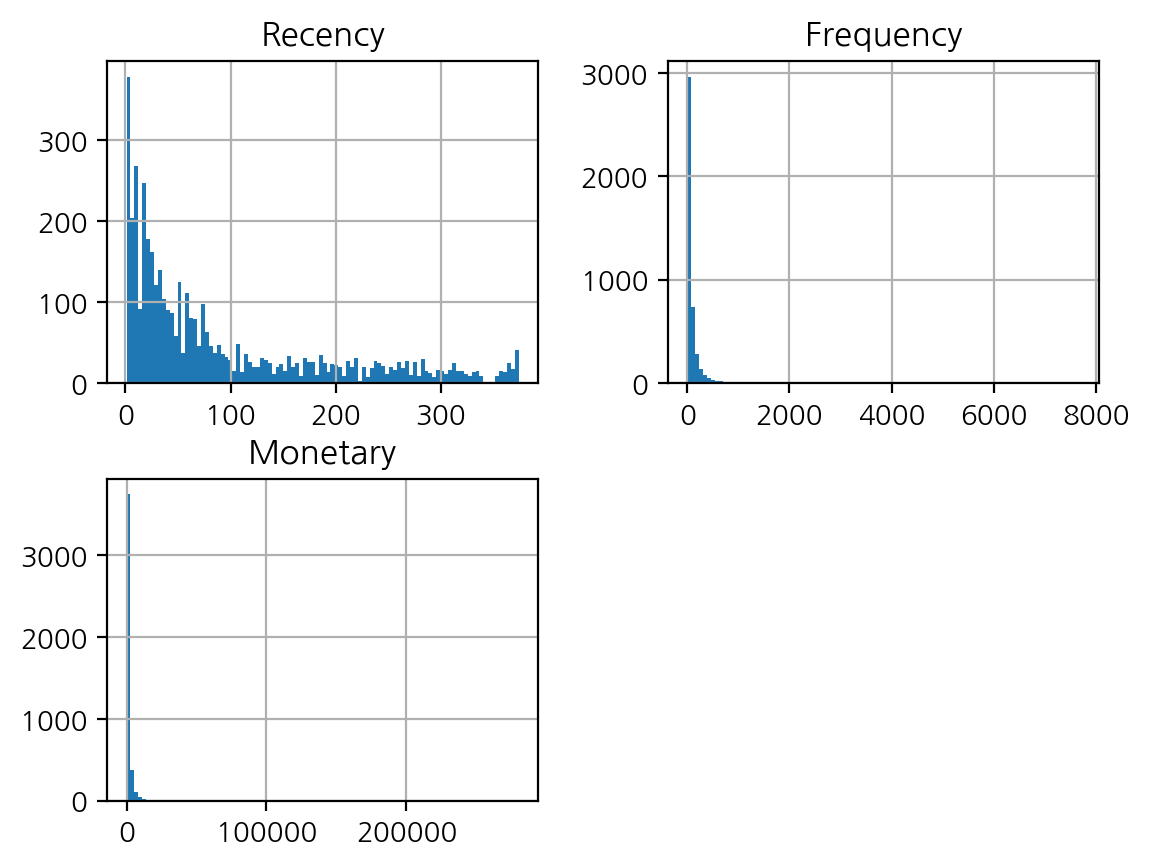

In [147]:
rfm_cluster.hist(bins=100);

In [148]:
# Preprosessing
# 정규분포에 근사하도록 log 변환 수행
rfm_cluster_log = np.log(rfm_cluster)

In [149]:
rfm_cluster_log.describe()

Recency    Frequency     Monetary
count  4336.000000  4336.000000  4336.000000
mean      3.767937     3.672962     6.583371
std       1.431304     1.319402     1.257338
min       0.000000     0.000000     1.321756
25%       2.890372     2.833213     5.725079
50%       3.931826     3.713572     6.505029
75%       4.955827     4.584967     7.413305
max       5.924256     8.945854    12.543280

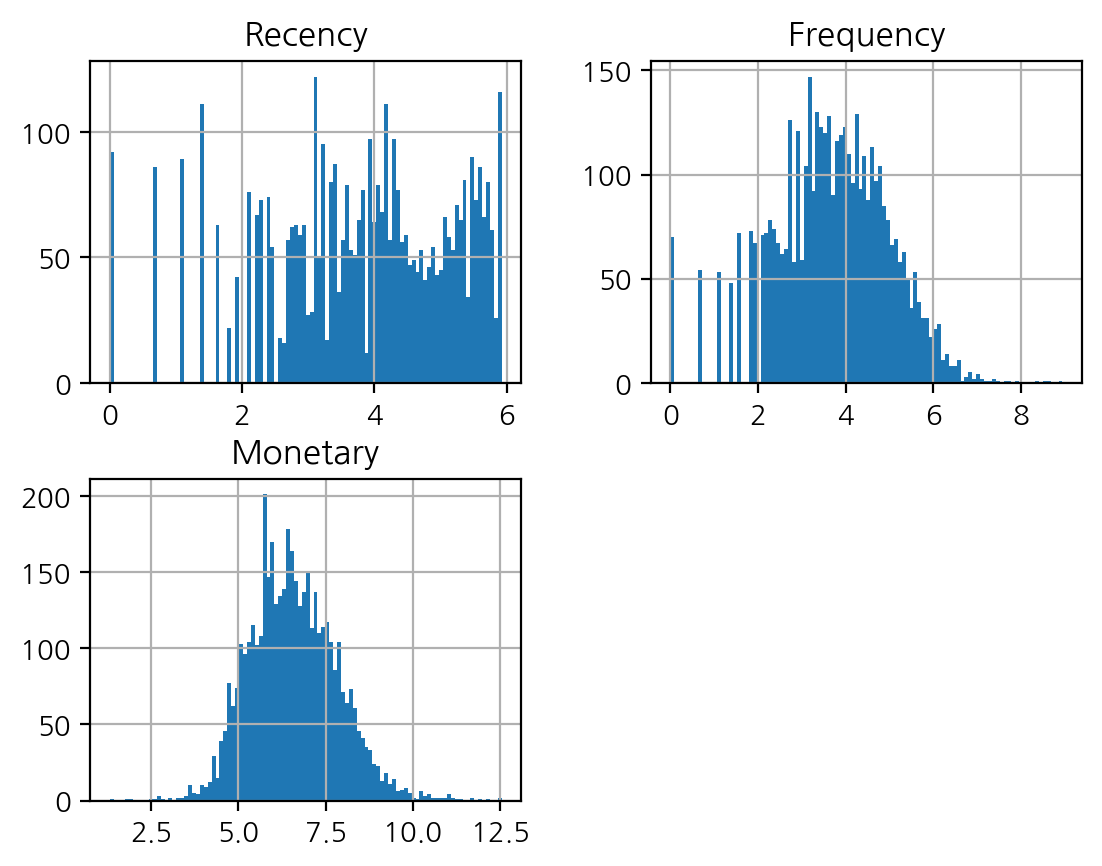

In [150]:
rfm_cluster_log.hist(bins=100);

In [151]:
# 표준화 진행
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(rfm_cluster_log)

In [152]:
X = pd.DataFrame(X, columns=rfm_cluster_log.columns)

In [153]:
# Scaling 결과 확인
pd.DataFrame(X).describe().round(2)

Recency  Frequency  Monetary
count  4336.00    4336.00   4336.00
mean      0.00       0.00     -0.00
std       1.00       1.00      1.00
min      -2.63      -2.78     -4.19
25%      -0.61      -0.64     -0.68
50%       0.11       0.03     -0.06
75%       0.83       0.69      0.66
max       1.51       4.00      4.74

In [154]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [155]:
inertia = []
silhouettes = []

for n_cluster in range(2, 10):
    kmeans = KMeans(n_clusters=n_cluster, n_init="auto", random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, labels=kmeans.labels_))
    print(n_cluster, end=",")


2,3,4,5,6,7,8,9,

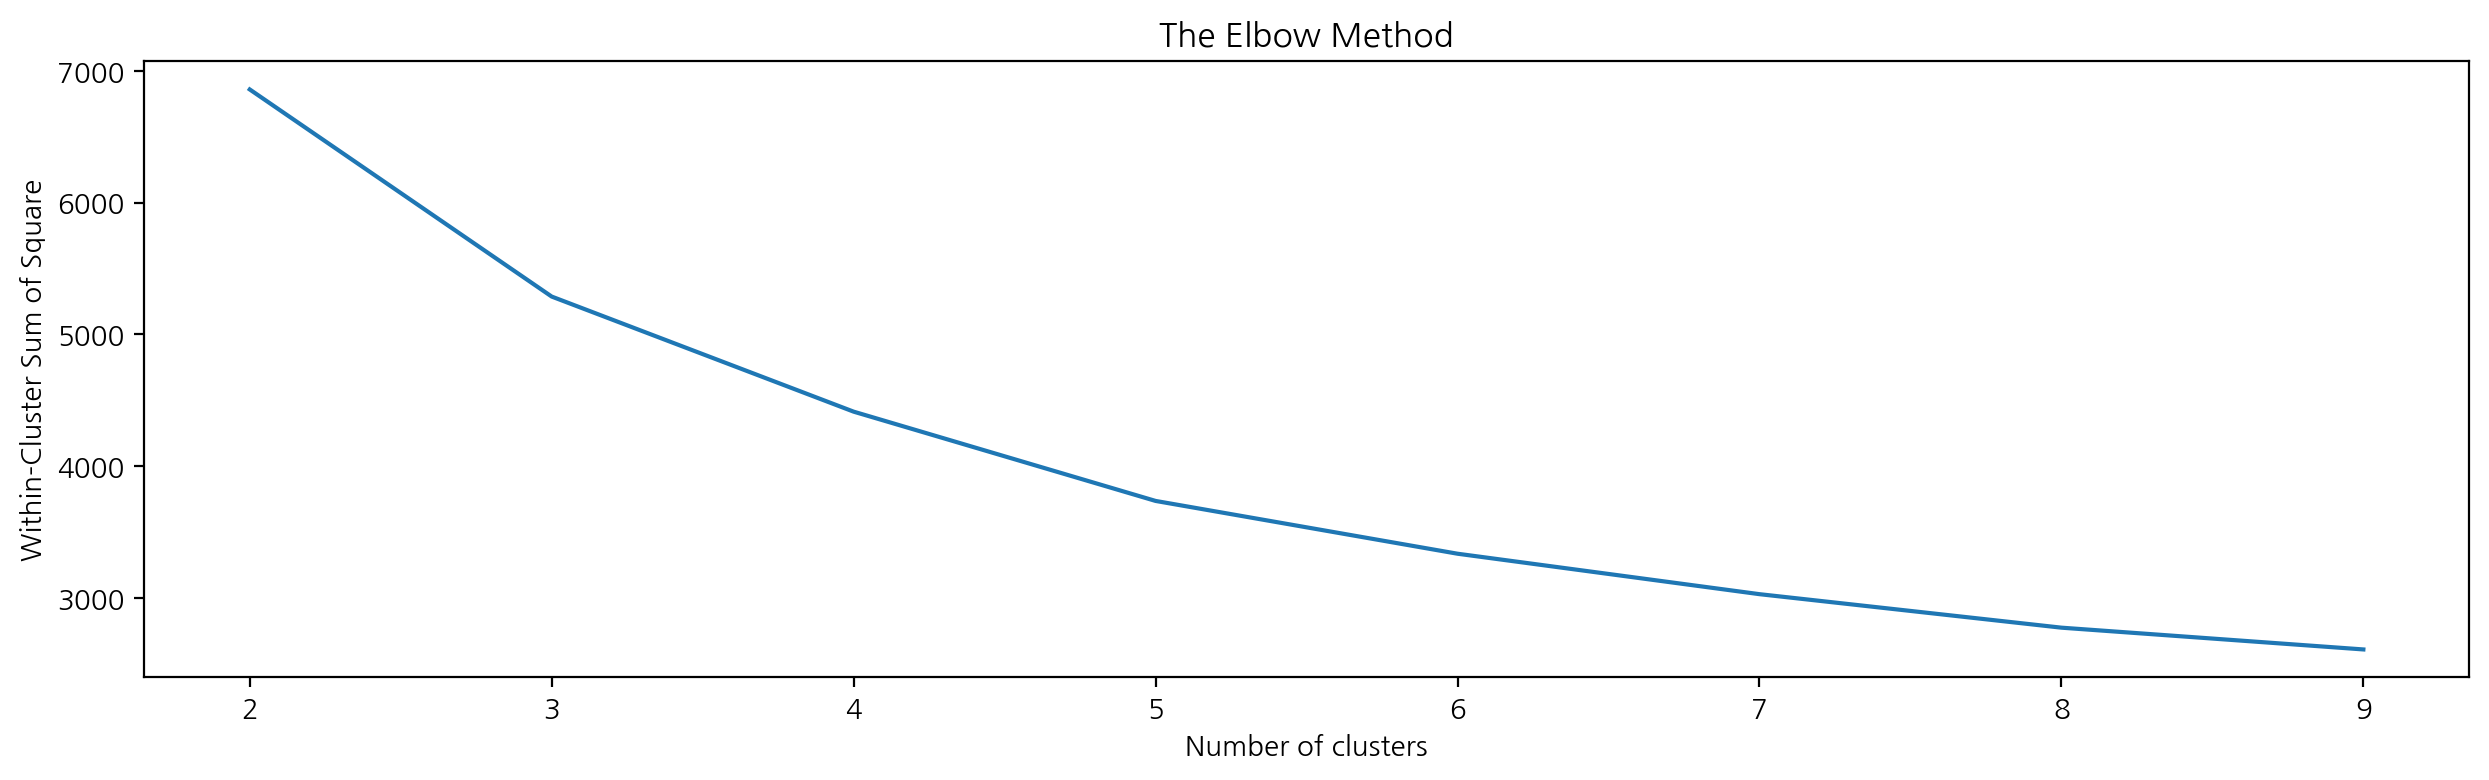

In [156]:
plt.figure(figsize=(15, 4))
sns.lineplot(x=range(2, 10), y=inertia)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Within-Cluster Sum of Square")
plt.xticks(range(2, 10));

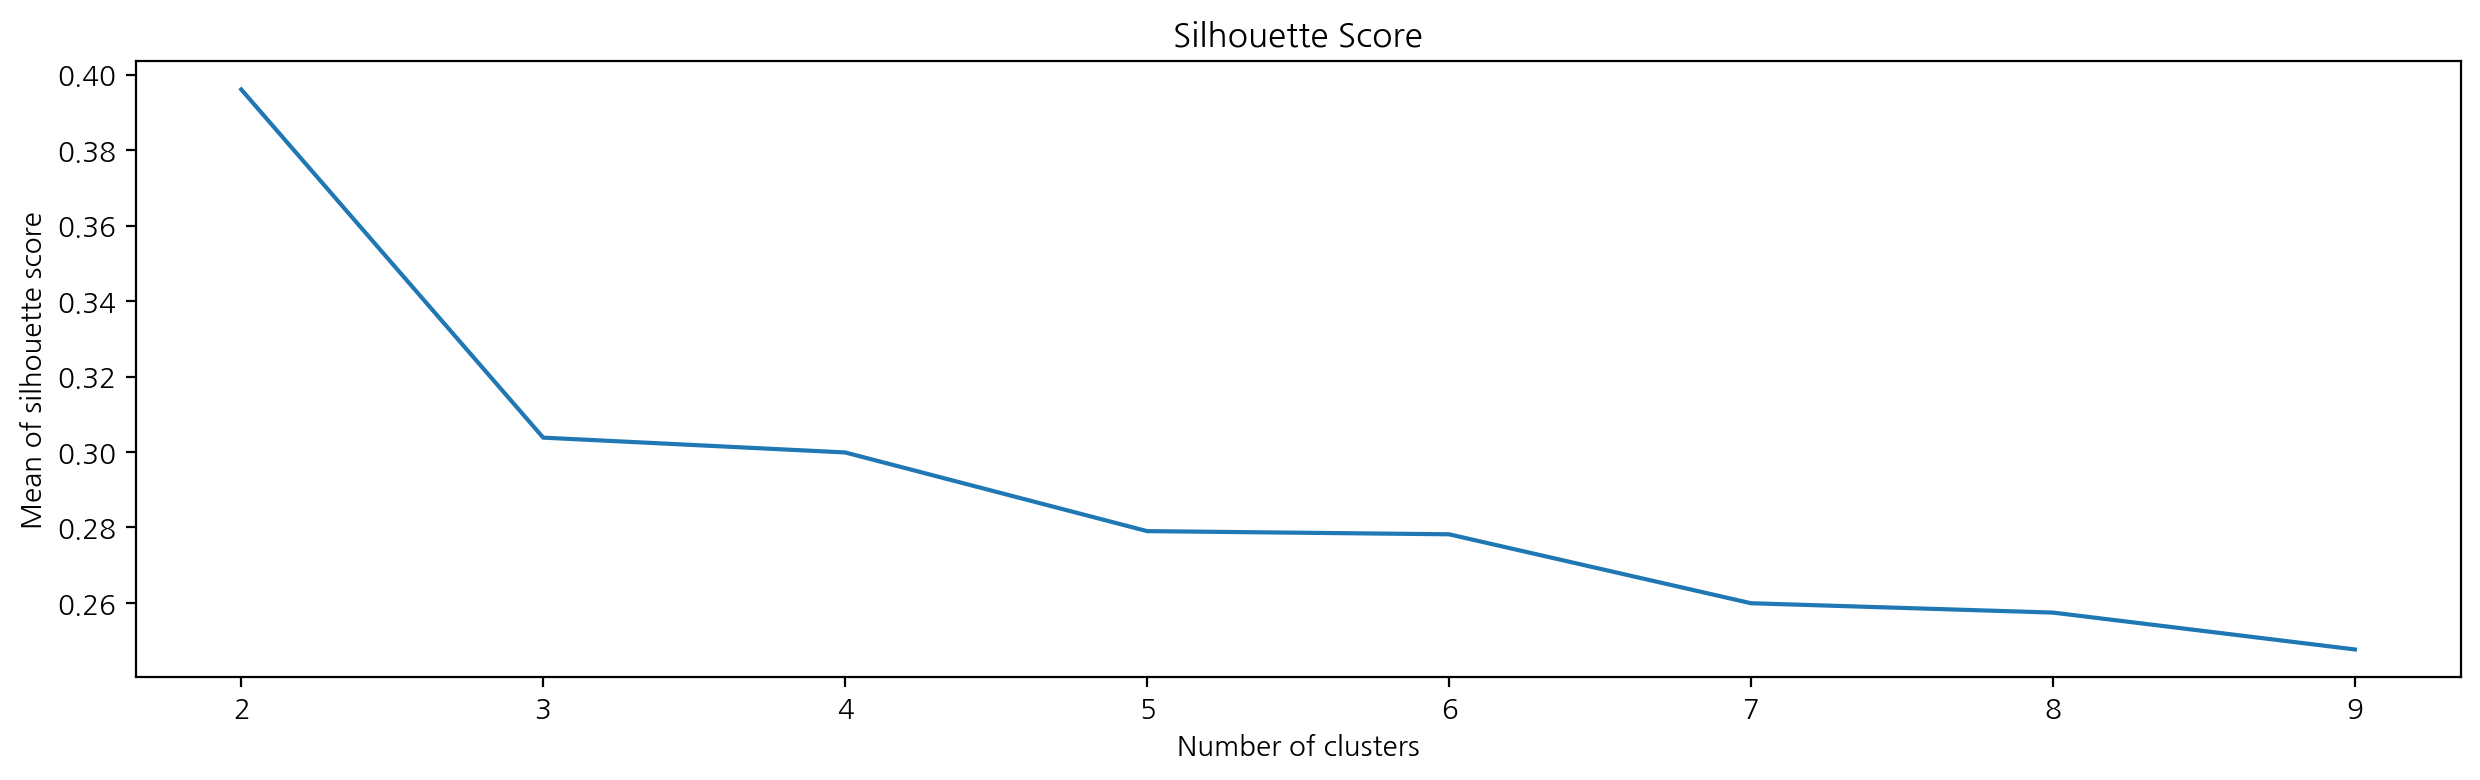

In [157]:
plt.figure(figsize=(15, 4))
sns.lineplot(x=range(2, 10), y=silhouettes)
plt.title("Silhouette Score")
plt.xlabel("Number of clusters")
plt.ylabel("Mean of silhouette score")
plt.xticks(range(2, 10));

In [158]:
# # Yellowbrick: Machine learning visualization package
# # https://www.scikit-yb.org/en/latest/
# from yellowbrick.cluster import KElbowVisualizer

In [159]:
# KEV = KElbowVisualizer(kmeans, k=10, n_init="auto", random_state=42)
# KEV.fit(X)
# KEV.show();

In [173]:
kmeans = KMeans(n_clusters=3, n_init="auto", random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [174]:
pd.Series(kmeans.labels_).value_counts()

2    1854
0    1524
1     958
Name: count, dtype: int64

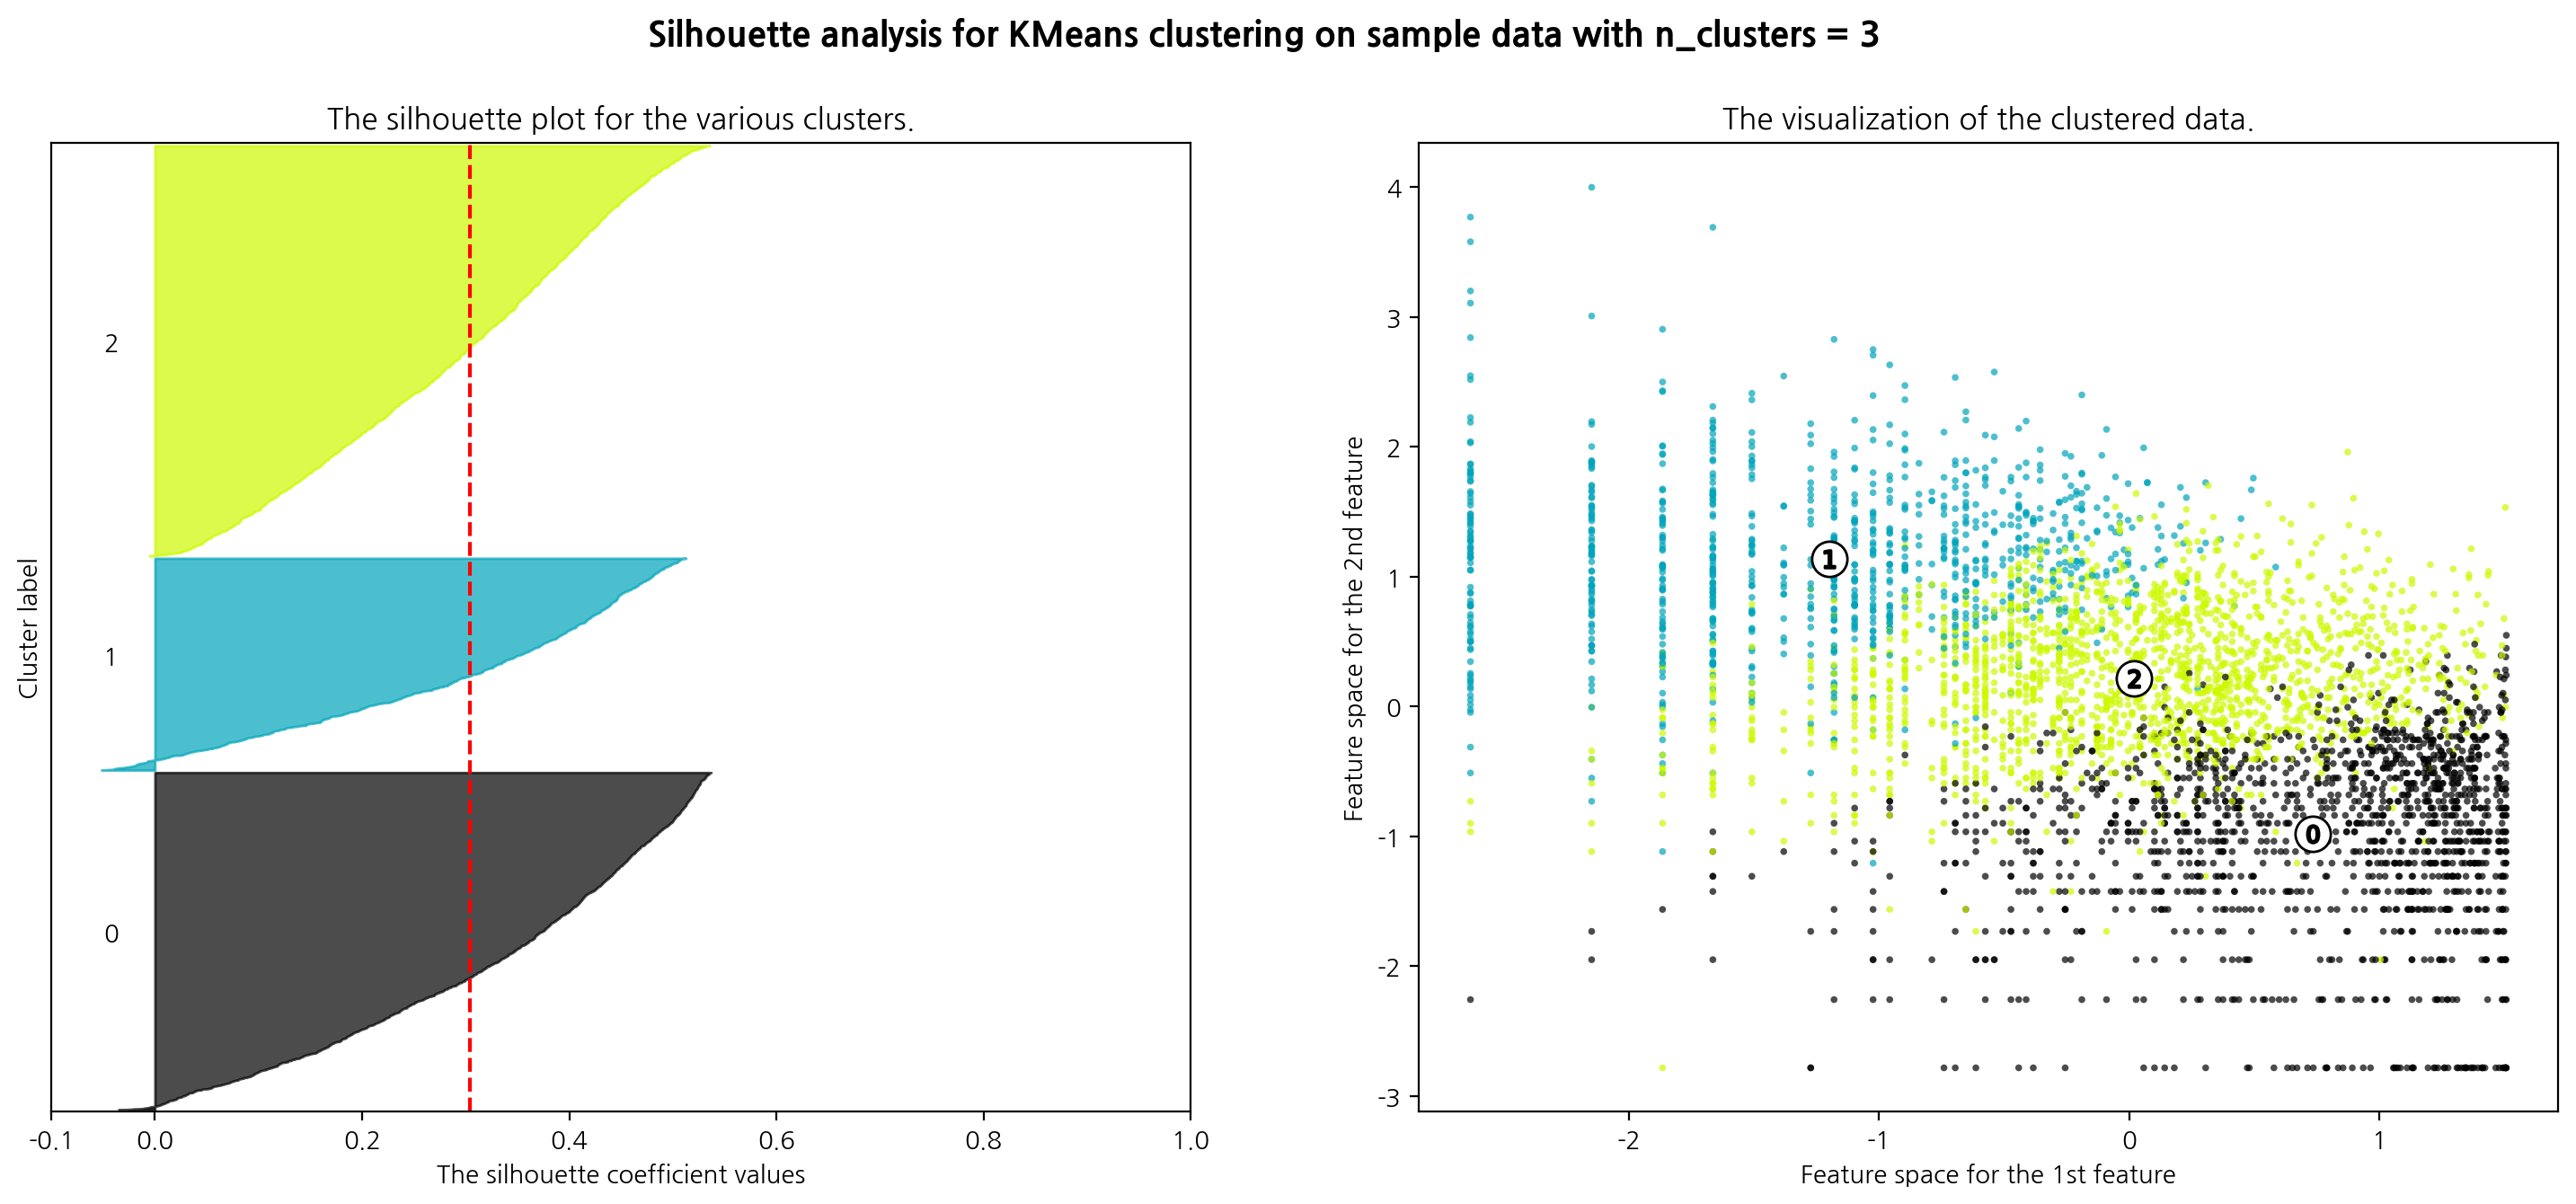

In [175]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

n_clusters = 3
silhouette_avg = silhouette_score(X, labels=kmeans.labels_)

# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

cluster_labels = kmeans.labels_
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
    X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)

# Labeling the clusters
centers = kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(
    "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
    % n_clusters,
    fontsize=14,
    fontweight="bold",
)

plt.show()

In [163]:
rfm["Cluster"] = kmeans.labels_
rfm.head()

Recency  Frequency  Monetary  R  F  M RFM_segment  RFM_score  \
CustomerID                                                                 
12347.0           2        182   4310.00  5  5  5         555         15   
12348.0          75         31   1797.24  2  3  4         234          9   
12349.0          19         73   1757.55  4  4  4         444         12   
12350.0         310         17    334.40  1  2  2         122          5   
12352.0          36         85   2506.04  3  4  5         345         12   

           RFM_class  Cluster  
CustomerID                     
12347.0     Platinum        1  
12348.0         Gold        2  
12349.0     Platinum        2  
12350.0       Silver        0  
12352.0     Platinum        2

In [164]:
pd.crosstab(rfm["RFM_class"], rfm["Cluster"])

Cluster       0    1     2
RFM_class                 
Silver     1491    0   175
Gold         33   31  1345
Platinum      0  927   334

In [165]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4336 entries, 12347.0 to 18287.0
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Recency      4336 non-null   int64   
 1   Frequency    4336 non-null   int64   
 2   Monetary     4336 non-null   float64 
 3   R            4336 non-null   category
 4   F            4336 non-null   category
 5   M            4336 non-null   category
 6   RFM_segment  4336 non-null   object  
 7   RFM_score    4336 non-null   int64   
 8   RFM_class    4336 non-null   category
 9   Cluster      4336 non-null   int32   
dtypes: category(4), float64(1), int32(1), int64(3), object(1)
memory usage: 237.9+ KB


In [166]:
rfm = rfm.astype({"R": int,
                  "F": int,
                  "M": int})

In [167]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4336 entries, 12347.0 to 18287.0
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Recency      4336 non-null   int64   
 1   Frequency    4336 non-null   int64   
 2   Monetary     4336 non-null   float64 
 3   R            4336 non-null   int32   
 4   F            4336 non-null   int32   
 5   M            4336 non-null   int32   
 6   RFM_segment  4336 non-null   object  
 7   RFM_score    4336 non-null   int64   
 8   RFM_class    4336 non-null   category
 9   Cluster      4336 non-null   int32   
dtypes: category(1), float64(1), int32(4), int64(3), object(1)
memory usage: 275.4+ KB


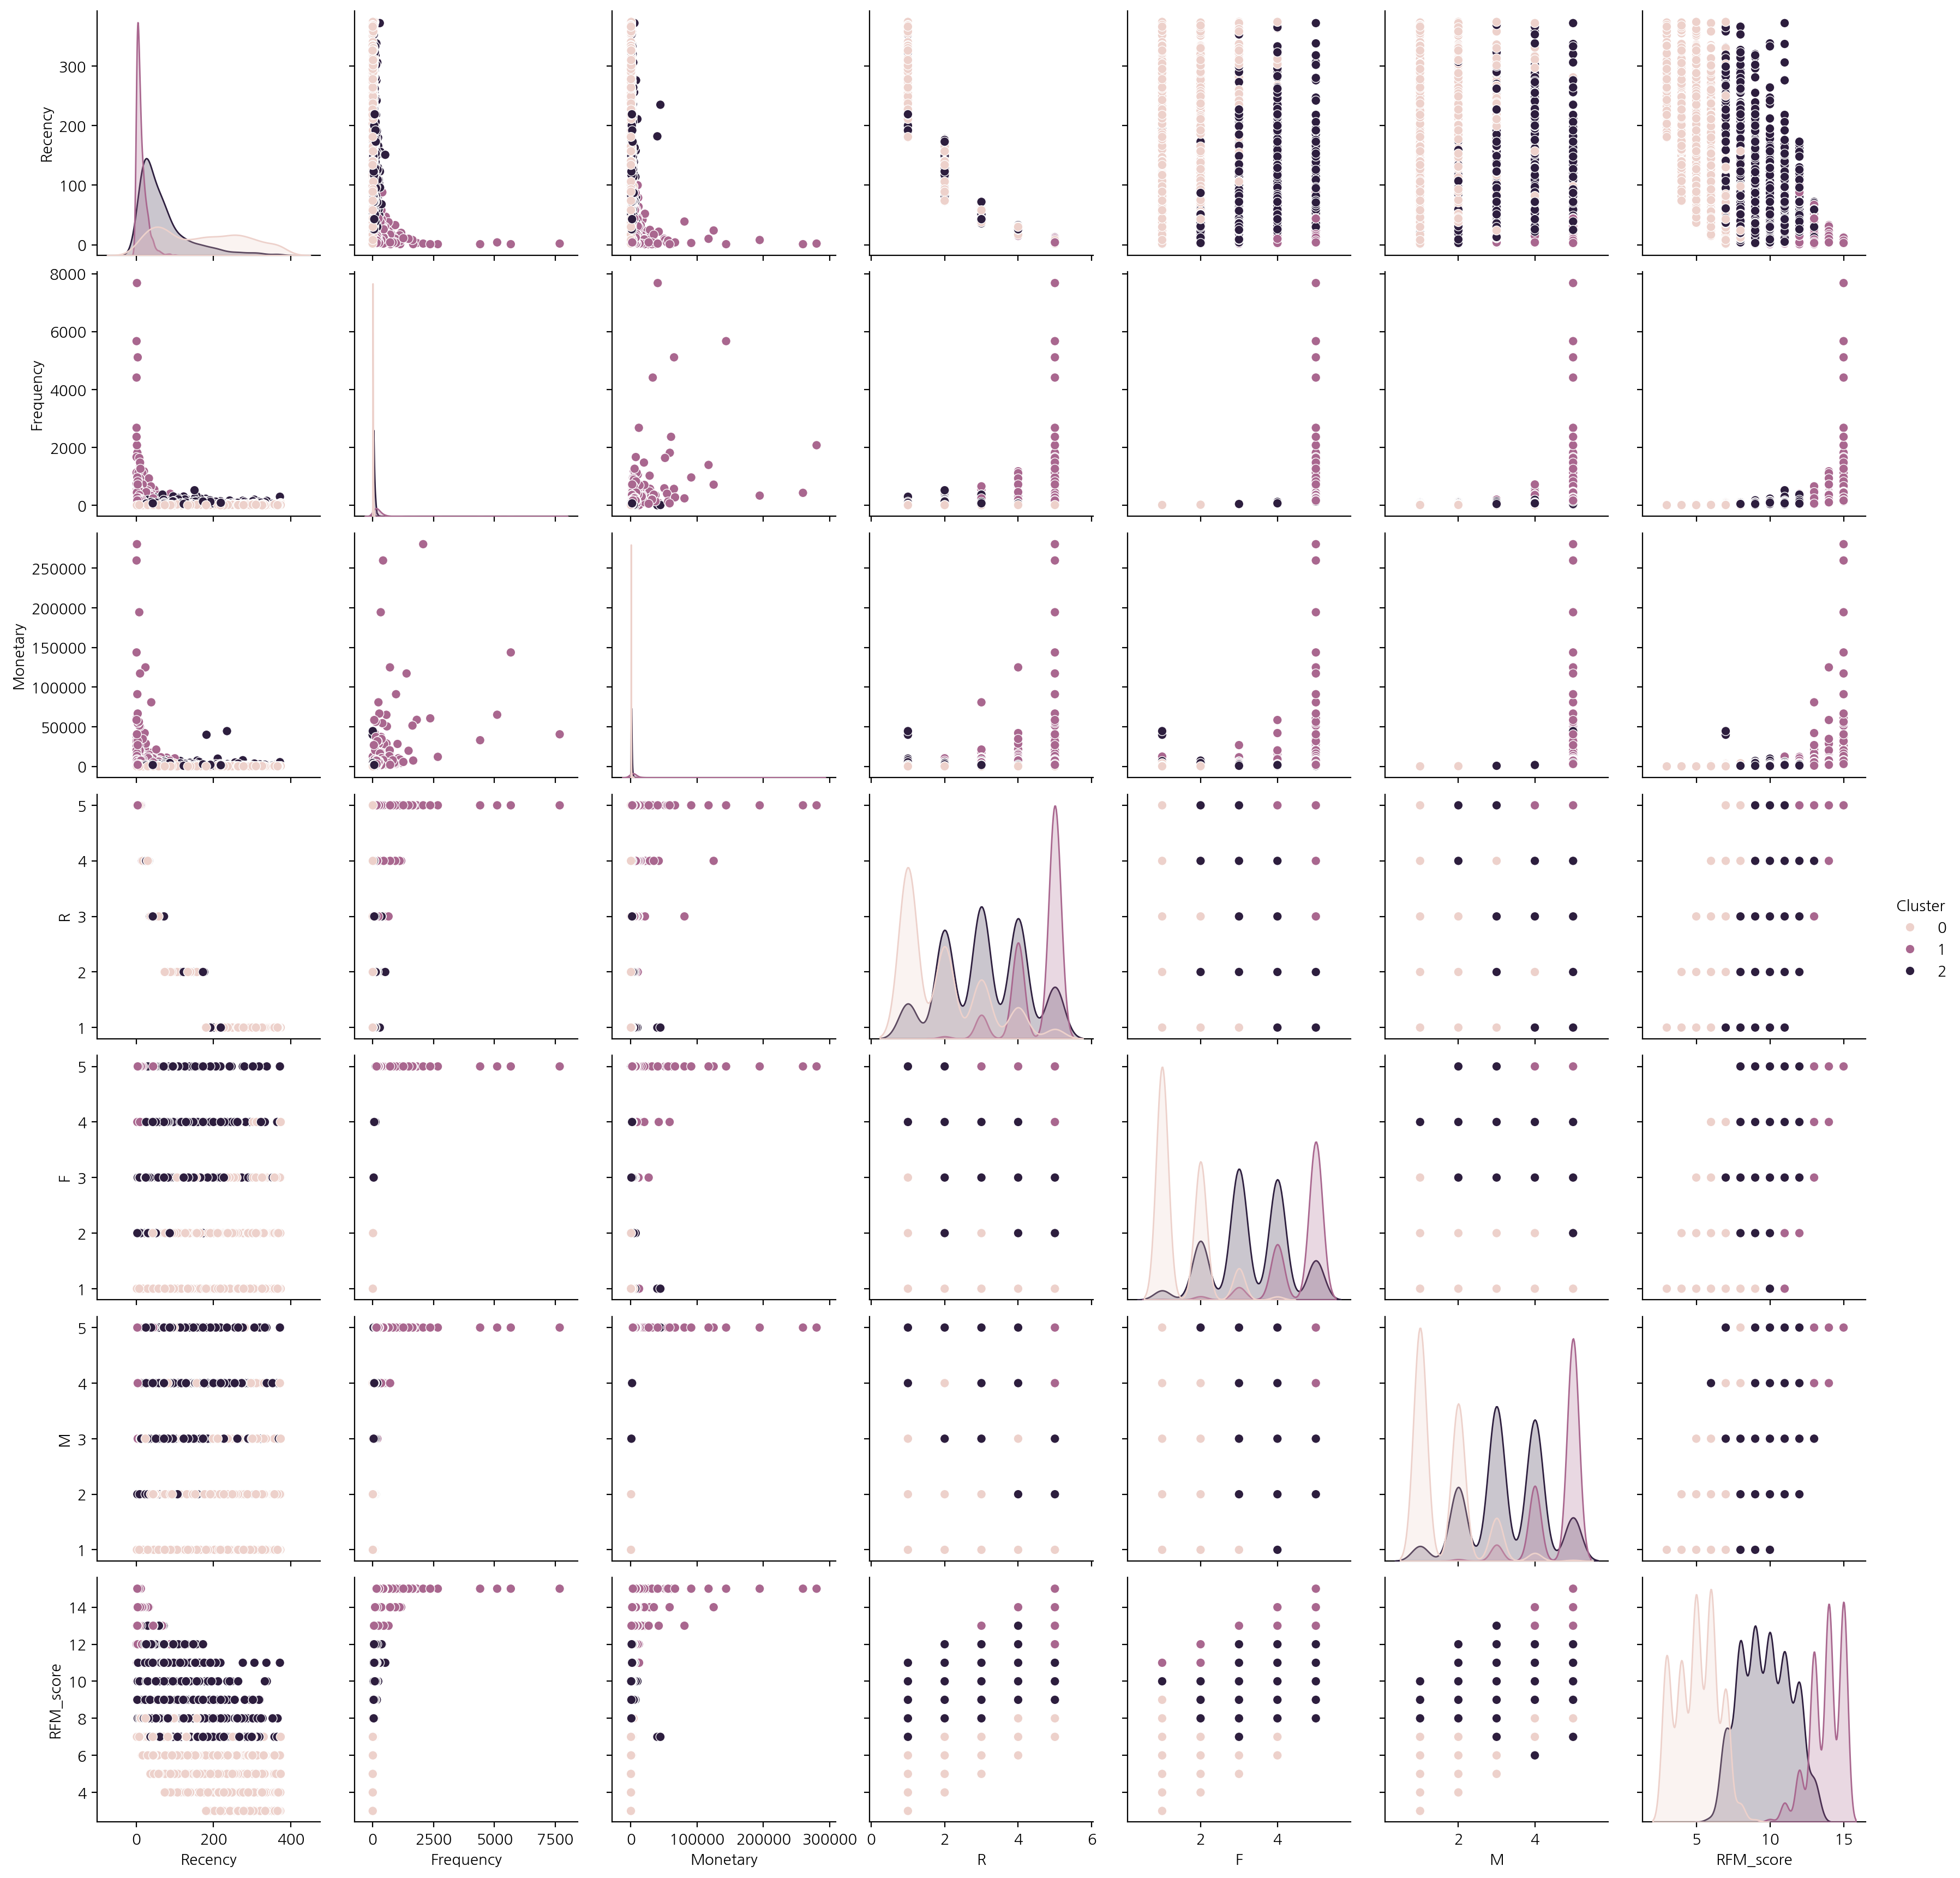

In [168]:
sns.pairplot(data=rfm, hue="Cluster")

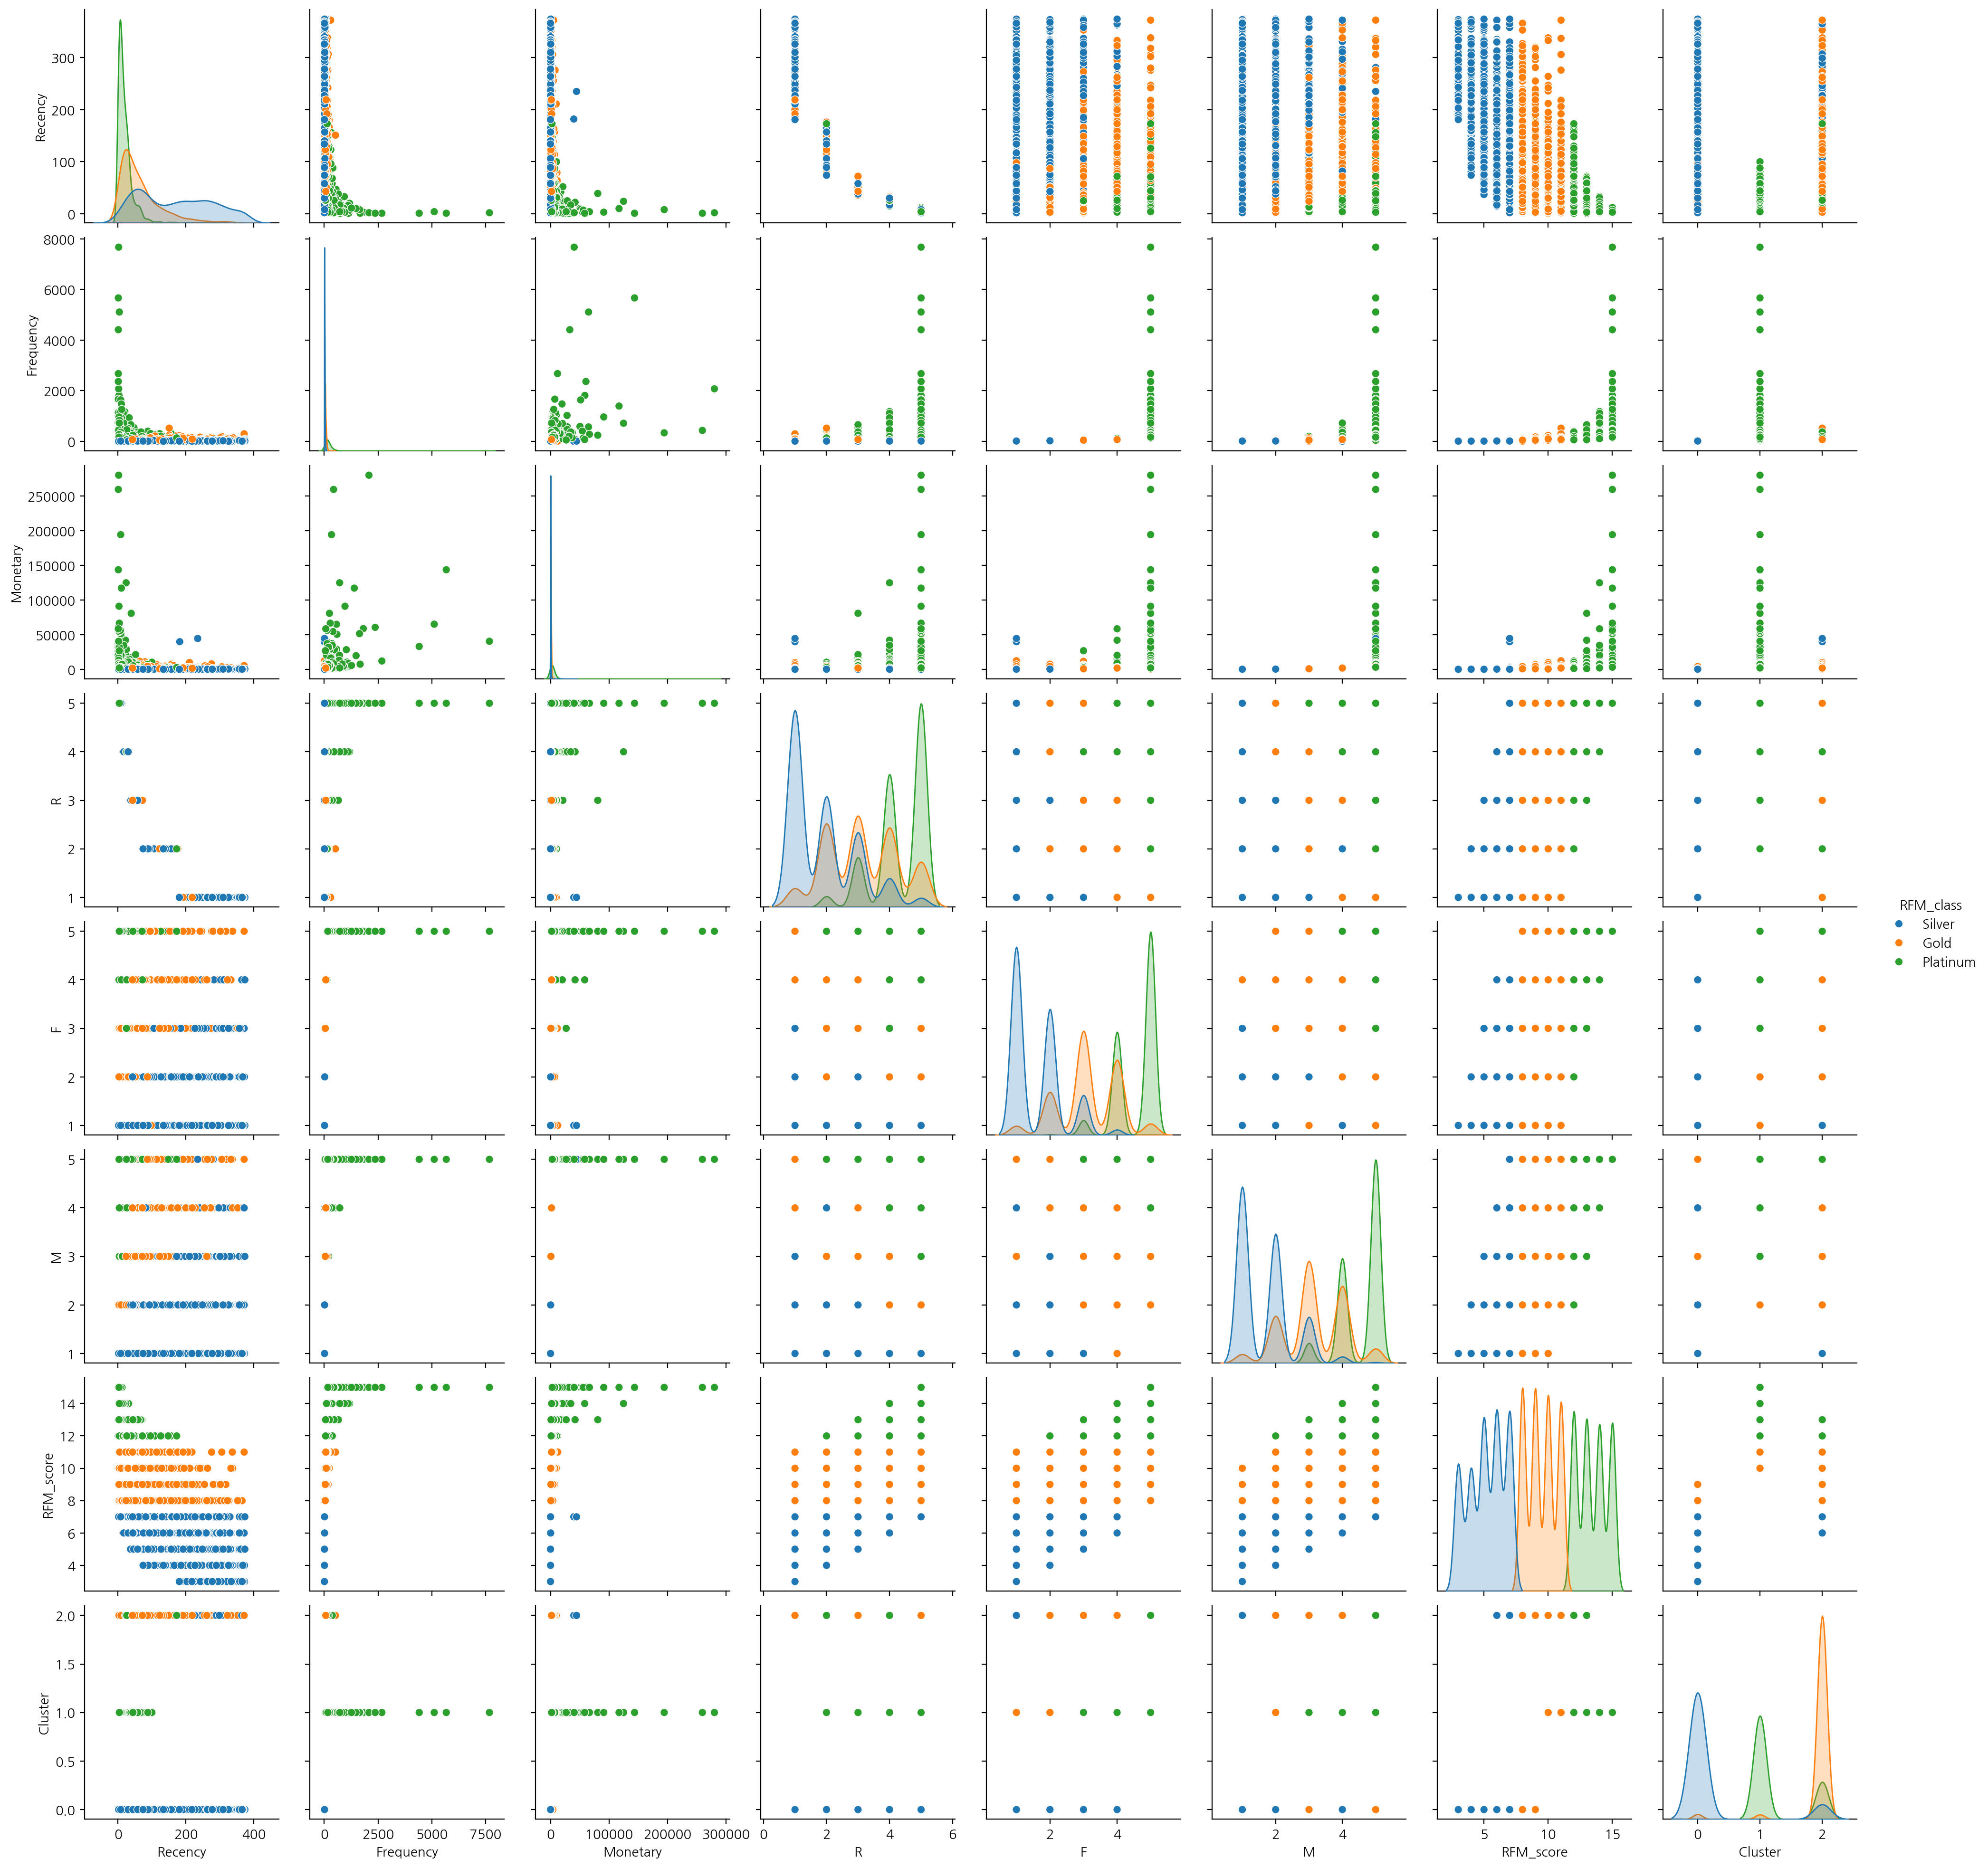

In [169]:
sns.pairplot(data=rfm, hue="RFM_class")